In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os, sys

current_path = '/content/drive/My Drive/Colab Notebooks/JnQ/'

os.chdir(current_path)

Mounted at /content/drive


# requirements

In [ ]:
!pip install mpl_finance
# !pip install findiff

import matplotlib.pyplot as plt
from matplotlib import gridspec
from tqdm.notebook import tqdm
from funcs_indicator import *
from funcs_for_trade import *

import mpl_finance as mf
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl

import numpy as np
import pandas as pd
import seaborn as sns
# import tensorflow as tf

import pickle
import shutil
# import json
from easydict import EasyDict

# from trendln import trendln

from datetime import datetime
import random

# mpl.rcParams['figure.figsize'] = (8, 6)
# mpl.rcParams['axes.grid'] = False

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## move legacy files

In [ ]:
# print()
cur_dir_list = os.listdir('.')
for f in cur_dir_list:
  if 'legacy' in f :
    # print(f)
    if os.path.isdir(current_path + f,):
      continue

    shutil.move(current_path + f, current_path + 'legacy/' + f)
    print("moved to" + current_path + 'legacy/' +  f)

# makeset

## load data

In [ ]:
interval = '1m'
date_path = './candlestick_concated/%s/quant_v2/' % interval
file_list = os.listdir(date_path)
print((file_list))

interval2 = '3m'
date_path2 = './candlestick_concated/%s/quant_v2/' % interval2
file_list2 = os.listdir(date_path2)
print((file_list2))

interval3 = '5m'
date_path3 = './candlestick_concated/%s/quant_v2/' % interval3
file_list3 = os.listdir(date_path3)
print((file_list3))

interval4 = '15m'
date_path4 = './candlestick_concated/%s/quant_v2/' % interval4
file_list4 = os.listdir(date_path4)
print((file_list4))

interval5 = '30m'
date_path5 = './candlestick_concated/%s/quant_v2/' % interval5
file_list5 = os.listdir(date_path5)
print((file_list5))

interval6 = '1h'
date_path6 = './candlestick_concated/%s/quant_v2/' % interval6
file_list6 = os.listdir(date_path6)
print((file_list6))

interval7 = '4h'
date_path7 = './candlestick_concated/%s/quant_v2/' % interval7
file_list7 = os.listdir(date_path7)
print((file_list7))

interval8 = '1d'
date_path8 = './candlestick_concated/%s/quant_v2/' % interval8
file_list8 = os.listdir(date_path8)
print((file_list8))

['2021-05-30 ETHUSDT.xlsx', '2021-04-30 ETHUSDT.xlsx', '2021-07-03 ETHUSDT.xlsx', '2021-06-30 ETHUSDT.xlsx', '2021-06-30 BTCUSDT.xlsx', '2021-06-30 BCHUSDT.xlsx', '2021-06-30 XRPUSDT.xlsx', '2021-06-30 EOSUSDT.xlsx', '2021-06-30 LTCUSDT.xlsx', '2021-06-30 ETCUSDT.xlsx', '2021-06-30 LINKUSDT.xlsx', '2021-06-30 XLMUSDT.xlsx', '2021-06-30 ADAUSDT.xlsx', '2021-07-01 BTCUSDT.xlsx', '2021-07-01 BCHUSDT.xlsx', '2021-07-01 XRPUSDT.xlsx', '2021-07-01 EOSUSDT.xlsx', '2021-07-01 LTCUSDT.xlsx', '2021-07-01 ETCUSDT.xlsx', '2021-07-01 LINKUSDT.xlsx', '2021-07-01 XLMUSDT.xlsx', '2021-07-01 ADAUSDT.xlsx', '2021-07-01 ETHUSDT.xlsx', '2021-06-30 SUSHIUSDT.xlsx', '2021-06-30 CVCUSDT.xlsx', '2021-06-30 BTSUSDT.xlsx', '2021-06-30 HOTUSDT.xlsx', '2021-06-30 ZRXUSDT.xlsx', '2021-06-30 QTUMUSDT.xlsx', '2021-06-30 IOTAUSDT.xlsx', '2021-06-30 BTCBUSD.xlsx', '2021-06-30 WAVESUSDT.xlsx', '2021-06-30 LITUSDT.xlsx', '2021-06-30 XTZUSDT.xlsx', '2021-06-30 BNBUSDT.xlsx', '2021-06-30 AKROUSDT.xlsx', '2021-06-30 HNTUSD

## basic_func

In [ ]:
def sync_check(df, second_df, third_df, fourth_df, fifth_df, sixth_df=None, seventh_df=None, eighth_df=None):

    #           supertrend          #
    # df = st_price_line(df, second_df, '3m')
    # # print(df.head(100))
    # # return

    # df = st_price_line(df, third_df, '5m')
    # df = st_price_line(df, fourth_df, '15m')
    # df = st_price_line(df, fifth_df, '30m')
    # df = st_price_line(df, sixth_df, '1h')
    # df = st_price_line(df, seventh_df, '4h')

    # print("supertrend phase done")

    # --------------- dc --------------- #  
    df = dc_line(df, None, '1m', dc_period=20)
    df = dc_line(df, second_df, '3m', dc_period=20)
    df = dc_line(df, third_df, '5m', dc_period=20)
    df = dc_line(df, fourth_df, '15m', dc_period=20)
    df = dc_line(df, fifth_df, '30m', dc_period=20)
    df = dc_line(df, sixth_df, '1h', dc_period=20)
    df = dc_line(df, seventh_df, '4h', dc_period=20)

    print("dc phase done")
    
    # --------------- bband --------------- #  
    df = bb_line(df, None, '1m')
    df = bb_line(df, second_df, '3m')
    df = bb_line(df, third_df, '5m')
    df = bb_line(df, fourth_df, '15m')
    df = bb_line(df, fifth_df, '30m')
    df = bb_line(df, sixth_df, '1h')
    df = bb_line(df, seventh_df, '4h')

    print("bband phase done")

    # --------------- cbline --------------- #    
    # second_df['cloud_bline_3m'] = cloud_bline(second_df, 26)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, second_df, [-1]), columns=['cloud_bline_3m']))
    # third_df['cloud_bline_5m'] = cloud_bline(third_df, 26)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, third_df, [-1]), columns=['cloud_bline_5m']))
    # fourth_df['cloud_bline_15m'] = cloud_bline(fourth_df, 26)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, fourth_df, [-1]), columns=['cloud_bline_15m']))
    # fifth_df['cloud_bline_30m'] = cloud_bline(fifth_df, 26)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, fifth_df, [-1]), columns=['cloud_bline_30m']))
    # sixth_df['cloud_bline_1h'] = cloud_bline(sixth_df, 26)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, sixth_df, [-1]), columns=['cloud_bline_1h']))
    # seventh_df['cloud_bline_4h'] = cloud_bline(seventh_df, 26)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, seventh_df, [-1]), columns=['cloud_bline_4h']))

    # print("cbline phase done")
    

    #           lucid sar              #
    # df['sar_1m'], df['sar_uptrend_1m'] = lucid_sar(df, return_uptrend=True)

    # third_df['sar_5m'], third_df['sar_uptrend_5m'] = lucid_sar(third_df, return_uptrend=True)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, third_df, [-2, -1], backing_i=-1), columns=['sar_5m', 'sar_uptrend_5m']))

    # fourth_df['sar_15m'], fourth_df['sar_uptrend_15m'] = lucid_sar(fourth_df, return_uptrend=True)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, fourth_df, [-2, -1], backing_i=-1), columns=['sar_15m', 'sar_uptrend_15m']))

    # seventh_df['sar_4h'], seventh_df['sar_uptrend_4h'] = lucid_sar(seventh_df, return_uptrend=True)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, seventh_df, [-2, -1], backing_i=-1), columns=['sar_4h', 'sar_uptrend_4h']))
    
    # print("sar phase done")

    
    #           stochastic              #
    # df['stoch_1m'] = stoch(df, 13, 3, 3)

    # third_df['stoch'] = stoch(third_df, 13, 3, 3)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf(df, third_df, [-1], backing_i=-1), columns=['stoch_5m']))

    # print("stoch phase done")


    return df


## make & save res_df (concat 생각하면, timeindex sync 맞춰야함)

### old (xlsx)

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


save_path = './candlestick_concated/res_df/'

exist_list = os.listdir(save_path)


a_day = 3600 * 24

for i in tqdm(range(len(file_list))):

  keys = [file_list[i]]

  # if 'neo'.upper() not in file_list[i]:
    # continue

  # if '2021-04-30'.upper() not in file_list[i]:
  if '2021-07-01'.upper() not in file_list[i]:
  # if '2021-10-10'.upper() not in file_list[i]:
    continue


  for key in keys:      

    # if 'eth'.upper() not in key:
    #   continue

    excel_name = key.replace(".xlsx", "_st1h_backi2.xlsx")
    excel_path = save_path + excel_name

    if excel_name in exist_list:
      print(excel_name, "already exist !")
      continue
    
    open_indexes = []
    
    df = pd.read_excel(date_path + key, index_col=0)
    second_df = pd.read_excel(date_path2 + key, index_col=0)
    third_df = pd.read_excel(date_path3 + key, index_col=0)
    fourth_df = pd.read_excel(date_path4 + key, index_col=0)
    fifth_df = pd.read_excel(date_path5 + key, index_col=0)
    
    print(df.index[[0, -1]])
    print(second_df.index[[0, -1]])
    print(third_df.index[[0, -1]])
    print(fourth_df.index[[0, -1]])
    print(fifth_df.index[[0, -1]])

    open_indexes.append(df.index[0])
    open_indexes.append(second_df.index[0])
    open_indexes.append(third_df.index[0])
    open_indexes.append(fourth_df.index[0])
    open_indexes.append(fifth_df.index[0])
    
    try:
      #     Todo    #
      #      1. 1m 마지막 timeindex 의 date 기준, 08:59:59.999000 를 last timestamp 로 설정
      #      2. 시작 timestamp 는 모든 tf 의 가장 최근 시작 index,
      #       a. 1m 의 시작 timeindex 는 최소, htf 의 시작 timeindex 보다 interval 만큼 앞서야함
      #         i. 따라서 1m open_index, latest_open_index + 1d 를 하면 댐
      #           1. timestamp 으로 변환후 1day 를 더하고 datetime 으로 변환
      sixth_df = pd.read_excel(date_path6 + key, index_col=0)
      seventh_df = pd.read_excel(date_path7 + key, index_col=0)

      print(sixth_df.index[[0, -1]])
      print(seventh_df.index[[0, -1]])
      print()

      open_indexes.append(sixth_df.index[0])
      open_indexes.append(seventh_df.index[0])

    except Exception as e:
      print(e)

    latest_open_index = sorted(open_indexes)[-1]
    
    open_ts = datetime.timestamp(latest_open_index)
    latest_open_index_1m = datetime.fromtimestamp(open_ts + a_day)

    #   str 로 만들어 접근하면 불가함  #
    end_index = pd.to_datetime(str(df.index[-1]).split(" ")[0] + " 08:59:59.999000")
    # break

    sliced_df = df.loc[latest_open_index_1m:end_index] # to_lower_tf 의 기준 ltf
    sliced_second_df = second_df.loc[latest_open_index:end_index]
    sliced_third_df = third_df.loc[latest_open_index:end_index]
    sliced_fourth_df = fourth_df.loc[latest_open_index:end_index]
    sliced_fifth_df = fifth_df.loc[latest_open_index:end_index]

    print("sliced index")
    print(sliced_df.index[[0, -1]])
    print(sliced_second_df.index[[0, -1]])
    print(sliced_third_df.index[[0, -1]])
    print(sliced_fourth_df.index[[0, -1]])
    print(sliced_fifth_df.index[[0, -1]])

    try:
      sliced_sixth_df = sixth_df.loc[latest_open_index:end_index]
      sliced_seventh_df = seventh_df.loc[latest_open_index:end_index]

      print(sliced_sixth_df.index[[0, -1]])
      print(sliced_seventh_df.index[[0, -1]])

      res_df = sync_check(sliced_df, sliced_second_df, sliced_third_df, sliced_fourth_df, sliced_fifth_df, sliced_sixth_df, sliced_seventh_df)
    
    except:
      res_df = sync_check(sliced_df, sliced_second_df, sliced_third_df, sliced_fourth_df, sliced_fifth_df)



    res_df.to_excel(excel_path)
    print(excel_name, "saved succesfully !")

NameError: ignored

### xlsx to feather

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


save_path = './candlestick_concated/res_df/'

exist_list = os.listdir(save_path)


a_day = 3600 * 24

for i in tqdm(range(len(file_list))):

  keys = [file_list[i]]

  # if 'neo'.upper() not in file_list[i]:
    # continue

  # if '2021-04-30'.upper() not in file_list[i]:
  # if '2021-07-01'.upper() not in file_list[i]:
  if '2021-10-10'.upper() not in file_list[i]:
    continue


  for key in keys:      

    if 'xlsx' not in key:
      continue

    feather_name = key.replace(".xlsx", ".ftr")
    # feather_path = save_path + feather_name

    if feather_name in exist_list:
      print(feather_name, "already exist !")
      continue
    
    open_indexes = []
    
    df = pd.read_excel(date_path + key, index_col=0)
    second_df = pd.read_excel(date_path2 + key, index_col=0)
    third_df = pd.read_excel(date_path3 + key, index_col=0)
    fourth_df = pd.read_excel(date_path4 + key, index_col=0)
    fifth_df = pd.read_excel(date_path5 + key, index_col=0)
    
    print(df.index[[0, -1]])
    print(second_df.index[[0, -1]])
    print(third_df.index[[0, -1]])
    print(fourth_df.index[[0, -1]])
    print(fifth_df.index[[0, -1]])

    open_indexes.append(df.index[0])
    open_indexes.append(second_df.index[0])
    open_indexes.append(third_df.index[0])
    open_indexes.append(fourth_df.index[0])
    open_indexes.append(fifth_df.index[0])
    
    try:
      #     Todo    #
      #      1. 1m 마지막 timeindex 의 date 기준, 08:59:59.999000 를 last timestamp 로 설정
      #      2. 시작 timestamp 는 모든 tf 의 가장 최근 시작 index,
      #       a. 1m 의 시작 timeindex 는 최소, htf 의 시작 timeindex 보다 interval 만큼 앞서야함
      #         i. 따라서 1m open_index, latest_open_index + 1d 를 하면 댐
      #           1. timestamp 으로 변환후 1day 를 더하고 datetime 으로 변환
      sixth_df = pd.read_excel(date_path6 + key, index_col=0)
      seventh_df = pd.read_excel(date_path7 + key, index_col=0)

      print(sixth_df.index[[0, -1]])
      print(seventh_df.index[[0, -1]])
      print()

      open_indexes.append(sixth_df.index[0])
      open_indexes.append(seventh_df.index[0])

    except Exception as e:
      print(e)


    df.reset_index().to_feather(date_path + feather_name, compression='lz4')
    second_df.reset_index().to_feather(date_path2 + feather_name, compression='lz4')
    third_df.reset_index().to_feather(date_path3 + feather_name, compression='lz4')
    fourth_df.reset_index().to_feather(date_path4 + feather_name, compression='lz4')
    fifth_df.reset_index().to_feather(date_path5 + feather_name, compression='lz4')
    sixth_df.reset_index().to_feather(date_path6 + feather_name, compression='lz4')
    seventh_df.reset_index().to_feather(date_path7 + feather_name, compression='lz4')

    print("xlsx converted to feather !")
    

  0%|          | 0/165 [00:00<?, ?it/s]

DatetimeIndex(['2021-06-28 00:00:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-06-28 00:02:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-06-28 00:04:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-06-28 00:14:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-06-28 00:29:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-06-28 00:59:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-06-28 04:59:59.999000', '2021-10-11 00:59:59.999000'], dtype='datetime64[ns]', freq=None)

xlsx converted to feather !
DatetimeIndex(['2021-06-28 00:00:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2021-06-28 00:02:59.999000', '2021-10-10 23:59:59.999000'], dtype='

### feather ver.

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


save_path = './candlestick_concated/res_df/'

dir_path = "bbdc3m_backi2"
date = '2021-10-10'

os.makedirs(os.path.join(save_path, dir_path), exist_ok=True)

exist_list = os.listdir(os.path.join(save_path, dir_path))
# break


a_day = 3600 * 24

for i in tqdm(range(len(file_list))):

  keys = [file_list[i]]  # 1m's quant_v2 list

  # if 'neo'.upper() not in file_list[i]:
    # continue

  if date not in file_list[i]:
    continue


  for key in keys:      

    # if 'eth'.upper() not in key:
    #   continue
    # print(key)
    
    if ".ftr" not in key:
      continue

    # feather_name = key.replace(".ftr", "_%.ftr" % dir_path)
    feather_name = key
    feather_path = os.path.join(save_path, dir_path, feather_name)

    # if feather_name in exist_list:
    #   print(feather_name, "already exist !")
    #   continue
    
    open_indexes = []
    
    df = pd.read_feather(date_path + key, columns=None, use_threads=True).set_index("index")
    second_df = pd.read_feather(date_path2 + key, columns=None, use_threads=True).set_index("index")
    third_df = pd.read_feather(date_path3 + key, columns=None, use_threads=True).set_index("index")
    fourth_df = pd.read_feather(date_path4 + key, columns=None, use_threads=True).set_index("index")
    fifth_df = pd.read_feather(date_path5 + key, columns=None, use_threads=True).set_index("index")
        
    print(df.index[[0, -1]])
    print(second_df.index[[0, -1]])
    print(third_df.index[[0, -1]])
    print(fourth_df.index[[0, -1]])
    print(fifth_df.index[[0, -1]])

    open_indexes.append(df.index[0])
    open_indexes.append(second_df.index[0])
    open_indexes.append(third_df.index[0])
    open_indexes.append(fourth_df.index[0])
    open_indexes.append(fifth_df.index[0])
    
    try:
      #     Todo    #
      #      1. 1m 마지막 timeindex 의 date 기준, 08:59:59.999000 를 last timestamp 로 설정
      #      2. 시작 timestamp 는 모든 tf 의 가장 최근 시작 index,
      #       a. 1m 의 시작 timeindex 는 최소, htf 의 시작 timeindex 보다 interval 만큼 앞서야함
      #         i. 따라서 1m open_index, latest_open_index + 1d 를 하면 댐
      #           1. timestamp 으로 변환후 1day 를 더하고 datetime 으로 변환
      sixth_df = pd.read_feather(date_path6 + key, columns=None, use_threads=True).set_index("index")
      seventh_df = pd.read_feather(date_path7 + key, columns=None, use_threads=True).set_index("index")

      print(sixth_df.index[[0, -1]])
      print(seventh_df.index[[0, -1]])
      print()

      open_indexes.append(sixth_df.index[0])
      open_indexes.append(seventh_df.index[0])

    except Exception as e:
      print(e)

    latest_open_index = sorted(open_indexes)[-1]
    
    open_ts = datetime.timestamp(latest_open_index)
    latest_open_index_1m = datetime.fromtimestamp(open_ts + a_day)

    #   str 로 만들어 접근하면 불가함  #
    end_index = pd.to_datetime(str(df.index[-1]).split(" ")[0] + " 08:59:59.999000")
    # break

    sliced_df = df.loc[latest_open_index_1m:end_index] # to_lower_tf 의 기준 ltf
    sliced_second_df = second_df.loc[latest_open_index:end_index]
    sliced_third_df = third_df.loc[latest_open_index:end_index]
    sliced_fourth_df = fourth_df.loc[latest_open_index:end_index]
    sliced_fifth_df = fifth_df.loc[latest_open_index:end_index]

    print("sliced index")
    print(sliced_df.index[[0, -1]])
    print(sliced_second_df.index[[0, -1]])
    print(sliced_third_df.index[[0, -1]])
    print(sliced_fourth_df.index[[0, -1]])
    print(sliced_fifth_df.index[[0, -1]])

    try:
      sliced_sixth_df = sixth_df.loc[latest_open_index:end_index]
      sliced_seventh_df = seventh_df.loc[latest_open_index:end_index]

      print(sliced_sixth_df.index[[0, -1]])
      print(sliced_seventh_df.index[[0, -1]])

      res_df = sync_check(sliced_df, sliced_second_df, sliced_third_df, sliced_fourth_df, sliced_fifth_df, sliced_sixth_df, sliced_seventh_df)
    
    except:
      res_df = sync_check(sliced_df, sliced_second_df, sliced_third_df, sliced_fourth_df, sliced_fifth_df)



    # res_df.to_feather(feather_path)
    res_df.reset_index().to_feather(feather_path, compression='lz4')
    print(feather_name, "saved succesfully !")

  0%|          | 0/165 [00:00<?, ?it/s]

DatetimeIndex(['2021-06-28 00:00:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', name='index', freq=None)
DatetimeIndex(['2021-06-28 00:02:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', name='index', freq=None)
DatetimeIndex(['2021-06-28 00:04:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', name='index', freq=None)
DatetimeIndex(['2021-06-28 00:14:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', name='index', freq=None)
DatetimeIndex(['2021-06-28 00:29:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', name='index', freq=None)
DatetimeIndex(['2021-06-28 00:59:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', name='index', freq=None)
DatetimeIndex(['2021-06-28 04:59:59.999000', '2021-10-11 00:59:59.999000'], dtype='datetime64[ns]', name='index', freq=None)

sliced index
DatetimeIndex(['2021-06-29 04:59:59.999000', '2021-10-10 08:59:59.999000'], dtype='datetime64[ns]', name='index

/content/drive/My Drive/Colab Notebooks/JnQ/funcs_indicator.py:234: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ltf_df[dc_upper], ltf_df[dc_lower], ltf_df[dc_base] = donchian_channel(ltf_df, dc_period)
/content/drive/My Drive/Colab Notebooks/JnQ/funcs_indicator.py:229: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  htf_df[dc_upper], htf_df[dc_lower], htf_df[dc_base] = donchian_channel(htf_df, dc_period)


dc phase done


/content/drive/My Drive/Colab Notebooks/JnQ/funcs_indicator.py:270: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  htf_df[bb_upper], htf_df[bb_lower], _ = bb_width(htf_df, 20, 1)


bband phase done
2021-10-10 ETCUSDT.ftr saved succesfully !
DatetimeIndex(['2021-06-28 00:00:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', name='index', freq=None)
DatetimeIndex(['2021-06-28 00:02:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', name='index', freq=None)
DatetimeIndex(['2021-06-28 00:04:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', name='index', freq=None)
DatetimeIndex(['2021-06-28 00:14:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', name='index', freq=None)
DatetimeIndex(['2021-06-28 00:29:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', name='index', freq=None)
DatetimeIndex(['2021-06-28 00:59:59.999000', '2021-10-10 23:59:59.999000'], dtype='datetime64[ns]', name='index', freq=None)
DatetimeIndex(['2021-06-28 04:59:59.999000', '2021-10-11 00:59:59.999000'], dtype='datetime64[ns]', name='index', freq=None)

sliced index
DatetimeIndex(['2021-06-29 04:59:59.999000', '2021-

## concat & save new res_df

### old (xlsx)

In [ ]:
save_path = './candlestick_concated/res_df/'

dict_name = "2021-07-01 ETHUSDT_bb15m_backi2_res_dfs.pkl"

#     load with pickle    #
with open(save_path + dict_name, 'rb') as f:
  saved_res_df_dict = pickle.load(f)

print(dict_name, "loaded !")
res_df_files = os.listdir(save_path)
res_df_files.reverse()

print(res_df_files)

res_df_dict = {}

base_postfix = '_bb15m_backi2.xlsx'
new_postfix = '_st1h_backi2.xlsx'

max_cnt = 10
sample_cnt = max_cnt

for k_i, key in enumerate(res_df_files):

  if '2021-07-01'.upper() not in key:
  # if '2021-10-10'.upper() not in key:
    continue

  # if "link".upper() not in key:
  # if "btc".upper() not in key:
  #   continue

  if new_postfix not in key:
    continue

  # if key in 

  if sample_cnt == max_cnt:
    dict_name = "%s_res_dfs.pkl" % key.split(".")[0]
    print("dict_name :", dict_name)

  base_df = saved_res_df_dict[key.replace(new_postfix, base_postfix)]
  # base_df = pd.read_excel(save_path + key.replace(new_postfix, base_postfix), index_col=0)  
  res_df = pd.read_excel(save_path + key, index_col=0)  

  # print(base_df.head())
  # print(res_df.head())
  # break

  new_res_df = pd.concat([base_df, res_df], axis=1) # df_tot.drop_duplicates()
  # new_res_df.head()

  droped_new_res_df = new_res_df.loc[:,~new_res_df.columns.duplicated(keep='last')]
  droped_new_res_df.head()
  # break

  # res_df_dict[key] = res_df
  res_df_dict[key] = droped_new_res_df
  print(key, "saved to dict !")

  #     save with pickle    #
  with open(save_path + dict_name, 'wb') as f:
    pickle.dump(res_df_dict, f)

  sample_cnt -= 1

  if sample_cnt <= 0:
    break


### feather ver. (col concat)

In [ ]:
save_path = './candlestick_concated/res_df/'

concat_dir = "concat"

dir_path = "bbdc3m_backi2"
base_dir_path = "sar15m4h_backi2"


#     save to (new) concat dir    #
#      1. if dir. not exists, makedir
os.makedirs(os.path.join(save_path, dir_path, concat_dir), exist_ok=True)


#     load ftr list    #
ftr_list = [s for s in os.listdir(os.path.join(save_path, dir_path)) if "ftr" in s]
print(ftr_list)
# break

# dict_name = "2021-07-01 ETHUSDT_bb15m_backi2_res_dfs.pkl"

# #     load with pickle    #
# with open(save_path + dict_name, 'rb') as f:
#   saved_res_df_dict = pickle.load(f)

# print(dict_name, "loaded !")
# res_df_files = os.listdir(save_path)
# res_df_files.reverse()

# print(res_df_files)

# res_df_dict = {}

max_cnt = 10
sample_cnt = max_cnt

for key in ftr_list:

  if '2021-07-01'.upper() not in key:
  # if '2021-10-10'.upper() not in key:
    continue


  # if sample_cnt == max_cnt:
  #   dict_name = "%s_res_dfs.pkl" % key.split(".")[0]
  #   print("dict_name :", dict_name)

  # base_df = saved_res_df_dict[key.replace(new_postfix, base_postfix)]
  #       read from base postfix's directory    #
  base_df = pd.read_feather(os.path.join(save_path, base_dir_path, concat_dir, key), columns=None, use_threads=True).set_index("index")
  # base_df = pd.read_excel(save_path + key.replace(new_postfix, base_postfix), index_col=0)  
  res_df = pd.read_feather(os.path.join(save_path, dir_path, key), columns=None, use_threads=True).set_index("index")

  # print(base_df.head())
  # print(res_df.head())
  # break

  new_res_df = pd.concat([base_df, res_df], axis=1) # df_tot.drop_duplicates()
  # new_res_df.head()

  droped_new_res_df = new_res_df.loc[:,~new_res_df.columns.duplicated(keep='last')]
  # droped_new_res_df.head()
  # break

  droped_new_res_df.reset_index().to_feather(os.path.join(save_path, dir_path, concat_dir, key), compression='lz4')

  # res_df_dict[key] = res_df
  # res_df_dict[key] = droped_new_res_df
  print(key, "saved !")

  # #     save with pickle    #
  # with open(save_path + dict_name, 'wb') as f:
  #   pickle.dump(res_df_dict, f)

  sample_cnt -= 1

  if sample_cnt <= 0:
    break


['2021-07-01 BTCUSDT.ftr', '2021-07-01 BCHUSDT.ftr', '2021-07-01 XRPUSDT.ftr', '2021-07-01 EOSUSDT.ftr', '2021-07-01 LTCUSDT.ftr', '2021-07-01 ETCUSDT.ftr', '2021-07-01 LINKUSDT.ftr', '2021-07-01 XLMUSDT.ftr', '2021-07-01 ADAUSDT.ftr', '2021-07-01 ETHUSDT.ftr', '2021-10-10 ETCUSDT.ftr', '2021-10-10 BTCUSDT.ftr', '2021-10-10 ETHUSDT.ftr', '2021-10-10 ADAUSDT.ftr', '2021-10-10 XLMUSDT.ftr', '2021-10-10 LINKUSDT.ftr', '2021-10-10 LTCUSDT.ftr', '2021-10-10 EOSUSDT.ftr', '2021-10-10 XRPUSDT.ftr', '2021-10-10 BCHUSDT.ftr']
2021-07-01 BTCUSDT.ftr saved !
2021-07-01 BCHUSDT.ftr saved !
2021-07-01 XRPUSDT.ftr saved !
2021-07-01 EOSUSDT.ftr saved !
2021-07-01 LTCUSDT.ftr saved !
2021-07-01 ETCUSDT.ftr saved !
2021-07-01 LINKUSDT.ftr saved !
2021-07-01 XLMUSDT.ftr saved !
2021-07-01 ADAUSDT.ftr saved !
2021-07-01 ETHUSDT.ftr saved !


In [ ]:
print(base_df['dc_upper_5m'].tail(50))
print(res_df['dc_upper_5m'].tail(50))
# droped_new_res_df.tail()
# new_res_df = pd.concat([base_df, res_df], axis=1) # df_tot.drop_duplicates()
#   # new_res_df.head()

# droped_new_res_df = new_res_df.loc[:,~new_res_df.columns.duplicated(keep='last')]
# droped_new_res_df.head()
# break

### feather ver. (row concat)

In [ ]:
save_path = './candlestick_concated/res_df/'

concat_dir = "concat"

dir_path = "bbdc3m_backi2"

new_date = '2021-10-10'
old_date = '2021-07-01'

# base_dir_path = "sar15m4h_backi2"


#     save to (new) concat dir    #
#      1. if dir. not exists, makedir
os.makedirs(os.path.join(save_path, dir_path, concat_dir), exist_ok=True)


#     load ftr list    #
ftr_list = [s for s in os.listdir(os.path.join(save_path, dir_path)) if "ftr" in s]
print(ftr_list)
# break

# dict_name = "2021-07-01 ETHUSDT_bb15m_backi2_res_dfs.pkl"

# #     load with pickle    #
# with open(save_path + dict_name, 'rb') as f:
#   saved_res_df_dict = pickle.load(f)

# print(dict_name, "loaded !")
# res_df_files = os.listdir(save_path)
# res_df_files.reverse()

# print(res_df_files)

# res_df_dict = {}

max_cnt = 10
sample_cnt = max_cnt

for key in ftr_list:

  if new_date not in key:
    continue


  #       read from base postfix's directory    #
  base_df = pd.read_feather(os.path.join(save_path, dir_path, concat_dir, key.replace(new_date, old_date)), columns=None, use_threads=True).set_index("index")
  # base_df = pd.read_excel(save_path + key.replace(new_postfix, base_postfix), index_col=0)  
  res_df = pd.read_feather(os.path.join(save_path, dir_path, key), columns=None, use_threads=True).set_index("index")

  # print(base_df.head())
  # print(res_df.head())
  # break

  new_res_df = pd.concat([base_df, res_df], axis=0)#.drop_duplicates(keep='first') # df_tot.drop_duplicates()
  # new_res_df.head()

  intersection_cols = res_df.columns.intersection(base_df.columns)

  droped_new_res_df = new_res_df.loc[:,intersection_cols]
  droped_new_res_df = new_res_df.loc[~new_res_df.index.duplicated(keep='first'),:]
  # droped_new_res_df = new_res_df.loc[~new_res_df.index.duplicated(keep='last'),:]
  # droped_new_res_df.head()
  # break

  droped_new_res_df.reset_index().to_feather(os.path.join(save_path, dir_path, concat_dir, key), compression='lz4')

  # res_df_dict[key] = res_df
  # res_df_dict[key] = droped_new_res_df
  print(key, "saved !")

  # #     save with pickle    #
  # with open(save_path + dict_name, 'wb') as f:
  #   pickle.dump(res_df_dict, f)

  sample_cnt -= 1

  if sample_cnt <= 0:
    break


['2021-07-01 BTCUSDT.ftr', '2021-07-01 BCHUSDT.ftr', '2021-07-01 XRPUSDT.ftr', '2021-07-01 EOSUSDT.ftr', '2021-07-01 LTCUSDT.ftr', '2021-07-01 ETCUSDT.ftr', '2021-07-01 LINKUSDT.ftr', '2021-07-01 XLMUSDT.ftr', '2021-07-01 ADAUSDT.ftr', '2021-07-01 ETHUSDT.ftr', '2021-10-10 ETCUSDT.ftr', '2021-10-10 BTCUSDT.ftr', '2021-10-10 ETHUSDT.ftr', '2021-10-10 ADAUSDT.ftr', '2021-10-10 XLMUSDT.ftr', '2021-10-10 LINKUSDT.ftr', '2021-10-10 LTCUSDT.ftr', '2021-10-10 EOSUSDT.ftr', '2021-10-10 XRPUSDT.ftr', '2021-10-10 BCHUSDT.ftr']


In [1]:
# print(len(base_df))

# print(base_df.tail().index)
# print(res_df.head().index)
# ts_index = pd.Series(list(map(lambda x : datetime.timestamp(x), droped_new_res_df.index)))
# # find_error = np.argwhere(ts_index.shift(1) > ts_index)
# for i in range(1, len(ts_index)):
#   if ts_index[i - 1] > ts_index[i]:
#     print(ts_index[i - 1] , ts_index[i])
# print(find_error)
# droped_new_res_df.tail()
print(base_df.tail().iloc[:, 0])
print(droped_new_res_df.iloc[len(base_df) - 1:len(base_df) + 100, 0])

NameError: ignored

## modify colname

### old (xlsx)

In [ ]:
pd.set_option('display.max_seq_items', None)

save_path = './candlestick_concated/res_df/'

dict_name = "2021-07-01 ETHUSDT_sarstoch_backi2_res_dfs.pkl"
# new_dict_name = "2021-07-01 ETHUSDT_bbline_backi2_res_dfs_colmod.pkl"

new_colname = ['open', 'high', 'low', 'close', 'volume', 'ST1_Up_3m', 'ST1_Down_3m',
       'ST1_Trend_3m', 'ST2_Up_3m', 'ST2_Down_3m', 'ST2_Trend_3m', 'ST3_Up_3m',
       'ST3_Down_3m', 'ST3_Trend_3m', 'min_upper_3m', 'max_lower_3m', 'middle_line_3m',
       'upper_middle_3m', 'lower_middle_3m', 'st_gap_3m', 'ST1_Up_30m', 'ST1_Down_30m',
       'ST1_Trend_30m', 'ST2_Up_30m', 'ST2_Down_30m', 'ST2_Trend_30m', 'ST3_Up_30m',
       'ST3_Down_30m', 'ST3_Trend_30m', 'min_upper_30m', 'max_lower_30m', 'middle_line_30m',
       'upper_middle_30m', 'lower_middle_30m', 'st_gap_30m', 'ST1_Up_4h', 'ST1_Down_4h',
       'ST1_Trend_4h', 'ST2_Up_4h', 'ST2_Down_4h', 'ST2_Trend_4h', 'ST3_Up_4h',
       'ST3_Down_4h', 'ST3_Trend_4h', 'min_upper_4h', 'max_lower_4h', 'middle_line_4h',
       'upper_middle_4h', 'lower_middle_4h', 'st_gap_4h', 'ST1_Up_1d', 'ST1_Down_1d',
       'ST1_Trend_1d', 'ST2_Up_1d', 'ST2_Down_1d', 'ST2_Trend_1d', 'ST3_Up_1d',
       'ST3_Down_1d', 'ST3_Trend_1d', 'min_upper_1d', 'max_lower_1d', 'middle_line_1d',
       'upper_middle_1d', 'lower_middle_1d', 'st_gap_1d', 'mmh_st1_1m', 'mmh_st2_1m',
       'norm_st_up_1m', 'norm_st_down_1m', 'norm_st_trend_1m', 'ST1_Up_5m', 'ST1_Down_5m',
       'ST1_Trend_5m', 'ST2_Up_5m', 'ST2_Down_5m', 'ST2_Trend_5m', 'ST3_Up_5m',
       'ST3_Down_5m', 'ST3_Trend_5m', 'min_upper_5m', 'max_lower_5m', 'middle_line_5m',
       'upper_middle_5m', 'lower_middle_5m', 'st_gap_5m',
       'bb_upper_1m', 'bb_lower_1m', 'bb_base_1m', 'bb_upper2_1m',
       'bb_upper3_1m', 'bb_lower2_1m', 'bb_lower3_1m', 'bb_upper_30m',
       'bb_lower_30m', 'bb_base_30m', 'bb_upper2_30m', 'bb_upper3_30m',
       'bb_lower2_30m', 'bb_lower3_30m']

#     load with pickle    #
with open(save_path + dict_name, 'rb') as f:
  saved_res_df_dict = pickle.load(f)

for key, res_df in saved_res_df_dict.items():

  # if '_stline15_backi2' not in key:
  #   continue

  # print(res_df.columns)

  try:

    #     rename whole cols   #
    # res_df.columns = new_colname

    #     rename specific cols   #
    res_df.rename(columns={"stoch5" : "stoch_30m"}, inplace=True)


    #     drop cols   #
    # res_df.drop(['bb_upper', 'bb_lower'], axis=1, inplace=True)
    # break

  except Exception as e:
    print(e)

  
  # res_df_dict[key] = res_df
  saved_res_df_dict[key] = res_df
  print(key, "modified & saved to dict !")

  #     save with pickle    #
  with open(save_path + dict_name, 'wb') as f:
    pickle.dump(saved_res_df_dict, f)

# res_df.tail()

In [ ]:
# print(res_df.tail()) # 35215.568620 35182.644944
res_df.tail() # 35215.568620 35182.644944

### feather ver.

In [ ]:
pd.set_option('display.max_seq_items', None)

save_path = './candlestick_concated/res_df/'

dir_path = "dc_backi2"
concat_dir = "concat"

#     load ftr list    #
ftr_list = [s for s in os.listdir(os.path.join(save_path, dir_path, concat_dir)) if "ftr" in s]
print(ftr_list)

# dict_name = "2021-07-01 ETHUSDT_sarstoch_backi2_res_dfs.pkl"

new_colname = ['open', 'high', 'low', 'close', 'volume', 'ST1_Up_3m', 'ST1_Down_3m',
       'ST1_Trend_3m', 'ST2_Up_3m', 'ST2_Down_3m', 'ST2_Trend_3m', 'ST3_Up_3m',
       'ST3_Down_3m', 'ST3_Trend_3m', 'min_upper_3m', 'max_lower_3m', 'middle_line_3m',
       'upper_middle_3m', 'lower_middle_3m', 'st_gap_3m', 'ST1_Up_30m', 'ST1_Down_30m',
       'ST1_Trend_30m', 'ST2_Up_30m', 'ST2_Down_30m', 'ST2_Trend_30m', 'ST3_Up_30m',
       'ST3_Down_30m', 'ST3_Trend_30m', 'min_upper_30m', 'max_lower_30m', 'middle_line_30m',
       'upper_middle_30m', 'lower_middle_30m', 'st_gap_30m', 'ST1_Up_4h', 'ST1_Down_4h',
       'ST1_Trend_4h', 'ST2_Up_4h', 'ST2_Down_4h', 'ST2_Trend_4h', 'ST3_Up_4h',
       'ST3_Down_4h', 'ST3_Trend_4h', 'min_upper_4h', 'max_lower_4h', 'middle_line_4h',
       'upper_middle_4h', 'lower_middle_4h', 'st_gap_4h', 'ST1_Up_1d', 'ST1_Down_1d',
       'ST1_Trend_1d', 'ST2_Up_1d', 'ST2_Down_1d', 'ST2_Trend_1d', 'ST3_Up_1d',
       'ST3_Down_1d', 'ST3_Trend_1d', 'min_upper_1d', 'max_lower_1d', 'middle_line_1d',
       'upper_middle_1d', 'lower_middle_1d', 'st_gap_1d', 'mmh_st1_1m', 'mmh_st2_1m',
       'norm_st_up_1m', 'norm_st_down_1m', 'norm_st_trend_1m', 'ST1_Up_5m', 'ST1_Down_5m',
       'ST1_Trend_5m', 'ST2_Up_5m', 'ST2_Down_5m', 'ST2_Trend_5m', 'ST3_Up_5m',
       'ST3_Down_5m', 'ST3_Trend_5m', 'min_upper_5m', 'max_lower_5m', 'middle_line_5m',
       'upper_middle_5m', 'lower_middle_5m', 'st_gap_5m',
       'bb_upper_1m', 'bb_lower_1m', 'bb_base_1m', 'bb_upper2_1m',
       'bb_upper3_1m', 'bb_lower2_1m', 'bb_lower3_1m', 'bb_upper_30m',
       'bb_lower_30m', 'bb_base_30m', 'bb_upper2_30m', 'bb_upper3_30m',
       'bb_lower2_30m', 'bb_lower3_30m']

# #     load with pickle    #
# with open(save_path + dict_name, 'rb') as f:
#   saved_res_df_dict = pickle.load(f)

for key in ftr_list:

  res_df = pd.read_feather(os.path.join(save_path, dir_path, concat_dir, key), columns=None, use_threads=True).set_index("index")

  try:

    #     rename whole cols   #
    # res_df.columns = new_colname

    #     rename specific cols   #
    res_df.rename(columns={"stoch5" : "stoch_30m"}, inplace=True)


    #     drop cols   #
    # res_df.drop(['bb_upper', 'bb_lower'], axis=1, inplace=True)
    # break

  except Exception as e:
    print(e)

  
  res_df.reset_index().to_feather(os.path.join(save_path, dir_path, concat_dir, key), compression='lz4')

  # res_df_dict[key] = res_df
  # saved_res_df_dict[key] = res_df
  print(key, "modified & saved !")

  # #     save with pickle    #
  # with open(save_path + dict_name, 'wb') as f:
  #   pickle.dump(saved_res_df_dict, f)

# res_df.tail()

# pr check with strategy

## load ftr_list

In [ ]:
save_path = './candlestick_concated/res_df/'

dir_path = "bbdc3m_backi2"
# dir_path = "dc10_backi2"

#     load ftr list    #
ftr_list = [s for s in os.listdir(os.path.join(save_path, dir_path, "concat")) if "ftr" in s]
print(ftr_list)

['2021-07-01 BTCUSDT.ftr', '2021-07-01 BCHUSDT.ftr', '2021-07-01 XRPUSDT.ftr', '2021-07-01 EOSUSDT.ftr', '2021-07-01 LTCUSDT.ftr', '2021-07-01 ETCUSDT.ftr', '2021-07-01 LINKUSDT.ftr', '2021-07-01 XLMUSDT.ftr', '2021-07-01 ADAUSDT.ftr', '2021-07-01 ETHUSDT.ftr']


## basic strategy

### shifting

In [ ]:
org_res_df = res_df.copy()

In [ ]:
#         refresh res_df      #
res_df = org_res_df.copy()
print(org_res_df.tail(5))

# break


shift_size = -4
# shift_size = -1
# shift_size = -7
# shift_size = +3

res_df['min_upper'] = res_df['min_upper'].shift(shift_size)
res_df['max_lower'] = res_df['max_lower'].shift(shift_size)
res_df['minor_ST1_Trend'] = res_df['minor_ST1_Trend'].shift(shift_size)
res_df['minor_ST2_Trend'] = res_df['minor_ST2_Trend'].shift(shift_size)
res_df['minor_ST3_Trend'] = res_df['minor_ST3_Trend'].shift(shift_size)
res_df['middle_line'] = res_df['middle_line'].shift(shift_size)

print(res_df.tail(5))

                            open     high  ...  min_upper  max_lower
2021-06-30 23:55:59.999  0.27223  0.27281  ...   0.272145    0.27005
2021-06-30 23:56:59.999  0.27274  0.27290  ...   0.272145    0.27005
2021-06-30 23:57:59.999  0.27246  0.27257  ...   0.272523    0.27021
2021-06-30 23:58:59.999  0.27166  0.27183  ...   0.272523    0.27021
2021-06-30 23:59:59.999  0.27144  0.27211  ...   0.272523    0.27021

[5 rows x 37 columns]
                            open     high  ...  min_upper  max_lower
2021-06-30 23:55:59.999  0.27223  0.27281  ...   0.272523    0.27021
2021-06-30 23:56:59.999  0.27274  0.27290  ...        NaN        NaN
2021-06-30 23:57:59.999  0.27246  0.27257  ...        NaN        NaN
2021-06-30 23:58:59.999  0.27166  0.27183  ...        NaN        NaN
2021-06-30 23:59:59.999  0.27144  0.27211  ...        NaN        NaN

[5 rows x 37 columns]


### load model

In [ ]:
# model_name = 'inner_tick_cnnreg_lscalemm_prefee_gpu_%s_%s_%s_%s_%s.h5'

# model = tf.keras.models.load_model(ckpt_path + model_name)

from tensorflow.keras.applications.resnet50 import ResNet50

model = ResNet50(weights='imagenet', include_top=False)
# model.summary()


94773248/94765736 [==============================] - 1s 0us/step


#### gen selected vector

In [ ]:
def min_max_scale(npy_x):

  return (npy_x - np.min(npy_x)) / (np.max(npy_x) - np.min(npy_x))

def expand_dims(npy_x):

  row, col = npy_x.shape
  npy_x2 = np.array(npy_x).reshape(-1, row, col, 1).astype(np.float32)
  # input_x = np.array(data_x).reshape(-1, row, col).astype(np.float32)

  #     1c to 3c    #
  npy_x3 = npy_x2 * np.ones(3, dtype=np.float32)[None, None, None, :]

  return npy_x3


def vector_dist(f1, f2):
  return np.linalg.norm(f1-f2)



# ------------------------ params ------------------------  #
selected_i = 500
input_size = 100



#   1. 선택된 인덱스를 입력받았을 때, input generating 형태만 만들어놓고,     #
#   1-1. input cols 필요함    #

basic_list = ['open', 'high', 'low', 'close', 'minor_ST1_Up', 'minor_ST1_Down',
       'minor_ST2_Up', 'minor_ST2_Down', 'minor_ST3_Up', 'minor_ST3_Down',
       'middle_line', 'min_upper', 'max_lower']
# senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
# senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']
senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3']
# sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
# sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
sar_list = ['sar1', 'sar2', 'sar3']
sar_list = ['sar1', 'sar2', 'sar3']

sma_list = ['sma']

#     -------------- outer price phase --------------    #
macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']
trix_list = ['trix1', 'trix2', 'trix3', 'trix4', 'trix5']
stoch_list = ['stoch']
fisher_list = ['fisher30', 'fisher60', 'fisher120']
cctbbo_list = ['cctbbo']

selected_price_colname = basic_list + senkoua_list + senkoub_list + sar_list
selected_outprice_colname = [macd_list]


#         global scaling for outer price data       #
#         1. nan 처리       #

# # print((np.isnan(df.values)))
# print("np.sum(np.isnan(df.values), axis=0) :", np.sum(np.isnan(df.values), axis=0))

# max_nan = np.max(np.sum(np.isnan(df.values), axis=0))
# # print(max_nan)

# df = df.iloc[max_nan:-max_nan]

# total_gdata = []
# for g_col in selected_outprice_colname:

#   temp_data = min_max_scale(res_df[g_col])
#   total_gdata.append(temp_data)



#   1-2. cols 에 따른, scaling method 구분함    #
onprice_input_x = min_max_scale(res_df[selected_price_colname].iloc[selected_i - input_size:selected_i].values)
print(onprice_input_x.shape)


#   2. plot_check 에서 본인이 원하는 shape 의 인덱스를 선택   #
#   3. vertorize, 
#   3-1. input generator 를 이용해 entry signal 발생할 때마다 dist 비교 진행    #
re_onprice_input_x = expand_dims(onprice_input_x)
print(re_onprice_input_x.shape)
      
# break

selected_vector = model.predict(re_onprice_input_x, verbose=1)
print(selected_vector.shape)

### tr_tresh calc

In [ ]:
res_wr = 0.6
# tr_thresh = 1
# tr_thresh = ((1 - res_wr) / res_wr) ** 0.5
tr_thresh = ((1 - res_wr) / res_wr) + 0.01
# tr_thresh = 2.6
print("res_wr :", res_wr)
print("tr_thresh :", tr_thresh)


#   단리    #
trade_num = 1000
asset = 1 # thousand USDT
test_loss_gap = 0.95  # fee adjusted
test_pr_gap = 1 + (1 - test_loss_gap) * tr_thresh

test_loss_cnt = trade_num * (1 - res_wr)
test_pr_cnt = trade_num * res_wr

test_trade_list = [test_pr_gap] * int(test_pr_cnt) + [test_loss_gap] * int(test_loss_cnt)
random.shuffle(test_trade_list)
# print("len(test_trade_list) :", len(test_trade_list))
print(test_trade_list[:10])
print()

# print("%.5f" % np.cumprod(test_trade_list)[-1])
for tr_thresh_ in np.arange(1, 3, 0.2):
  if (1 + (1 - test_loss_gap) * tr_thresh_) ** test_pr_cnt * test_loss_gap ** test_loss_cnt > 1:
    break
print("복리를 위한 tr_thresh_ :", tr_thresh_)
# print("tr_thresh :", tr_thresh)
print("np.cumprod(test_trade_list)[-1] :", np.cumprod(test_trade_list)[-1])
print("total_pr : ", np.cumprod(test_trade_list)[-1])
print()
#   복리 tr_thresh  #
#   1. trade_num 에 영향 받지 않음
#   2. loss_gap 에 비례함

for tr_thresh_ in np.arange(1, 3, 0.01):
  if ((1 - test_loss_gap) * tr_thresh_) * test_pr_cnt + (test_loss_gap - 1) * test_loss_cnt > 0:
    break
np_test_trade = np.array(test_trade_list) - 1
print(np_test_trade[:10])
# print("%.3f" % )
print("단리를 위한 tr_thresh_ :", tr_thresh_)
# print("tr_thresh :", tr_thresh)
print("np.cumsum(np_test_trade)[-1] :", np.cumsum(np_test_trade)[-1])
print("total_pr : ", 1 + np.cumsum(np_test_trade)[-1])


res_wr : 0.6
tr_thresh : 0.6766666666666667
[0.95, 1.0338333333333334, 0.95, 0.95, 1.0338333333333334, 0.95, 0.95, 1.0338333333333334, 0.95, 1.0338333333333334]

복리를 위한 tr_thresh_ : 1.0
np.cumprod(test_trade_list)[-1] : 0.5751227991397774
total_pr :  0.5751227991397774

[-0.05        0.03383333 -0.05       -0.05        0.03383333 -0.05
 -0.05        0.03383333 -0.05        0.03383333]
단리를 위한 tr_thresh_ : 1.0
np.cumsum(np_test_trade)[-1] : 0.30000000000001137
total_pr :  1.3000000000000114


### lastest platform

In [ ]:
new_df_cols = ['short_out', 'long_out', 'short_tp', 'long_tp', 'dc_upper_v2', 'dc_lower_v2']
res_df.columns
print(res_df.columns.intersection(new_df_cols))

Index(['short_out', 'long_out', 'short_tp', 'long_tp', 'dc_upper_v2', 'dc_lower_v2'], dtype='object')


In [ ]:
print(len(res_df[res_df['entry'] == -1]))
print(len(res_df[res_df['entry'] == 1]))

2234
2478


In [ ]:
#     caution : MARKET / LIMIT spelling   #

param_dict = \
{
  "init_set": {
    "run": 1,
    "df_log": 0,
    "bar_close_second": 59,
    "realtime_term": 0.01,
    "last_index": -2,
    "limit_fee": 0.0002,
    "market_fee": 0.0004,
    "initial_asset": 5000,
    "asset_changed" : 1,
    "symbol": "ETHUSDT",
    "symbol_changed": 0,
    "interval_list": [
      "1m",
      "15m",
      "None"
    ],
    "row_list": [
      200,
      100,
      100
    ],
    "api_retry_term": 3,
    "save_stacked_df": 0,
    "stacked_df_exist": 1
  },
  "ep_set": {
    "short_entry_score": -1,
    "tr_thresh": 0.95,
    "dr_error": 0.1,
    "dt_k": 0.225,
    "ei_k": 0.095,
    "bbwp_thresh": 0.5,
    "entry_incycle": 5,
    "tf_entry": 5,
    "htf_entry": 60,
    "entry_type": "LIMIT",
    "static_ep": 1,
    "tpout_onexec": 0,
    "ep_gap": 0.083,
    "max_eplim_pct": 0.05,
    "min_eplim_pct": 0.013,
    "short_inversion": 0,
    "long_inversion": 0,
    "check_entry_sec": 10,
    "entry_execution_wait": 60,
    "breakout_qty_ratio": 0.97
  },
  "out_set": {
    "out_type": "MARKET",
    "exit_execution_wait": 60,
    "close_complete_term": 5,
    "use_out": 1,
    "static_out": 1,
    "out_gap": -0.5,
    "hl_out": 1,
    "price_restoration": 0,
    "retouch": 0,
    "retouch_out_period": 500,
    "second_out": 0,
    "approval_st_gap": 1.5,
    "second_out_gap": 0.5
  },
  "tp_set": {
    "non_tp": 0,
    "tp_type": "LIMIT",
    "static_tp": 1,
    "tp_gap": 0.36,
    "partial_num": 1,
    "partial_qty_divider": 1.5
  },
  "lvrg_set": {
    "leverage": 2,
    "static_lvrg": 0,
    "allow_float": 0,
    "target_pct": 0.1,
    "lvrg_rejection": 0
  }
}

config = EasyDict(param_dict)
# param_json = json.dumps(param_dict, indent=2)

2021-07-01 ETHUSDT.ftr loaded !
tpg_itv : 5m
outg_itv : 5m
dtk_itv : 5m
dtk_dc_itv_num : 1
dc_period : 20
use_dtk_line : 0
bbz_itv : None
config.ep_set.dt_k : 0.225
config.ep_set.ei_k : 0.095
config.ep_set.tr_thresh : 0.95
config.ep_set.tf_entry : 5
config.ep_set.htf_entry : 60
config.ep_set.ep_gap : 0.083
config.out_set.out_gap : -0.5
config.tp_set.tp_gap : 0.36
config.lvrg_set.leverage : 2
config.lvrg_set.target_pct : 0.1
supblot231 passed
supblot232 passed
supblot233 passed


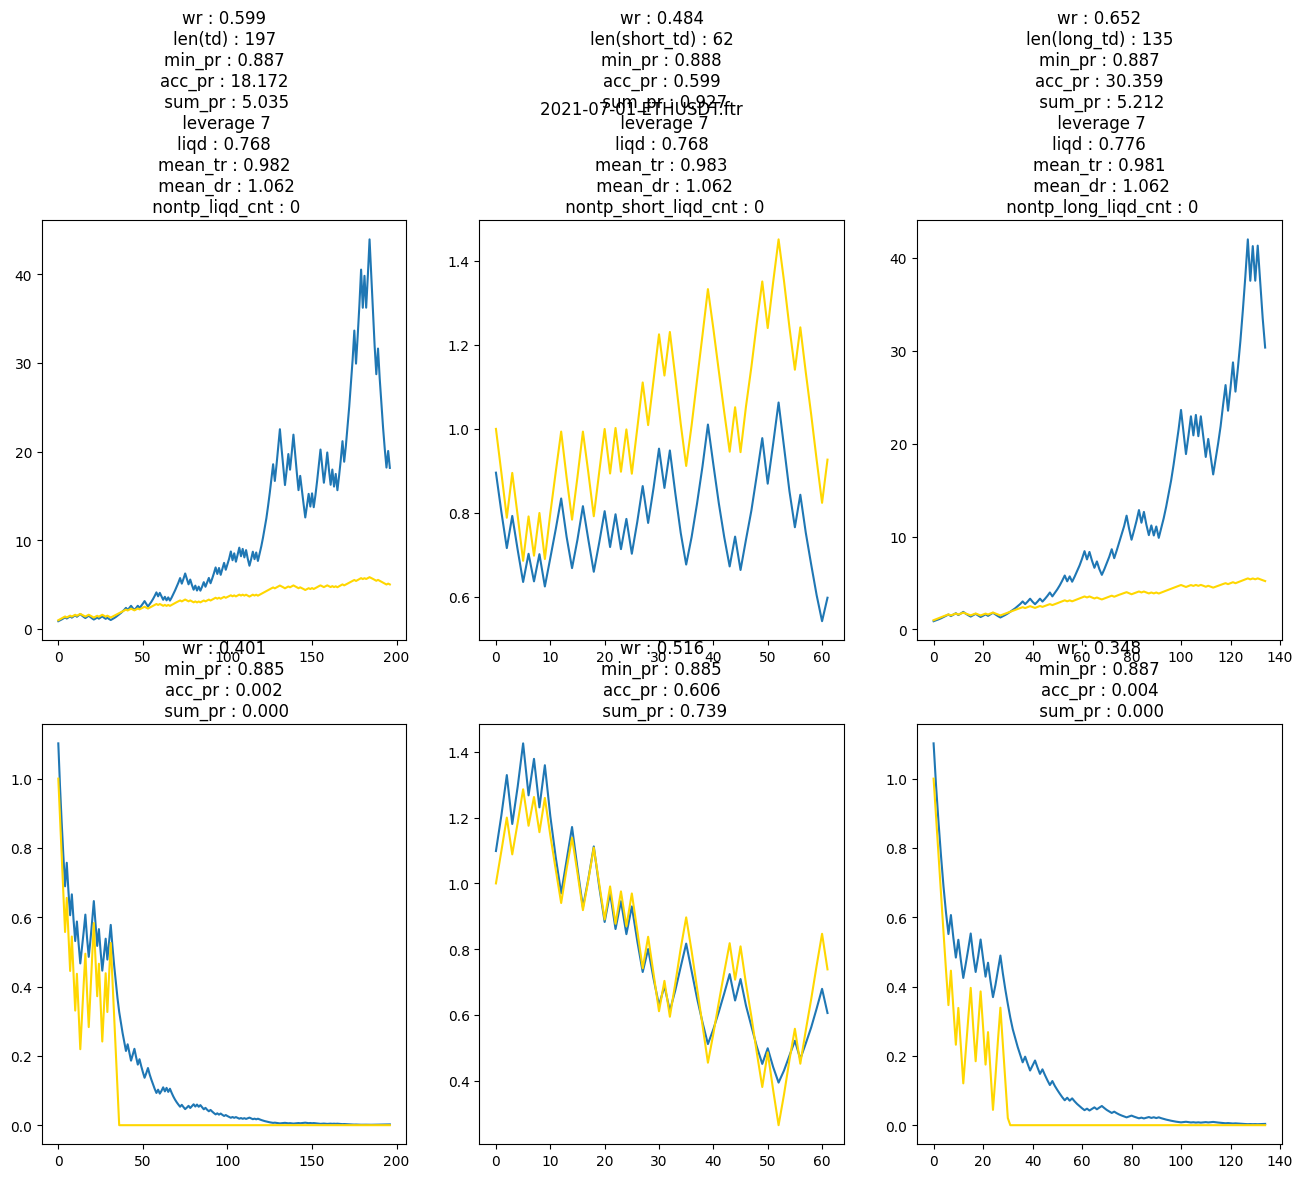

In [ ]:
# ------- tp / out fee calc ------- #
if config.ep_set.entry_type == 'MARKET':
  if config.tp_set.tp_type == 'LIMIT':
    tp_fee = config.init_set.market_fee + config.init_set.limit_fee
  else:
    tp_fee = config.init_set.market_fee + config.init_set.market_fee
  out_fee = config.init_set.market_fee + config.init_set.market_fee
else:
  if config.tp_set.tp_type == 'LIMIT':
    tp_fee = config.init_set.limit_fee + config.init_set.limit_fee
  else:
    tp_fee = config.init_set.limit_fee + config.init_set.market_fee
  out_fee = config.init_set.limit_fee + config.init_set.market_fee
  

# ------- inversion set ------- #
inversion = 0
fdist_thresh = 1


for key in ftr_list:

  if config.init_set.symbol in key:
    pass
  else:
    continue

  # break

  res_df = pd.read_feather(os.path.join(save_path, dir_path, "concat", key), columns=None, use_threads=True).set_index("index") #.iloc[-100000:]
  print(key, "loaded !")
  
  # print("res_df.columns :", res_df.columns)  
  # print(res_df.tail(100))
  # print("res_df.index[0] :", res_df.index[0])
  # # print("intmin(res_df.index[0]) :", intmin(res_df.index[0]))
  # break

  # -------------------- additional indi. -------------------- #    
  np_timeidx = np.array(list(map(lambda x : intmin(x), res_df.index)))

   # --------------- level function --------------- #
  # res_df = st_level(res_df, '3m', 1)
  # res_df = st_level(res_df, '5m', 1)
  # res_df = st_level(res_df, '15m', 1)
  # res_df = st_level(res_df, '30m', 1)
  # res_df = st_level(res_df, '1h', 1)
  # res_df = st_level(res_df, '4h', 1)

  res_df = bb_level(res_df, '1m', 1)
  res_df = bb_level(res_df, '5m', 1)
  res_df = bb_level(res_df, '15m', 1)
  res_df = bb_level(res_df, '30m', 1)
  res_df = bb_level(res_df, '1h', 1)
  res_df = bb_level(res_df, '4h', 1)

  res_df = dc_level(res_df, '1m', 1)
  res_df = dc_level(res_df, '5m', 1)
  res_df = dc_level(res_df, '15m', 1)
  res_df = dc_level(res_df, '30m', 1)
  res_df = dc_level(res_df, '1h', 1)
  res_df = dc_level(res_df, '4h', 1)

  tpg_itv = '5m'
  outg_itv = '5m'
  dtk_itv = '5m' #  <-- for dtk const. --> htf_entry 도 동일하게 설정되어야할 것
  dtk_dc_itv_num = 1
  dc_period = 20
  use_dtk_line = 0
  bbz_itv = 'None'

  # dtk_dc_itv = '15m'
  
  res_df['short_rtc_1'] = res_df['bb_lower_%s' % tpg_itv]
  res_df['short_rtc_0'] = res_df['dc_upper_%s' % outg_itv]
  res_df['short_rtc_gap'] = res_df['short_rtc_0'] - res_df['short_rtc_1']

  res_df['h_short_rtc_1'] = res_df['bb_lower_%s' % tpg_itv]  # exp level 이 다를 수 있어서, short_rtc_1 대응시키면 안됨 -> 헷갈리는 중, 추후 수정 / 다르게하면 아래 ep 수정해야함
  res_df['h_short_rtc_0'] = res_df['dc_upper_%s' % tpg_itv]
  res_df['h_short_rtc_gap'] = res_df['h_short_rtc_0'] - res_df['h_short_rtc_1']
  
  res_df['long_rtc_1'] = res_df['bb_upper_%s' % tpg_itv]
  res_df['long_rtc_0'] = res_df['dc_lower_%s' % outg_itv]
  res_df['long_rtc_gap'] = res_df['long_rtc_1'] - res_df['long_rtc_0']

  res_df['h_long_rtc_1'] = res_df['bb_upper_%s' % tpg_itv]
  res_df['h_long_rtc_0'] = res_df['dc_lower_%s' % tpg_itv]
  res_df['h_long_rtc_gap'] = res_df['h_long_rtc_1'] - res_df['h_long_rtc_0']
  
  res_df['short_dtk_1'] = res_df['bb_lower_%s' % dtk_itv]
  res_df['short_dtk_0'] = res_df['dc_upper_%s' % dtk_itv]
  res_df['short_dtk_gap'] = res_df['short_dtk_0'] - res_df['short_dtk_1']

  res_df['long_dtk_1'] = res_df['bb_upper_%s' % dtk_itv]
  res_df['long_dtk_0'] = res_df['dc_lower_%s' % dtk_itv]
  res_df['long_dtk_gap'] = res_df['long_dtk_1'] - res_df['long_dtk_0']

  # res_df['bbwp'], res_df['bbwp_ma'] = bbwp(res_df['bb_gap_1m'], res_df['st_gap_5m'])

  # break

    # --------------- sma --------------- #    
  # res_df['sma_1m'] = res_df['close'].rolling(60).mean()  


  itv_num_list = [1, 3, 5, 15]

  itv_list = ['15m', '30m', '1h', '4h']
  # itv_list = ['3m', '5m', '15m', '30m', '1h', '4h']

  # x_val_list = np.arange(0.23, 0.1, -0.01)
  x_val_list = np.arange(1, 8, 1)
  y_val_cols = ["wr", "frq", "min_pr", "acc_pr", "sum_pr", "liqd", "tr", "dr"]
  y_rev_val_cols = ["wr", "min_pr", "acc_pr", "sum_pr"]

  survey_df = pd.DataFrame(index=x_val_list, columns=y_val_cols)
  short_survey_df = pd.DataFrame(index=x_val_list, columns=y_val_cols)
  long_survey_df = pd.DataFrame(index=x_val_list, columns=y_val_cols)
  rev_survey_df = pd.DataFrame(index=x_val_list, columns=y_rev_val_cols)
  rev_short_survey_df = pd.DataFrame(index=x_val_list, columns=y_rev_val_cols)
  rev_long_survey_df = pd.DataFrame(index=x_val_list, columns=y_rev_val_cols)

  for survey_i, just_loop in enumerate(range(1)):
  # for survey_i, config.ep_set.dt_k in enumerate(x_val_list):
  # for survey_i, config.ep_set.ei_k in enumerate(x_val_list):
  # for survey_i, config.ep_set.tr_thresh in enumerate(x_val_list): 
  # for survey_i, config.ep_set.dr_error in enumerate(x_val_list): 
  # for survey_i, config.ep_set.ep_gap in enumerate(x_val_list): 
  # for survey_i, config.out_set.out_gap in enumerate(x_val_list): 
  # for survey_i, config.tp_set.tp_gap in enumerate(x_val_list): 
  # for survey_i, config.ep_set.tf_entry in enumerate(itv_num_list):
  # for survey_i, config.lvrg_set.leverage in enumerate(x_val_list):
  # for survey_i, config.lvrg_set.target_pct in enumerate(x_val_list): 
  # for survey_i, dtk_dc_itv_num in enumerate(x_val_list):
  # for survey_i, bbz_itv in enumerate(itv_list):
  
    print("tpg_itv :", tpg_itv)    
    print("outg_itv :", outg_itv)    
    print("dtk_itv :", dtk_itv)    
    # print("dtk_dc_itv :", dtk_dc_itv)    
    print("dtk_dc_itv_num :", dtk_dc_itv_num)    
    print("dc_period :", dc_period)    
    print("use_dtk_line :", use_dtk_line)    
    print("bbz_itv :", bbz_itv)    
    # print("dtk_itv2 :", dtk_itv2)    
    
    # tp_lb_period = 100
    # res_df['low_lb'] = res_df['low'].rolling(tp_lb_period).min()
    # res_df['high_lb'] = res_df['high'].rolling(tp_lb_period).max()
    # config.out_set.out_gap = config.tp_set.tp_gap / config.ep_set.tr_thresh
        
    print("config.ep_set.dt_k :", config.ep_set.dt_k)
    print("config.ep_set.ei_k :", config.ep_set.ei_k)    
    print("config.ep_set.tr_thresh :", config.ep_set.tr_thresh)
    # print("config.ep_set.dr_error :", config.ep_set.dr_error)
    print("config.ep_set.tf_entry :", config.ep_set.tf_entry)
    print("config.ep_set.htf_entry :", config.ep_set.htf_entry)
    print("config.ep_set.ep_gap :", config.ep_set.ep_gap)
    print("config.out_set.out_gap :", config.out_set.out_gap)
    print("config.tp_set.tp_gap :", config.tp_set.tp_gap)
    print("config.lvrg_set.leverage :", config.lvrg_set.leverage)
    print("config.lvrg_set.target_pct :", config.lvrg_set.target_pct)

    # res_df['sma_1m'] = res_df['close'].rolling(sma_period).mean()  

    # res_df = bb_level(res_df, '5m', bbg)
    

    res_df['entry'] = np.zeros(len(res_df))
    res_df['h_entry'] = np.zeros(len(res_df))


    # -------- set ep level -------- #
    
    #       limit ver.     #
      #        bb ep         #    
    res_df['short_ep'] = res_df['h_short_rtc_1'] + res_df['h_short_rtc_gap'] * config.ep_set.ep_gap
    res_df['long_ep'] = res_df['h_long_rtc_1'] - res_df['h_long_rtc_gap'] * config.ep_set.ep_gap

    #       market ver.     #
    if config.ep_set.entry_type == "MARKET":
      res_df['short_ep'] = res_df['close']
      res_df['long_ep'] = res_df['close']


    
    # ---------------------------------------- short = -1 ---------------------------------------- #
    # ---------------- ep_time  ---------------- #
    #        bb level entry      #    
    # res_df['entry'] = np.where((res_df['close'].shift(config.ep_set.tf_entry * 1) >= res_df['bb_lower_5m']) &
    res_df['entry'] = np.where((res_df['open'] >= res_df['bb_lower_5m']) &
                    # (res_df['close'].shift(config.ep_set.tf_entry * 1) <= res_df['bb_lower_5m']) &
                    (res_df['close'] < res_df['bb_lower_5m']) &
                    (np_timeidx % config.ep_set.tf_entry == (config.ep_set.tf_entry - 1))
                    , res_df['entry'] - 1, res_df['entry']) 

    res_df['h_entry'] = np.where(#(res_df['open'] >= res_df['bb_lower_%s' % dtk_itv]) &
                    (res_df['close'].shift(config.ep_set.htf_entry * 1) >= res_df['bb_lower_%s' % dtk_itv]) &
                    (res_df['close'] < res_df['bb_lower_%s' % dtk_itv]) &
                    (np_timeidx % config.ep_set.htf_entry == (config.ep_set.htf_entry - 1))
                    , res_df['h_entry'] - 1, res_df['h_entry'])   
   


    # ---------------------------------------- long = 1 ---------------------------------------- #    
    # ---------------------- ep_time ---------------------- #        
    
    #      bb level entry      #
    # res_df['entry'] = np.where((res_df['close'].shift(config.ep_set.tf_entry * 1) <= res_df['bb_upper_5m']) &      
    res_df['entry'] = np.where((res_df['open'] <= res_df['bb_upper_5m']) &      
                      # (res_df['close'].shift(config.ep_set.tf_entry * 1) >= res_df['bb_upper_5m']) &     
                      (res_df['close'] > res_df['bb_upper_5m']) &
                    (np_timeidx % config.ep_set.tf_entry == (config.ep_set.tf_entry - 1))
                    , res_df['entry'] + 1, res_df['entry']) 
    
    res_df['h_entry'] = np.where(#(res_df['open'] <= res_df['bb_upper_%s' % dtk_itv]) &      
                      (res_df['close'].shift(config.ep_set.htf_entry * 1) <= res_df['bb_upper_%s' % dtk_itv]) &     
                      (res_df['close'] > res_df['bb_upper_%s' % dtk_itv]) &
                    (np_timeidx % config.ep_set.htf_entry == (config.ep_set.htf_entry - 1))
                    , res_df['h_entry'] + 1, res_df['h_entry']) 
                    


    # ------------------------------ rtc tp & out ------------------------------ #    
    # --------------- bb rtc out --------------- #   
    res_df['short_out'] = res_df['short_rtc_0'] + res_df['short_rtc_gap'] * config.out_set.out_gap
    res_df['long_out'] = res_df['long_rtc_0'] - res_df['long_rtc_gap'] * config.out_set.out_gap



    # ------------------------------ tp ------------------------------ #    
    # --------------- bb rtc tp --------------- #  
    res_df['short_tp'] = res_df['h_short_rtc_1'] - res_df['h_short_rtc_gap'] * config.tp_set.tp_gap
    res_df['long_tp'] = res_df['h_long_rtc_1'] + res_df['h_long_rtc_gap'] * config.tp_set.tp_gap
    

    # --------------- set tp_line / dtk_line --------------- #
    # res_df['short_tp_1'] = np.where(res_df['h_entry'] == -1, res_df['short_rtc_1'], np.nan)
    # res_df['short_tp_1'] = ffill(res_df['short_tp_1'].values.reshape(1, -1)).reshape(-1, 1)
    # res_df['short_tp_gap'] = np.where(res_df['h_entry'] == -1, res_df['h_short_rtc_gap'], np.nan)  # ltf_gap 은 out 을 위한 gap 임
    # res_df['short_tp_gap'] = ffill(res_df['short_tp_gap'].values.reshape(1, -1)).reshape(-1, 1)

    # res_df['long_tp_1'] = np.where(res_df['h_entry'] == 1, res_df['long_rtc_1'], np.nan)
    # res_df['long_tp_1'] = ffill(res_df['long_tp_1'].values.reshape(1, -1)).reshape(-1, 1)
    # res_df['long_tp_gap'] = np.where(res_df['h_entry'] == 1, res_df['h_long_rtc_gap'], np.nan)
    # res_df['long_tp_gap'] = ffill(res_df['long_tp_gap'].values.reshape(1, -1)).reshape(-1, 1)

    # res_df['h_short_tp_1'] = np.where(res_df['h_entry'] == -1, res_df['h_short_rtc_1'], np.nan)
    # res_df['h_short_tp_1'] = ffill(res_df['h_short_tp_1'].values.reshape(1, -1)).reshape(-1, 1)
    # res_df['h_short_tp_gap'] = np.where(res_df['h_entry'] == -1, res_df['h_short_rtc_gap'], np.nan)
    # res_df['h_short_tp_gap'] = ffill(res_df['h_short_tp_gap'].values.reshape(1, -1)).reshape(-1, 1)

    # res_df['h_long_tp_1'] = np.where(res_df['h_entry'] == 1, res_df['h_long_rtc_1'], np.nan)
    # res_df['h_long_tp_1'] = ffill(res_df['h_long_tp_1'].values.reshape(1, -1)).reshape(-1, 1)
    # res_df['h_long_tp_gap'] = np.where(res_df['h_entry'] == 1, res_df['h_long_rtc_gap'], np.nan)
    # res_df['h_long_tp_gap'] = ffill(res_df['h_long_tp_gap'].values.reshape(1, -1)).reshape(-1, 1)

    if use_dtk_line:
    
      res_df['short_dtk_1'] = np.where(res_df['h_entry'] == -1, res_df['short_dtk_1'], np.nan)
      res_df['short_dtk_1'] = ffill(res_df['short_dtk_1'].values.reshape(1, -1)).reshape(-1, 1)
      res_df['short_dtk_gap'] = np.where(res_df['h_entry'] == -1, res_df['short_dtk_gap'], np.nan)
      res_df['short_dtk_gap'] = ffill(res_df['short_dtk_gap'].values.reshape(1, -1)).reshape(-1, 1)

      res_df['long_dtk_1'] = np.where(res_df['h_entry'] == 1, res_df['long_dtk_1'], np.nan)
      res_df['long_dtk_1'] = ffill(res_df['long_dtk_1'].values.reshape(1, -1)).reshape(-1, 1)
      res_df['long_dtk_gap'] = np.where(res_df['h_entry'] == 1, res_df['long_dtk_gap'], np.nan)
      res_df['long_dtk_gap'] = ffill(res_df['long_dtk_gap'].values.reshape(1, -1)).reshape(-1, 1)

    res_df['dc_upper_v2'] = res_df['high'].rolling(dc_period * dtk_dc_itv_num).max()
    res_df['dc_lower_v2'] = res_df['low'].rolling(dc_period * dtk_dc_itv_num).min()

    # --------------- set partial tp --------------- #
    short_tps = [res_df['short_tp']]
    long_tps = [res_df['long_tp']]

    # short_tps = [short_tp2]
    # long_tps = [long_tp2]

    # short_tps = [short_tp2, short_tp] # org
    # long_tps = [long_tp2, long_tp]
    
    # short_tps = [short_tp, short_tp2]
    # long_tps = [long_tp, long_tp2]



    #       trading : 여기도 체결 결과에 대해 묘사함       #
    trade_list = []
    h_trade_list = []
    leverage_list = []
    fee_list = []
    short_fee_list = []
    long_fee_list = []
    open_list = []

    tp_ratio_list = []
    short_tp_ratio_list = []
    long_tp_ratio_list = []

    dr_list = []
    short_dr_list = []
    long_dr_list = []

    liqd_list = []
    short_liqd_list = []
    long_liqd_list = []

    nontp_liqd_list = []
    nontp_short_liqd_list = []
    nontp_long_liqd_list = []

    nontp_pr_list = []
    nontp_short_pr_list = []
    nontp_long_pr_list = []

    nontp_short_indexs = []
    nontp_long_indexs = []

    nontp_short_ep_list = []
    nontp_long_ep_list = []

    pr_list = []
    long_list = []
    short_list = []

    h_pr_list = []
    h_long_list = []
    h_short_list = []

    ep_tp_list = []
    h_ep_tp_list = []
    tp_state_list = []

    i = 0
    while 1:
    # for i in range(len(res_df)):  
    
      # ------- fee init ------- #
      if config.ep_set.entry_type == 'LIMIT':
        fee = config.init_set.limit_fee
      else:
        fee = config.init_set.market_fee


      # ------- mr_score init ------- #
      mr_const_cnt = 0
      mr_score = 0


      if res_df['entry'][i] == config.ep_set.short_entry_score: 

        # print("i in short :", i)

        initial_i = i

        if config.out_set.static_out:
          p_i = initial_i
        else:
          p_i = i


        # -------------- tr scheduling -------------- #     
        if config.ep_set.tr_thresh is not "None":   
          mr_const_cnt += 1
          if (res_df['short_ep'].iloc[i] - res_df['short_tp'].iloc[i] - tp_fee * res_df['short_ep'].iloc[i]) / (res_df['short_out'].iloc[i] - res_df['short_ep'].iloc[i] + out_fee * res_df['short_ep'].iloc[i]) >= config.ep_set.tr_thresh:
          # if (res_df['short_ep'].iloc[i] - res_df['short_tp'].iloc[i] - tp_fee * res_df['short_ep'].iloc[i]) / (res_df['short_out'].iloc[i] - res_df['short_ep'].iloc[i] + tp_fee * res_df['short_ep'].iloc[i]) >= config.ep_set.tr_thresh:
          # if (res_df['short_ep'].iloc[i] - res_df['short_tp'].iloc[i] - tp_fee * res_df['short_ep'].iloc[i]) / (res_df['short_out'].iloc[i] - res_df['short_ep'].iloc[i] + out_fee * res_df['short_ep'].iloc[i]) == config.ep_set.tr_thresh:
          # if (res_df['short_ep'].iloc[i] - res_df['short_tp'].iloc[i] - out_fee * res_df['short_ep'].iloc[i]) / (res_df['short_out'].iloc[i] - res_df['short_ep'].iloc[i] + out_fee * res_df['short_ep'].iloc[i]) >= config.ep_set.tr_thresh:
            mr_score += 1
        
        # -------------- dtk -------------- #
        if config.ep_set.dt_k is not "None":   
          mr_const_cnt += 1
          # if res_df['dc_lower_%s' % dtk_dc_itv].iloc[i] >= res_df['short_rtc_1'].iloc[i] - res_df['h_short_rtc_gap'].iloc[i] * config.ep_set.dt_k:
              #     dtk_v1 & v2 platform     #
          # if res_df['dc_lower_%s' % dtk_dc_itv].iloc[i] >= res_df['short_dtk_1'].iloc[i] - res_df['short_dtk_gap'].iloc[i] * config.ep_set.dt_k:
              #     dc_v2   #
          if res_df['dc_lower_v2'].iloc[i] >= res_df['short_dtk_1'].iloc[i] - res_df['short_dtk_gap'].iloc[i] * config.ep_set.dt_k:
          # if res_df['dc_lower_v2'].iloc[i] >= res_df['short_dtk_1'].iloc[i] - res_df['short_dtk_gap'].iloc[i] * config.ep_set.dt_k and \
            # res_df['dc_upper_v2'].iloc[i] <= res_df['long_dtk_1'].iloc[i] + res_df['long_dtk_gap'].iloc[i] * config.ep_set.dt_k:

            mr_score += 1      

        
        # -------------- bb_zone  -------------- #
        if bbz_itv is not "None":
          mr_const_cnt += 1
          if res_df['close'].iloc[i] < res_df['bb_lower_%s' % bbz_itv].iloc[i]:
            mr_score += 1                 


        # -------------- mr_score summation -------------- #
        if mr_score == mr_const_cnt:          
          pass

        else:
          i += 1
          if i >= len(res_df):
            break
          continue


        ep_j = initial_i # dynamic ep 를 위한 var.

        # -------------- limit waiting : limit_out -------------- #

        if config.ep_set.entry_type == "LIMIT":

          entry_done = 0
          entry_open = 0
          prev_sar = None

          # for e_j in range(i, len(res_df)): # entry_signal 이 open 기준 (해당 bar 에서 체결 가능함)
          if i + 1 >= len(res_df):  # i should be checked if e_j starts from i+1
            break
          for e_j in range(i + 1, len(res_df)): # entry signal이 close 기준 일 경우
        
            if not config.ep_set.static_ep:
              ep_j = e_j

            if config.tp_set.static_tp:
              # if config.ep_set.tpout_onexec:
              #   tp_j = e_j
              # else:
                tp_j = initial_i
            else:
              tp_j = e_j  

            #             1. ep 설정 
            # -------------- np.inf ep -------------- #
            # if short_ep.iloc[initial_i] == np.inf:
            #   break


            #             1. check ep_out      #
            if res_df['low'].iloc[e_j] <= res_df['h_short_rtc_1'].iloc[tp_j] - res_df['h_short_rtc_gap'].iloc[tp_j] * config.ep_set.ei_k:
            # if res_df['low'].iloc[e_j] <= res_df['short_tp'].iloc[tp_j]: # ep_out : tp_done
            # if np_timeidx[e_j] % config.ep_set.tf_entry == config.ep_set.tf_entry - 1:
              break

            #             2. check ep_in       #
            if res_df['high'].iloc[e_j] >= res_df['short_ep'].iloc[ep_j]:
              entry_done = 1
              # print("res_df['high'].iloc[e_j] :", res_df['high'].iloc[e_j])
              # print("e_j :", e_j)

              #     이미, e_j open 이 ep 보다 높은 경우, entry[ep_j] => -2 로 변경   #
              if res_df['open'].iloc[e_j] >= res_df['short_ep'].iloc[ep_j]:
                entry_open = 1

              break


          i = e_j
          # print("i = e_j :", i)

          if entry_done:      
            pass

          else:
            i += 1
            if i >= len(res_df):
              break
            continue

        # ----------------- end wait ----------------- #

        # if e_j - initial_i >= 200:
        #   print("e_j, initial_i :", e_j, initial_i)
        # print("e_j - initial_i :", e_j - initial_i)
        # print()

        open_list.append(initial_i)
        
        if config.ep_set.entry_type is 'MARKET':
          try:
            ep_list = [res_df['close'].iloc[e_j]]
          except Exception as e:
            # print('error in ep_list (initial) :', e)
            ep_list = [res_df['close'].iloc[ep_j]]

        else:          
          if not entry_open:
            ep_list = [res_df['short_ep'].iloc[ep_j]]
          
          #     Todo    #
          #      1. entry_score version 으로 재정의해야함
          #      2. below phase exists for open_price entry
          else:
            #   e_j 가 있는 경우, 
            try:
              ep_list = [res_df['open'].iloc[e_j]]
            except Exception as e:
              ep_list = [res_df['open'].iloc[ep_j]]

        if not config.lvrg_set.static_lvrg:
          # config.lvrg_set.leverage = config.lvrg_set.target_pct / (res_df['high'].rolling(hl_lookback).max().iloc[initial_i] / res_df['close'].iloc[initial_i] - 1)

          if config.ep_set.entry_type is 'MARKET':
            # config.lvrg_set.leverage = config.lvrg_set.target_pct / (res_df['short_out'].iloc[ep_j] / res_df['close'].iloc[ep_j] - 1 - fee)
            config.lvrg_set.leverage = config.lvrg_set.target_pct / abs(res_df['close'].iloc[ep_j] / res_df['short_out'].iloc[ep_j] - 1 - (fee + config.init_set.market_fee))
          else:
            config.lvrg_set.leverage = config.lvrg_set.target_pct / (res_df['short_out'].iloc[ep_j] / res_df['short_ep'].iloc[ep_j] - 1 - (fee + config.init_set.market_fee))
          config.lvrg_set.leverage = min(50, config.lvrg_set.leverage)
          if not config.lvrg_set.allow_float:
            config.lvrg_set.leverage = int(config.lvrg_set.leverage)

          # -------------- leverage rejection -------------- #
          if config.lvrg_set.leverage < 1 and config.lvrg_set.lvrg_rejection:
            open_list.pop()
            i += 1
            if i >= len(res_df):
              break
            continue

          config.lvrg_set.leverage = max(config.lvrg_set.leverage, 1)
          leverage_list.append(config.lvrg_set.leverage)

        try:
          ep_idx_list = [e_j]
        except Exception as e:
          # print('error in ep_idx_list :', e)        
          ep_idx_list = [ep_j]

        tp_list = []
        tp_idx_list = []

        partial_tp_cnt = 0
        hedge_cnt = 1

        h_ep, h_tp = None, None
        h_i, h_j = None, None
        
        trade_done = False
        out = False
        # config.out_set.retouch

        #     Todo    #
        #      1. future_work : 상단의 retouch 와 겹침 
        config.out_set.retouch = False
        

        if i == len(res_df) - 1: # if j start from i + 1 
          open_list.pop()       
        for j in range(i + 1, len(res_df)):

        # for j in range(i, len(res_df)):

          if config.tp_set.static_tp:
            if not config.ep_set.static_ep and config.ep_set.entry_type == "LIMIT" and config.ep_set.tpout_onexec:
              tp_j = e_j
            else:
              tp_j = initial_i
          else:
            tp_j = j

          if config.out_set.static_out:
            if not config.ep_set.static_ep and config.ep_set.entry_type == "LIMIT" and config.ep_set.tpout_onexec:
              out_j = e_j
            else:           
              out_j = initial_i
          else:
            out_j = j


          # -------------- sub ep -------------- #
          # if res_df['high'].iloc[j - 1] <= res_df['sar2'].iloc[j - 1] and res_df['high'].iloc[j] > res_df['sar2'].iloc[j]:
            
          #   sub_ep = res_df['sar2'].iloc[j - 1]

          #   if sub_ep < ep_list[-1]:
          #     ep_list.append(sub_ep)
          #     ep_idx_list.append(j)

          
          # -------------- hedge only once -------------- #
          #             일단, h_quantity 는 초기 진입과 동일하게 설정         #
          # if res_df['high'].iloc[j] >= res_df['minor_ST2_Up'].iloc[j] and hedge_cnt == 1:
          # if res_df['close'].iloc[j] >= res_df['minor_ST2_Up'].iloc[j] and hedge_cnt == 1:
          # if res_df['close'].iloc[j] >= res_df['minor_ST3_Up'].iloc[j] and hedge_cnt == 1:

          #   h_ep = res_df['close'].iloc[j]
          #   hedge_cnt -= 1
          #   h_i = j


          # -------------- ultimate limit tp -------------- #
          if not config.tp_set.non_tp:

            #               1. by price line             #
            if config.tp_set.tp_type != 'MARKET':

              for s_i, short_tp_ in enumerate(short_tps):

                if res_df['low'].iloc[j] <= short_tp_.iloc[tp_j] and partial_tp_cnt == s_i: # we use static tp now
                # if res_df['low'].iloc[j] <= short_tp_.iloc[j]:
                # if res_df['low'].iloc[j] <= short_tp_.iloc[j] <= res_df['high'].iloc[j]: --> 이건 잘못되었음

                  if s_i == len(short_tps) - 1:
                    trade_done = 1
                  
                  partial_tp_cnt += 1

                  #         dynamic tp        #
                  # if 0:
                  if short_tp_.iloc[j] != short_tp_.iloc[j - 1] and not config.tp_set.static_tp:

                    #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
                    # if res_df['open'].iloc[j] < short_tp_.iloc[initial_i]:
                    if res_df['open'].iloc[j] < short_tp_.iloc[j]:

                      # tp = short_tp_.iloc[initial_i]
                      tp = res_df['open'].iloc[j]

                      if trade_done:
                        tp_state_list.append("d-short_open")

                    #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
                    else:

                      # tp = short_tp_.iloc[initial_i]
                      tp = short_tp_.iloc[j]
                      # tp = res_df['open'].iloc[j]

                      if trade_done:
                        tp_state_list.append("d-short_tp")

                  #         static tp         #
                  else:
                    
                    #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
                    #   non_inversion 의 경우, short_tp 가 가능함   #              

                    # if res_df['open'].iloc[j] < short_tp_.iloc[initial_i]:
                    if res_df['open'].iloc[j] < short_tp_.iloc[tp_j]:

                      # tp = short_tp_.iloc[initial_i]
                      tp = short_tp_.iloc[tp_j]

                      # tp = res_df['open'].iloc[j]

                      if trade_done:
                        tp_state_list.append("s-short_tp")

                    #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
                    else:

                      # tp = short_tp_.iloc[initial_i]
                      tp = short_tp_.iloc[tp_j]

                      # tp = res_df['open'].iloc[j]

                      if trade_done:
                        tp_state_list.append("s-short_tp")   

                  tp_list.append(tp)     
                  tp_idx_list.append(j)
                  fee += config.init_set.limit_fee


            #           2. by signal        #
            else:


              # -------------- sar tp -------------- #
              # if (res_df['high'].iloc[j] >= res_df['sar2'].iloc[j]) & \
              #   (res_df['high'].iloc[j - 1] < res_df['sar2'].iloc[j - 1]) & \
              #   (res_df['high'].iloc[j - 2] < res_df['sar2'].iloc[j - 2]):

              #       inversion     #
              # if (res_df['low'].iloc[j] <= res_df['sar2'].iloc[j]) & \
              #   (res_df['low'].iloc[j - 1] > res_df['sar2'].iloc[j - 1]) & \
              #   (res_df['low'].iloc[j - 2] > res_df['sar2'].iloc[j - 2]):
              
              # ----------- st short ----------- #
              # if res_df['close'].iloc[j] <= res_df['short_tp'].iloc[tp_j]:
              
              # -------------- sar pb tp -------------- #
              # if res_df['low'].iloc[j] <= res_df['short_tp'].iloc[initial_i]:

              # -------------- st tp -------------- #
              # if res_df['close'].iloc[j] > res_df['middle_line'].iloc[j]:       

              # -------------- fisher tp -------------- #            
              # if entry[j] == 1:

              
              # -------------- timestamp -------------- #
              if np_timeidx[j] % config.ep_set.tf_entry == config.ep_set.tf_entry - 1:                  
                
                tp = res_df['close'].iloc[j]
                # tp = res_df['open'].iloc[j]
                trade_done = 1

                if trade_done:
                  tp_state_list.append("short close tp")

                tp_list.append(tp) 
                tp_idx_list.append(j)
                fee += config.init_set.market_fee


                  
          # -------------- out -------------- #
          if not trade_done and config.out_set.use_out and j != len(res_df) - 1:

            # -------------- macd -------------- #
            # if res_df['macd_hist3'].iloc[j] > 0:  #  macd out
            # if res_df['macd_hist3'].iloc[i] < 0 and res_df['macd_hist3'].iloc[j] > 0:

            # -------------- st config.out_set.retouch -------------- #
            # out = 1 상태면 동일 tick 에서 config.out_set.retouch 를 조사할 거기 때문에, 먼저 검사함
            # 그리고, out 기준이 close 라 이게 맞음 
            # close 가 short_out 보다 올라가있는 상태일테니 low 를 조사하는게 맞음           
            # if out and res_df['low'].iloc[j] <= short_out.iloc[out_j]:
            #   config.out_set.retouch = 1

            
             # ------- 일정시간 이상, dynamic_out 적용 ------ #
            try:
              if j - out_idx >= config.out_set.retouch_out_period:
                static_short_out = res_df['short_out'].iloc[j]
            
            except Exception as e:
              pass

              # ------- static out ------ #
            try:
              if out and res_df['low'].iloc[j] <= static_short_out:
                config.out_set.retouch = 1
            except Exception as e:
              pass

            
              # ------- config.out_set.retouch out ------ #
            # if out and res_df['low'].iloc[j] <= short_out2.iloc[out_j]:
            #   config.out_set.retouch = 1


            # -------------- st -------------- #
            # if res_df['close'].iloc[j] > res_df['middle_line'].iloc[j]:    
            # if res_df['close'].iloc[j] > res_df['minor_ST3_Up'].iloc[j]:
            # if res_df['close'].iloc[j] > upper_middle.iloc[j]:
            # if res_df['close'].iloc[j] > res_df['minor_ST1_Up'].iloc[j]:
            if out == 0:              
              if config.out_set.hl_out:
                if res_df['high'].iloc[j] >= res_df['short_out'].iloc[out_j]: # check out only once
                  out = 1

              else:
                if res_df['close'].iloc[j] >= res_df['short_out'].iloc[out_j]: # check out only once
                  out = 1

              # out_idx = j
              # static_short_out = short_out.iloc[out_j]
              # if config.out_set.second_out:              
                # static_short_out = short_out.iloc[out_j] + res_df['st_gap'].iloc[out_j] * config.out_set.second_out_gap
            
            # if out == 0 and res_df['high'].iloc[j] >= short_out.iloc[out_j]: # check out only once
            #   out = 1
             

            # -------------- sma -------------- #
            # if res_df['close'].iloc[j] > res_df[sma].iloc[j]:

            # -------------- sar -------------- #
            # if res_df['close'].iloc[j] > res_df['minor_ST3_Up'].iloc[j] \
            #   or res_df['sar2'].iloc[j] <= res_df['high'].iloc[j]:
            # if res_df['close'].iloc[j] > short_out.iloc[initial_i]: # or \
            #   out = 1
              # res_df['sar2_uptrend'].iloc[j] == 1: # or \

            # if res_df['sar2_uptrend'].iloc[j] == 1:

            #   if prev_sar is None:
            #     prev_sar = res_df['sar2'].iloc[j - 1]
              
            #   if res_df['close'].iloc[j] > prev_sar:
            #     out = 1

            # else:
            #   if res_df['close'].iloc[j] > res_df['sar2'].iloc[j]:
            #     out = 1
              
            # -------------- hl -------------- #
            # if res_df['close'].iloc[j] > short_out.iloc[tp_j]:
            
            # -------------- stoch -------------- #
            # if res_df['stoch'].iloc[j - 2] >= res_df['stoch'].iloc[j - 1] and \
            #   res_df['stoch'].iloc[j - 1] < res_df['stoch'].iloc[j] and \
            #   res_df['stoch'].iloc[j - 1] <= stoch_lower:
            #   out = 1

            # config.out_set.retouch 1 경우, config.out_set.retouch 조건도 있어야함
            if out:
              if config.out_set.retouch:
                if config.out_set.retouch:
                  pass
                else:
                    continue

              else:
                pass

              if config.out_set.price_restoration:
                tp = res_df['short_out'].iloc[out_j]
                if config.out_set.second_out:
                  tp = res_df['short_out2'].iloc[out_j]
                
                # if res_df['close'].iloc[j] > tp: # 이 경우를 protect 하는건 insane 임
                #   tp = res_df['close'].iloc[j]

              else:
                
                if res_df['open'].iloc[j] >= res_df['short_out'].iloc[out_j]:
                  tp = res_df['open'].iloc[j]
                else:
                  if config.out_set.hl_out:
                    tp = res_df['short_out'].iloc[out_j]
                  else:
                    tp = res_df['close'].iloc[j]
                
                # if not config.out_set.static_out:
                #   if res_df['open'].iloc[j] >= res_df['short_out'].iloc[out_j]: # close 기준이라 이런 조건을 못씀, 차라리 j 를 i 부터 시작
                #     tp = res_df['open'].iloc[j]
                #   else:
                #     tp = res_df['close'].iloc[j]

                # else:
                #   tp = res_df['close'].iloc[j]

              
              if config.out_set.retouch: # out 과 open 비교
                if config.out_set.second_out:
                  if res_df['open'].iloc[j] <= res_df['short_out2'].iloc[out_j]:
                    tp = res_df['open'].iloc[j]
                else:
                  if res_df['open'].iloc[j] <= res_df['short_out'].iloc[out_j]:
                    tp = res_df['open'].iloc[j]

                try: # static_short_out 인 경우, open 도 고려한 tp set
                  if res_df['open'].iloc[j] <= static_short_out:
                    tp = res_df['open'].iloc[j]
                  else:
                    tp = static_short_out
                except Exception as e:
                  pass

              trade_done = 1
              tp_state_list.append("short close_out")
            

              tp_list.append(tp) 
              tp_idx_list.append(j)
              fee += config.init_set.market_fee


          # -------------- non tp -------------- #
          if j == len(res_df) - 1:
            trade_done = 1
            tp = res_df['close'].iloc[j]
            tp_list.append(tp) 
            tp_idx_list.append(j)
            fee += config.init_set.market_fee
          


          # -------------- append trade data -------------- #
          if trade_done:

            # --------------- tp_ratio info --------------- #
            #         Todo        #
            #          short_out 에 대한 정보는 존재함,
            #          short_tp 에 대한 정보는 존재함,
            #       => initial_i 기준으로 ,dynamic | static set 을 tp 와 out 에 각각 적용
            #          config.lvrg_set.leverage 는 initial_i 기준으로 적용되니까
            #          적용된 tp & out 으로 abs((tp - ep) / (ep - out)) 계산
            try:
              done_tp = res_df['short_tp'].iloc[ep_j]
              done_out = res_df['short_out'].iloc[ep_j]

              if done_out <= ep_list[0]: # loss > 1
                dr = np.nan
                tp_ratio = np.nan
              else:                
                dr = ((ep_list[0] - done_tp) / (done_out - ep_list[0]))
                tp_ratio = ((ep_list[0] - done_tp - tp_fee * ep_list[0]) / (done_out - ep_list[0] + out_fee * ep_list[0]))

            except Exception as e:
              # pass    
              tp_ratio = np.nan  
            
            tp_ratio_list.append(tp_ratio)
            short_tp_ratio_list.append(tp_ratio)     
            dr_list.append(dr)
            short_dr_list.append(dr)   


            # -------------------- partial tp -------------------- #
            #        1. len(tp_list) 에 대응하는 qty_list 를 만들어야함    #
            #        2. temp_pr_list 를 만들어 총합 + 1 을 pr_list 에 저장      #
            #        2-1. temp_pr = sum((ep / tp_list[i] - fee - 1) * qty_list[i])   #
            #        3. temp_pr_list 의 첫 tp 에는 r_qty 를 할당함        #
            qty_list = []
            temp_pr_list = []
            r_qty = 1
            for q_i in range(len(tp_list) - 1, -1, -1):

              if len(tp_list) == 1:
                temp_qty = r_qty
              else:
                if q_i !=0:
                  temp_qty = r_qty / config.tp_set.partial_qty_divider
                else:
                  temp_qty = r_qty

              temp_pr = (ep_list[0] / tp_list[q_i] - fee - 1) * temp_qty * config.lvrg_set.leverage
              # temp_pr = (ep_list[0] / tp_list[q_i] - fee - 1) * temp_qty
              r_qty -= temp_qty

              temp_pr_list.append(temp_pr)
              qty_list.append(temp_qty)

            # if len(temp_pr_list) == 1:
            #   print("qty_list :", qty_list)
            #   print("temp_pr_list :", temp_pr_list)

            temp_pr = sum(temp_pr_list) + 1

            # -------------------- sub ep -> pr calc -------------------- #
            if len(ep_list) > 1:
            
              p_ep_pr = []
              for sub_ep_ in ep_list:
                sub_pr = (sub_ep_ / tp - fee - 1) * config.lvrg_set.leverage
                p_ep_pr.append(sub_pr)

              temp_pr = sum(p_ep_pr) + 1

              print("temp_pr :", temp_pr)

            # ------------ hedge + non_hedge pr summation ------------ #
            #         hedge pr direction is opposite to the origin       #
            hedge_pr = 1
            if hedge_cnt == 0:

              #       hedge tp      #
              h_tp = res_df['close'].iloc[j]
              hedge_pr = (h_tp / h_ep - fee - 1) * config.lvrg_set.leverage  # hedge long
              temp_pr += hedge_pr
              h_j = j

            
            hh = max(res_df['high'].iloc[i:j + 1])
            short_liq = (ep_list[0] / hh - fee - 1) * config.lvrg_set.leverage + 1

            if j != len(res_df) - 1:

              # ep_tp_list.append((ep, tp_list))  
              ep_tp_list.append((ep_list, tp_list))  
              # trade_list.append([initial_i, i, j])
              trade_list.append((ep_idx_list, tp_idx_list))

              liqd_list.append(short_liq)
              short_liqd_list.append(short_liq)

              h_ep_tp_list.append((h_ep, h_tp))      # hedge 도 ep_tp_list 처럼 변경해주어야하는데 아직 안건드림, 딱히 사용할 일이 없어보여   
              h_trade_list.append([initial_i, h_i, h_j])                

              pr_list.append(temp_pr)
              fee_list.append(fee)
              short_list.append(temp_pr)
              short_fee_list.append(fee)

              h_pr_list.append(hedge_pr)
              h_short_list.append(hedge_pr)

              i = j
              break

            else:

              # ep_tp_list.append((ep_list, tp_list))
              # trade_list.append((ep_idx_list, tp_idx_list))
              # plot_check 때문에, pr_list 까지 하게되면 acc_pr eval 이 꼬이게댐
          
              # pr_list 를 넣지 않을거니까, open_list 에서 해당 idx 는 pop
              open_list.pop()
              
              #         tp 미체결 survey        #
              nontp_liqd_list.append(short_liq)
              nontp_short_liqd_list.append(short_liq)
              nontp_short_indexs.append(i)
              nontp_short_ep_list.append(ep_list[0])

              nontp_short_pr = (ep_list[0] / tp - fee - 1) * config.lvrg_set.leverage + 1
              nontp_pr_list.append(nontp_short_pr)
              nontp_short_pr_list.append(nontp_short_pr)


      #                  long  phase                #
      elif res_df['entry'][i] == -config.ep_set.short_entry_score: 
      

        initial_i = i

        if config.out_set.static_out:
          p_i = initial_i
        else:
          p_i = i

        # -------------- tr scheduling -------------- #       
        if config.ep_set.tr_thresh is not "None":   

          mr_const_cnt += 1
          if (res_df['long_tp'].iloc[i] - res_df['long_ep'].iloc[i] - tp_fee * res_df['long_ep'].iloc[i]) / (res_df['long_ep'].iloc[i] - res_df['long_out'].iloc[i] + out_fee * res_df['long_ep'].iloc[i]) >= config.ep_set.tr_thresh:
          # if (res_df['long_tp'].iloc[i] - res_df['long_ep'].iloc[i] - tp_fee * res_df['long_ep'].iloc[i]) / (res_df['long_ep'].iloc[i] - res_df['long_out'].iloc[i] + tp_fee * res_df['long_ep'].iloc[i]) >= config.ep_set.tr_thresh:
          # if (res_df['long_tp'].iloc[i] - res_df['long_ep'].iloc[i] - tp_fee * res_df['long_ep'].iloc[i]) / (res_df['long_ep'].iloc[i] - res_df['long_out'].iloc[i] + out_fee * res_df['long_ep'].iloc[i]) == config.ep_set.tr_thresh:
          # if (res_df['long_tp'].iloc[i] - res_df['long_ep'].iloc[i] - out_fee * res_df['long_ep'].iloc[i]) / (res_df['long_ep'].iloc[i] - res_df['long_out'].iloc[i] + out_fee * res_df['long_ep'].iloc[i]) >= config.ep_set.tr_thresh:
            mr_score += 1
        

        # -------------- dtk -------------- #
        if config.ep_set.dt_k is not "None":  

          mr_const_cnt += 1
          # if res_df['dc_upper_%s' % dtk_dc_itv].iloc[i] <= res_df['long_rtc_1'].iloc[i] + res_df['long_rtc_gap'].iloc[i] * config.ep_set.dt_k:          
              #     dtk_v1 & v2 platform    #
          # if res_df['dc_upper_%s' % dtk_dc_itv].iloc[i] <= res_df['long_dtk_1'].iloc[i] + res_df['long_dtk_gap'].iloc[i] * config.ep_set.dt_k:  
              #     dc_v2     #
          if res_df['dc_upper_v2'].iloc[i] <= res_df['long_dtk_1'].iloc[i] + res_df['long_dtk_gap'].iloc[i] * config.ep_set.dt_k:
          # if res_df['dc_upper_v2'].iloc[i] <= res_df['long_dtk_1'].iloc[i] + res_df['long_dtk_gap'].iloc[i] * config.ep_set.dt_k and \
          #   res_df['dc_lower_v2'].iloc[i] >= res_df['short_dtk_1'].iloc[i] - res_df['short_dtk_gap'].iloc[i] * config.ep_set.dt_k:

            mr_score += 1  

        
        # -------------- bb_zone  -------------- #
        if bbz_itv is not "None":
          mr_const_cnt += 1
          if res_df['close'].iloc[i] > res_df['bb_upper_%s' % bbz_itv].iloc[i]:
            mr_score += 1                    



        # -------------- mr_score summation -------------- #
        if mr_score == mr_const_cnt:        
          pass
        
        else:
          i += 1
          if i >= len(res_df):
            break
          continue

        # print("i after mrcheck :", i)


        ep_j = initial_i
      
        # -------------- limit waiting const. -------------- #      
        if config.ep_set.entry_type == "LIMIT":

          entry_done = 0
          entry_open = 0
          prev_sar = None

          # for e_j in range(i, len(res_df)):   

          if i + 1 >= len(res_df):  # i should be checked if e_j starts from i+1
            break
          for e_j in range(i + 1, len(res_df)):  # entry 가 close 기준일 경우 사용 (open 기준일 경우 i 부터 시작해도 무방함)
            
            if not config.ep_set.static_ep:
              ep_j = e_j  
            
            if config.tp_set.static_tp:
              # if config.ep_set.tpout_onexec:
              #   tp_j = e_j
              # else:
                tp_j = initial_i
            else:
              tp_j = e_j  

            
            #          np.inf ep         #
            # if long_ep.iloc[initial_i] == np.inf:
            #   break
            
            #          1. check ep_out          #
            if res_df['high'].iloc[e_j] >= res_df['h_long_rtc_1'].iloc[tp_j] + res_df['h_long_rtc_gap'].iloc[tp_j] * config.ep_set.ei_k:
            # if res_df['high'].iloc[e_j] >= res_df['long_tp'].iloc[tp_j]:
              
            # if np_timeidx[e_j] % config.ep_set.tf_entry == config.ep_set.tf_entry - 1:
              break

            #          2. check ep_in          #
            if res_df['low'].iloc[e_j] <= res_df['long_ep'].iloc[ep_j]:
              entry_done = 1
              # print("e_j :", e_j)
              
              #     이미, e_j open 이 ep 보다 낮은 경우, entry[initial_i] => -2 로 변경   #
              if res_df['open'].iloc[e_j] <= res_df['long_ep'].iloc[ep_j]:
                entry_open = 1

              break


          i = e_j
          # print("i = e_j :", i)

          if entry_done:      
            pass
            # print("i, entry_done :", i, entry_done)

          else:
            i += 1
            if i >= len(res_df):
              # print("i :", i)
              break

            # print("i in continue :", i)          
            continue


        # ---------------- end wait ---------------- #
        # if e_j - initial_i >= 200:
        #   print("e_j, initial_i :", e_j, initial_i)
        
        # print(i)

        open_list.append(initial_i)

        if config.ep_set.entry_type is 'MARKET':
          try:
            ep_list = [res_df['close'].iloc[e_j]]
          except Exception as e:
            # print('error in ep_list (initial) :', e)
            ep_list = [res_df['close'].iloc[ep_j]]
        else:
          if not entry_open:
            ep_list = [res_df['long_ep'].iloc[ep_j]]
          else:
            try:
              ep_list = [res_df['open'].iloc[e_j]]
            except Exception as e:
              ep_list = [res_df['open'].iloc[ep_j]]

        if not config.lvrg_set.static_lvrg:
          # config.lvrg_set.leverage = config.lvrg_set.target_pct / (res_df['close'].iloc[initial_i] / res_df['low'].rolling(hl_lookback).min().iloc[initial_i] - 1)
          if config.ep_set.entry_type is 'MARKET':
            config.lvrg_set.leverage = config.lvrg_set.target_pct / abs(res_df['long_out'].iloc[ep_j] / res_df['close'].iloc[ep_j] - 1 - (fee + config.init_set.market_fee))
          else:
            config.lvrg_set.leverage = config.lvrg_set.target_pct / (res_df['long_ep'].iloc[ep_j] / res_df['long_out'].iloc[ep_j] - 1 - (fee + config.init_set.market_fee))
          
          config.lvrg_set.leverage = min(50, config.lvrg_set.leverage)
          if not config.lvrg_set.allow_float:
            config.lvrg_set.leverage = int(config.lvrg_set.leverage)

          # -------------- leverage rejection -------------- #
          if config.lvrg_set.leverage < 1 and config.lvrg_set.lvrg_rejection:
            open_list.pop()
            i += 1
            if i >= len(res_df):
              break
            continue

          config.lvrg_set.leverage = max(config.lvrg_set.leverage, 1)
          leverage_list.append(config.lvrg_set.leverage)
          
        try:
          ep_idx_list = [e_j]
        except Exception as e:
          # print('error in ep_idx_list :', e)
          ep_idx_list = [ep_j]

        tp_list = []
        tp_idx_list = []

        partial_tp_cnt = 0
        hedge_cnt = 1

        h_ep, h_tp = None, None        
        h_i, h_j = None, None      

        trade_done = False
        out = False          
        config.out_set.retouch = False


        if i == len(res_df) - 1: # if j start from i + 1 
          open_list.pop()
        for j in range(i + 1, len(res_df)):

        # for j in range(i, len(res_df)):  
          
          if config.tp_set.static_tp:
            if not config.ep_set.static_ep and config.ep_set.entry_type == "LIMIT" and config.ep_set.tpout_onexec:
              tp_j = e_j
            else:
              tp_j = initial_i
          else:
            tp_j = j

          if config.out_set.static_out:
            if not config.ep_set.static_ep and config.ep_set.entry_type == "LIMIT" and config.ep_set.tpout_onexec:
              out_j = e_j
            else:           
              out_j = initial_i
          else:
            out_j = j   

          # -------------- hedge only once -------------- #
          #             일단, h_quantity 는 초기 진입과 동일하게 설정         #
          # if res_df['low'].iloc[j] <= res_df['minor_ST2_Down'].iloc[j] and hedge_cnt == 1:
          # if res_df['close'].iloc[j] <= res_df['minor_ST2_Down'].iloc[j] and hedge_cnt == 1:
          # if res_df['close'].iloc[j] <= res_df['minor_ST3_Down'].iloc[j] and hedge_cnt == 1:

          #   h_ep = res_df['close'].iloc[j]
          #   hedge_cnt -= 1
          #   h_i = j

          # -------------- sub ep -------------- #
          # if res_df['low'].iloc[j - 1] >= res_df['sar2'].iloc[j - 1] and res_df['low'].iloc[j] < res_df['sar2'].iloc[j]:
            
          #   sub_ep = res_df['sar2'].iloc[j - 1]

          #   if sub_ep > ep_list[-1]:
          #     ep_list.append(sub_ep)
          #     ep_idx_list.append(j)


          # -------------- ultimate tp -------------- #
          if not config.tp_set.non_tp:
            #            1. by level          #
            if config.tp_set.tp_type != 'MARKET':

              for l_i, long_tp_ in enumerate(long_tps):

                if res_df['high'].iloc[j] >= long_tp_.iloc[tp_j] and partial_tp_cnt == l_i:
                # if res_df['high'].iloc[j] >= long_tp.iloc[j]:

                  if l_i == len(long_tps) - 1:
                    trade_done = 1

                  partial_tp_cnt += 1

                  #         dynamic tp        #
                  # if 0:
                  if long_tp_.iloc[j] != long_tp_.iloc[j - 1] and not config.tp_set.static_tp:

                    #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
                    # if res_df['open'].iloc[j] >= long_tp_.iloc[initial_i]:
                    if res_df['open'].iloc[j] >= long_tp_.iloc[j]:

                      # tp = long_tp_.iloc[initial_i]
                      tp = res_df['open'].iloc[j]

                      if trade_done:
                        tp_state_list.append("d-long_open")

                    
                    #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
                    else:
                      
                      # tp = long_tp_.iloc[initial_i]
                      tp = long_tp_.iloc[j]
                      # tp = res_df['open'].iloc[j]
                      
                      if trade_done:
                        tp_state_list.append("d-long_tp")

                  #         static tp         #
                  else:

                    #   tp limit 이 불가한 경우 = open 이 이미, tp 를 넘은 경우 # 
                    #   non_inversion 의 경우, short_tp 가 가능함   #

                    if res_df['open'].iloc[j] >= long_tp_.iloc[tp_j]:
                    # if res_df['open'].iloc[j] >= long_tp_.iloc[initial_i]:

                      # tp = long_tp_.iloc[initial_i]
                      tp = long_tp_.iloc[tp_j]

                      # tp = res_df['open'].iloc[j]

                      if trade_done:
                        tp_state_list.append("s-long_tp")

                    
                    #   tp limit 이 가능한 경우 = open 이 아직, tp 를 넘지 않은 경우 # 
                    else:
                      
                      # tp = long_tp_.iloc[initial_i]
                      tp = long_tp_.iloc[tp_j]

                      # tp = res_df['open'].iloc[j]

                      if trade_done:
                        tp_state_list.append("s-long_tp")         
                  
                  tp_list.append(tp)
                  tp_idx_list.append(j)
                  fee += config.init_set.limit_fee

            #           2. by time        #
            else:

              # -------------- sar tp -------------- #
              # if (res_df['low'].iloc[j] <= res_df['sar2'].iloc[j]) & \
              #   (res_df['low'].iloc[j - 1] > res_df['sar2'].iloc[j - 1]) & \
              #   (res_df['low'].iloc[j - 2] > res_df['sar2'].iloc[j - 2]):
              
              #       inversion     #
              # if (res_df['high'].iloc[j] >= res_df['sar2'].iloc[j]) & \
              #   (res_df['high'].iloc[j - 1] < res_df['sar2'].iloc[j - 1]) & \
              #   (res_df['high'].iloc[j - 2] < res_df['sar2'].iloc[j - 2]):


              # ----------- st long ----------- #
              # if res_df['close'].iloc[j] >= res_df['long_tp'].iloc[tp_j]:

              # -------------- sar pb tp -------------- #
              # if res_df['high'].iloc[j] >= res_df['long_tp'].iloc[initial_i]:

              # -------------- st tp -------------- #
              # if res_df['close'].iloc[j] < res_df['middle_line'].iloc[j]:

              # -------------- fisher tp -------------- #
              # if entry[j] == -1:
              
              # -------------- timestamp -------------- #
              if np_timeidx[j] % config.ep_set.tf_entry == config.ep_set.tf_entry - 1:
                
                tp = res_df['close'].iloc[j]
                # tp = res_df['open'].iloc[j]
                trade_done = 1

                if trade_done:
                  tp_state_list.append("long close tp")

                tp_list.append(tp) 
                tp_idx_list.append(j)
                fee += config.init_set.market_fee



          # -------------- out -------------- #
          if not trade_done and config.out_set.use_out and j != len(res_df) - 1:              

            # -------------- macd -------------- #
            # if res_df['macd_hist3'].iloc[j] < 0:
            # # if res_df['macd_hist3'].iloc[i] > 0 and res_df['macd_hist3'].iloc[j] < 0:

            # -------------- st config.out_set.retouch -------------- #
            # out = 1 상태면 동일 tick 에서 config.out_set.retouch 를 조사할 거기 때문에, 먼저 검사함
            # 그리고, out 기준이 close 라 이게 맞음 
            # close 가 long_out 보다 내려가있는 상태일테니 high 를 조사하는게 맞음           
            # if out and res_df['high'].iloc[j] >= long_out.iloc[out_j]:
            #   config.out_set.retouch = 1

            
            # ------- 일정시간 이상, dynamic_out 적용 ------ #
            try:
              if j - out_idx >= config.out_set.retouch_out_period:
                static_long_out = res_df['long_out'].iloc[j]
            
            except Exception as e:
              pass

              # ------- static out ------ #
            try:
              if out and res_df['high'].iloc[j] >= static_long_out:
                config.out_set.retouch = 1
            except Exception as e:
              pass

              # ------- config.out_set.retouch out ------ #
            # if out and res_df['high'].iloc[j] >= long_out2.iloc[out_j]:
            #   config.out_set.retouch = 1



            # -------------- st -------------- #
            # if res_df['close'].iloc[j] < res_df['middle_line'].iloc[j]:
            # if res_df['close'].iloc[j] < res_df['minor_ST3_Down'].iloc[j]:
            # if res_df['close'].iloc[j] < lower_middle.iloc[j]:
            # if res_df['close'].iloc[j] < res_df['minor_ST1_Down'].iloc[j]:
            if out == 0:
              if config.out_set.hl_out:
                if res_df['low'].iloc[j] <= res_df['long_out'].iloc[out_j]: # check out only once
                  out = 1

              else:
                if res_df['close'].iloc[j] <= res_df['long_out'].iloc[out_j]: # check out only once
                  out = 1

              # out_idx = j
              # static_long_out = long_out.iloc[out_j]
              # if config.out_set.second_out:
              # static_long_out = long_out.iloc[out_j] - res_df['st_gap'].iloc[out_j] * config.out_set.second_out_gap

            # if out == 0 and res_df['low'].iloc[j] <= long_out.iloc[out_j]: # check out only once
            #   out = 1            
            


            # -------------- sma -------------- #
            # if res_df['close'].iloc[j] < res_df[sma].iloc[j]:

            # -------------- sar -------------- #
            # if res_df['close'].iloc[j] < res_df['minor_ST3_Down'].iloc[j] \
            #   or res_df['sar2'].iloc[j] >= res_df['low'].iloc[j]:
            # if res_df['close'].iloc[j] < long_out.iloc[initial_i]: # or \
            #   #  res_df['close'].iloc[j] < res_df['sar2'].iloc[j]:
            #   #  res_df['sar2_uptrend'].iloc[j] == 0 or \
            #   out = 1
            
            # if res_df['sar2_uptrend'].iloc[j] == 0:

            #     if prev_sar is None:
            #       prev_sar = res_df['sar2'].iloc[j - 1]
                
            #     if res_df['close'].iloc[j] < prev_sar:
            #       out = 1

            # else:
            #   if res_df['close'].iloc[j] < res_df['sar2'].iloc[j]:
            #     out = 1

            # -------------- hl -------------- #
            # if res_df['close'].iloc[j] < long_out.iloc[tp_j]:

            # -------------- stoch -------------- #
            # if res_df['stoch'].iloc[j - 2] <= res_df['stoch'].iloc[j - 1] and \
            #   res_df['stoch'].iloc[j - 1] > res_df['stoch'].iloc[j] and \
            #   res_df['stoch'].iloc[j - 1] >= stoch_upper:
            #   out = 1

            # config.out_set.retouch 1 경우, config.out_set.retouch 조건도 있어야함
            if out:
              if config.out_set.retouch:
                if config.out_set.retouch:
                  pass
                else:
                    continue

              else:
                pass

              if config.out_set.price_restoration:
                tp = res_df['long_out'].iloc[out_j]
                if config.out_set.second_out:
                  tp = res_df['long_out2'].iloc[out_j]

                # if res_df['close'].iloc[j] < tp: # 이 경우를 protect 하는건 insane 임
                # # if res_df['high'].iloc[j] < tp: # --> config.out_set.hl_out 사용시 이 조건은 valid 함
                #   tp = res_df['close'].iloc[j]

              else:

                if res_df['open'].iloc[j] <= res_df['long_out'].iloc[out_j]:
                  tp = res_df['open'].iloc[j]
                else:
                  if config.out_set.hl_out:
                    tp = res_df['long_out'].iloc[out_j]
                  else:
                    tp = res_df['close'].iloc[j]

                # if not config.out_set.static_out:
                #   if res_df['open'].iloc[j] <= res_df['long_out'].iloc[out_j]: # dynamic close out 의 open 고려
                #     tp = res_df['open'].iloc[j]
                #   else:
                #     tp = res_df['close'].iloc[j]

                # else:
                #   tp = res_df['close'].iloc[j]

              if config.out_set.retouch: # out 과 open 비교
                if config.out_set.second_out:  # long_out = sell
                # config.out_set.second_out 은 기본적으로 limit 이라 이 구조가 가능함
                  if res_df['open'].iloc[j] >= res_df['long_out2'].iloc[out_j]: # dynamic_out 일 경우 고려해야함
                    tp = res_df['open'].iloc[j]
                else:
                  if res_df['open'].iloc[j] >= res_df['long_out'].iloc[out_j]: # dynamic_out 일 경우 고려해야함
                    tp = res_df['open'].iloc[j]

                try:
                  if res_df['open'].iloc[j] >= static_long_out:
                    tp = res_df['open'].iloc[j]
                  else:
                    tp = static_long_out
                except Exception as e:
                  pass

              # tp = res_df['open'].iloc[j]
              tp_state_list.append("long close_out")
              trade_done = 1

              tp_list.append(tp)
              tp_idx_list.append(j)
              fee += config.init_set.market_fee

          
          # -------------- non tp -------------- #
          if j == len(res_df) - 1:
            trade_done = 1
            tp = res_df['close'].iloc[j]
            tp_list.append(tp) 
            tp_idx_list.append(j)
            fee += config.init_set.market_fee


          if trade_done:

            # --------------- tp_ratio info --------------- #
            try:
              done_tp = res_df['long_tp'].iloc[ep_j]
              done_out = res_df['long_out'].iloc[ep_j]

              if done_out >= ep_list[0]: # loss >= 1
                tp_ratio = np.nan
                dr = np.nan
              else:
                tp_ratio = ((done_tp - ep_list[0] - tp_fee * ep_list[0]) / (ep_list[0] - done_out + out_fee * ep_list[0]))                
                dr = ((done_tp - ep_list[0]) / (ep_list[0] - done_out))                

            except Exception as e:
              # pass 
              tp_ratio = np.nan
            
            tp_ratio_list.append(tp_ratio)
            long_tp_ratio_list.append(tp_ratio)
            dr_list.append(dr)
            long_dr_list.append(dr)


            qty_list = []
            temp_pr_list = []
            r_qty = 1
            for q_i in range(len(tp_list) - 1, -1, -1):

              if len(tp_list) == 1:
                temp_qty = r_qty
              else:
                if q_i !=0:
                  temp_qty = r_qty / config.tp_set.partial_qty_divider
                else:
                  temp_qty = r_qty

              # temp_pr = (tp_list[q_i] / ep_list[0] - fee - 1) * temp_qty
              temp_pr = (tp_list[q_i] / ep_list[0] - fee - 1) * temp_qty * config.lvrg_set.leverage
              r_qty -= temp_qty

              temp_pr_list.append(temp_pr)

            temp_pr = sum(temp_pr_list) + 1

            # -------------------- sub ep -> pr calc -------------------- #
            if len(ep_list) > 1:
            
              p_ep_pr = []
              for sub_ep_ in ep_list:
                sub_pr = (tp / sub_ep_ - fee - 1) * config.lvrg_set.leverage
                p_ep_pr.append(sub_pr)

              temp_pr = sum(p_ep_pr) + 1

              print("temp_pr :", temp_pr)

            # ------------ hedge + non_hedge pr summation ------------ #
            #         hedge pr direction is opposite to the origin       #
            hedge_pr = 1
            if hedge_cnt == 0:

              #       hedge tp      #
              h_tp = res_df['close'].iloc[j]
              hedge_pr = (h_ep / h_tp - fee - 1) * config.lvrg_set.leverage  # hedge short
              temp_pr += hedge_pr
              h_j = j


            ll = min(res_df['low'].iloc[i:j + 1])
            long_liq = (ll / ep_list[0] - fee - 1) * config.lvrg_set.leverage + 1

            if j != len(res_df) - 1:

              ep_tp_list.append((ep_list, tp_list))
              trade_list.append((ep_idx_list, tp_idx_list))

              liqd_list.append(long_liq)
              long_liqd_list.append(long_liq)

              h_ep_tp_list.append((h_ep, h_tp))        
              h_trade_list.append([initial_i, h_i, h_j])                

              pr_list.append(temp_pr)
              fee_list.append(fee)
              long_list.append(temp_pr)
              long_fee_list.append(fee)

              h_pr_list.append(hedge_pr)
              h_long_list.append(hedge_pr)                    

              i = j
              break
            
            else:

              # ep_tp_list.append((ep_list, tp_list))
              # trade_list.append((ep_idx_list, tp_idx_list))
              
              # pr_list 를 넣지 않을거니까, open_list 에서 해당 idx 는 pop
              open_list.pop()
          
              #         tp 미체결 survey        #
              nontp_liqd_list.append(long_liq)
              nontp_long_liqd_list.append(long_liq)
              nontp_long_indexs.append(i)
              nontp_long_ep_list.append(ep_list[0])
              
              nontp_long_pr = (tp / ep_list[0] - fee - 1) * config.lvrg_set.leverage + 1
              nontp_pr_list.append(nontp_long_pr)
              nontp_long_pr_list.append(nontp_long_pr)

            if len(open_list) > len(trade_list):
              print('debug from index :', i)
              print(len(open_list), len(trade_list))
              print("len(res_df) :", len(res_df))
              assert len(open_list) == len(trade_list), 'stopped'
      
      i += 1  # if entry starts with prev trade's close, do not use it ! 
      # print("i in end :", i)
      if i >= len(res_df):
        break



    # -------------------- result analysis -------------------- #
    # try:
    plt.style.use('default')
    # mpl.rcParams.update(mpl.rcParamsDefault)

    plt.figure(figsize=(16, 12))
    # plt.figure(figsize=(12, 8))
    # plt.figure(figsize=(10, 6))
    plt.suptitle(key)

    try:
      np_pr = np.array(pr_list)
      # np_pr = (np.array(pr_list) - 1) * config.lvrg_set.leverage + 1

      # ----- fake_pr ----- #
      # np_pr = np.where(np_pr > 1, 1 + (np_pr - 1) * 3, np_pr)

      total_pr = np.cumprod(np_pr)

      for_sum_pr = np_pr - 1
      for_sum_pr[0] = 1
      sum_pr = np.cumsum(for_sum_pr)
      sum_pr = np.where(sum_pr < 0, 0, sum_pr)

      wr = len(np_pr[np_pr > 1]) / len(np_pr[np_pr != 1])

      # mean_profit = np.mean(np_pr[np_pr > 1])
      # mean_loss = np.mean(np_pr[np_pr < 1])
      # cumprod_profit = np.cumprod(np_pr[np_pr > 1])[-1]
      # cumprod_loss = np.cumprod(np_pr[np_pr < 1])[-1]
      # pr_tr = cumprod_profit * cumprod_loss

      np_tp_ratio_list = np.array(tp_ratio_list) # 초기에 tr 을 정하는거라 mean 사용하는게 맞음
      mean_tr = np.mean(np_tp_ratio_list[np.isnan(np_tp_ratio_list) == 0])

      np_dr_list = np.array(dr_list) # 초기에 tr 을 정하는거라 mean 사용하는게 맞음
      mean_dr = np.mean(np_dr_list[np.isnan(np_dr_list) == 0])


      # pr_gap = (np_pr - 1) / config.lvrg_set.leverage + fee
      # tp_gap_ = pr_gap[pr_gap > 0]
      # # mean_config.tp_set.tp_gap = np.mean(pr_gap[pr_gap > 0])
      # mean_ls_gap = np.mean(pr_gap[pr_gap < 0])

      # ---- profit fee ratio ---- #
      # mean_pgfr = np.mean((tp_gap_ - fee) / abs(tp_gap_ + fee))

      # plt.subplot(121)
      plt.subplot(231)
      plt.plot(total_pr)
      plt.plot(sum_pr, color='gold')
      if len(nontp_liqd_list) != 0:
        plt.title("wr : %.3f\nlen(td) : %s\nmin_pr : %.3f\nacc_pr : %.3f\n sum_pr : %.3f\n leverage %s\nliqd : %.3f\nmean_tr : %.3f\n mean_dr : %.3f\n nontp_liqd_cnt : %s\nnontp_liqd : %.3f\nontp_liqd_pr : %.3f" 
                  % (wr, len(np_pr[np_pr != 1]), np.min(np_pr), total_pr[-1], sum_pr[-1], config.lvrg_set.leverage, min(liqd_list), mean_tr, mean_dr, len(nontp_liqd_list), min(nontp_liqd_list), min(nontp_pr_list)))
      else:
        plt.title("wr : %.3f\nlen(td) : %s\nmin_pr : %.3f\nacc_pr : %.3f\n sum_pr : %.3f\n leverage %s\nliqd : %.3f\nmean_tr : %.3f\n mean_dr : %.3f\n nontp_liqd_cnt : %s" 
                  % (wr, len(np_pr[np_pr != 1]), np.min(np_pr), total_pr[-1], sum_pr[-1], config.lvrg_set.leverage, min(liqd_list), mean_tr, mean_dr, len(nontp_liqd_list)))
      # plt.show()

      survey_df.iloc[survey_i] = wr, len(np_pr[np_pr != 1]), np.min(np_pr), total_pr[-1], sum_pr[-1], min(liqd_list), mean_tr, mean_dr     

      print('supblot231 passed')

    except Exception as e:
      print("error in 231 :", e)


    try:
      #         short only      #
      short_np_pr = np.array(short_list)

      total_short_pr = np.cumprod(short_np_pr)
      
      short_for_sum_pr = short_np_pr - 1
      short_for_sum_pr[0] = 1
      short_sum_pr = np.cumsum(short_for_sum_pr)
      short_sum_pr = np.where(short_sum_pr < 0, 0, short_sum_pr)

      short_wr = len(short_np_pr[short_np_pr > 1]) / len(short_np_pr[short_np_pr != 1])
      
      # short_cumprod_profit = np.cumprod(short_np_pr[short_np_pr > 1])[-1]
      # short_cumprod_loss = np.cumprod(short_np_pr[short_np_pr < 1])[-1]
      # short_pr_tr = short_cumprod_profit * short_cumprod_loss

      np_short_tp_ratio_list = np.array(short_tp_ratio_list)
      mean_short_tr = np.mean(np_short_tp_ratio_list[np.isnan(np_short_tp_ratio_list) == 0])
      
      np_short_dr_list = np.array(short_dr_list)
      mean_short_dr = np.mean(np_short_dr_list[np.isnan(np_short_dr_list) == 0])
      
      # short_pr_gap = (short_np_pr - 1) / config.lvrg_set.leverage + fee
      # short_tp_gap = short_pr_gap[short_pr_gap > 0]
      # # mean_short_tp_gap = np.mean(short_pr_gap[short_pr_gap > 0])
      # # mean_short_ls_gap = np.mean(short_pr_gap[short_pr_gap < 0])

      # mean_short_pgfr = np.mean((short_tp_gap - fee) / abs(short_tp_gap + fee))
      
      plt.subplot(232)
      plt.plot(total_short_pr)
      plt.plot(short_sum_pr, color='gold')
      if len(nontp_short_liqd_list) != 0:   

        max_nontp_short_term = len(res_df) - nontp_short_indexs[0]
        
        plt.title("wr : %.3f\nlen(short_td) : %s\nmin_pr : %.3f\nacc_pr : %.3f\n sum_pr : %.3f\n leverage %s\nliqd : %.3f\nmean_tr : %.3f\n mean_dr : %.3f\n nontp_short_liqd_cnt : %s\nnontp_short_liqd : %.3f\nontp_short_liqd_pr : %.3f\nmax_nontp_short_term : %s"  
                  % (short_wr, len(short_np_pr[short_np_pr != 1]), np.min(short_np_pr), total_short_pr[-1], short_sum_pr[-1], config.lvrg_set.leverage, min(short_liqd_list), mean_short_tr, mean_short_dr, 
                     len(nontp_short_liqd_list), min(nontp_short_liqd_list), min(nontp_short_pr_list), max_nontp_short_term))
      else:
        plt.title("wr : %.3f\nlen(short_td) : %s\nmin_pr : %.3f\nacc_pr : %.3f\n sum_pr : %.3f\n leverage %s\nliqd : %.3f\nmean_tr : %.3f\n mean_dr : %.3f\n nontp_short_liqd_cnt : %s"  
                  % (short_wr, len(short_np_pr[short_np_pr != 1]), np.min(short_np_pr), total_short_pr[-1], short_sum_pr[-1], config.lvrg_set.leverage, min(short_liqd_list), mean_short_tr, mean_short_dr, len(nontp_short_liqd_list)))

      short_survey_df.iloc[survey_i] = short_wr, len(short_np_pr[short_np_pr != 1]), np.min(short_np_pr), total_short_pr[-1], short_sum_pr[-1], min(short_liqd_list), mean_short_tr, mean_short_dr     

      print('supblot232 passed')
    
    except Exception as e:
      print("error in 232 :", e)

    try:
      #         long only      #
      long_np_pr = np.array(long_list)
      # long_np_pr = (np.array(long_list) - 1) * config.lvrg_set.leverage + 1

      total_long_pr = np.cumprod(long_np_pr)
      
      long_for_sum_pr = long_np_pr - 1
      long_for_sum_pr[0] = 1
      long_sum_pr = np.cumsum(long_for_sum_pr)
      long_sum_pr = np.where(long_sum_pr < 0, 0, long_sum_pr)

      long_wr = len(long_np_pr[long_np_pr > 1]) / len(long_np_pr[long_np_pr != 1])
      
      # long_cumprod_profit = np.cumprod(long_np_pr[long_np_pr > 1])[-1]
      # long_cumprod_loss = np.cumprod(long_np_pr[long_np_pr < 1])[-1]
      # long_pr_tr = long_cumprod_profit * long_cumprod_loss

      np_long_tp_ratio_list = np.array(long_tp_ratio_list)
      mean_long_tr = np.mean(np_long_tp_ratio_list[np.isnan(np_long_tp_ratio_list) == 0])
      
      np_long_dr_list = np.array(long_dr_list)
      mean_long_dr = np.mean(np_long_dr_list[np.isnan(np_long_dr_list) == 0])

      # long_pr_gap = (long_np_pr - 1) / config.lvrg_set.leverage + fee
      # long_tp_gap = long_pr_gap[long_pr_gap > 0]
      # # mean_long_tp_gap = np.mean(long_pr_gap[long_pr_gap > 0])
      # # mean_long_ls_gap = np.mean(long_pr_gap[long_pr_gap < 0])

      # mean_long_pgfr = np.mean((long_tp_gap - fee) / abs(long_tp_gap + fee))

      plt.subplot(233)
      plt.plot(total_long_pr)
      plt.plot(long_sum_pr, color='gold')
      if len(nontp_long_liqd_list) != 0:

        max_nontp_long_term = len(res_df) - nontp_long_indexs[0]

        plt.title("wr : %.3f\nlen(long_td) : %s\nmin_pr : %.3f\nacc_pr : %.3f\n sum_pr : %.3f\n leverage %s\nliqd : %.3f\nmean_tr : %.3f\n mean_dr : %.3f\n nontp_long_liqd_cnt : %s\nnontp_long_liqd : %.3f\nontp_long_liqd_pr : %.3f\nmax_nontp_long_term : %s"   
                  % (long_wr, len(long_np_pr[long_np_pr != 1]), np.min(long_np_pr), total_long_pr[-1], long_sum_pr[-1], config.lvrg_set.leverage, min(long_liqd_list), mean_long_tr, mean_long_dr, 
                     len(nontp_long_liqd_list), min(nontp_long_liqd_list), min(nontp_long_pr_list), max_nontp_long_term))
      else:
        plt.title("wr : %.3f\nlen(long_td) : %s\nmin_pr : %.3f\nacc_pr : %.3f\n sum_pr : %.3f\n leverage %s\nliqd : %.3f\nmean_tr : %.3f\n mean_dr : %.3f\n nontp_long_liqd_cnt : %s"   
                  % (long_wr, len(long_np_pr[long_np_pr != 1]), np.min(long_np_pr), total_long_pr[-1], long_sum_pr[-1], config.lvrg_set.leverage, min(long_liqd_list), mean_long_tr, mean_long_dr, len(nontp_long_liqd_list)))

      long_survey_df.iloc[survey_i] = long_wr, len(long_np_pr[long_np_pr != 1]), np.min(long_np_pr), total_long_pr[-1], long_sum_pr[-1], min(long_liqd_list), mean_long_tr, mean_long_dr     

      print('supblot233 passed')

    except Exception as e:
      print("error in 233 :", e)


    try:
      #     reversion adjustment      #
      # rev_np_pr = 1 / (np.array(pr_list) + fee) - fee
      rev_fee = tp_fee + out_fee - np.array(fee_list)
      rev_np_pr = (1 / ((np.array(pr_list) - 1) / config.lvrg_set.leverage + np.array(fee_list) + 1) - rev_fee - 1) * config.lvrg_set.leverage + 1
      # rev_np_pr = (1 / (np.array(pr_list) + fee) - fee - 1) * config.lvrg_set.leverage + 1
          
      rev_total_pr = np.cumprod(rev_np_pr)
      rev_wr = len(rev_np_pr[rev_np_pr > 1]) / len(rev_np_pr[rev_np_pr != 1])

      rev_total_for_sum_pr = rev_np_pr - 1
      rev_total_for_sum_pr[0] = 1
      rev_total_sum_pr = np.cumsum(rev_total_for_sum_pr)
      rev_total_sum_pr = np.where(rev_total_sum_pr < 0, 0, rev_total_sum_pr)

      # plt.subplot(122)
      plt.subplot(234)
      plt.plot(rev_total_pr)
      plt.plot(rev_total_sum_pr, color='gold')

      plt.title("wr : %.3f\nmin_pr : %.3f\nacc_pr : %.3f\n sum_pr : %.3f" % (rev_wr, np.min(rev_np_pr), rev_total_pr[-1], rev_total_sum_pr[-1]))
      
      rev_survey_df.iloc[survey_i] = rev_wr, np.min(rev_np_pr), rev_total_pr[-1], rev_total_sum_pr[-1]

    except Exception as e:
      print("error in 234 :", e)

    try:
      #         short       #
      # rev_short_np_pr = 1 / (np.array(short_list) + fee) - fee
      rev_short_fee = tp_fee + out_fee - np.array(short_fee_list)
      rev_short_np_pr = (1 / ((np.array(short_list) - 1) / config.lvrg_set.leverage + np.array(short_fee_list) + 1) - rev_short_fee - 1) * config.lvrg_set.leverage + 1
      # rev_short_np_pr = (1 / (np.array(short_list) + fee) - fee - 1) * config.lvrg_set.leverage + 1
          
      rev_total_short_pr = np.cumprod(rev_short_np_pr)
      rev_short_wr = len(rev_short_np_pr[rev_short_np_pr > 1]) / len(rev_short_np_pr[rev_short_np_pr != 1])

      rev_short_for_sum_pr = rev_short_np_pr - 1
      rev_short_for_sum_pr[0] = 1
      rev_short_sum_pr = np.cumsum(rev_short_for_sum_pr)
      rev_short_sum_pr = np.where(rev_short_sum_pr < 0, 0, rev_short_sum_pr)

      # plt.subplot(122)
      plt.subplot(235)
      plt.plot(rev_total_short_pr)
      plt.plot(rev_short_sum_pr, color='gold')

      plt.title("wr : %.3f\nmin_pr : %.3f\nacc_pr : %.3f\n sum_pr : %.3f" % (rev_short_wr, np.min(rev_short_np_pr), rev_total_short_pr[-1], rev_short_sum_pr[-1]))

      rev_short_survey_df.iloc[survey_i] = rev_short_wr, np.min(rev_short_np_pr), rev_total_short_pr[-1], rev_short_sum_pr[-1]

    except Exception as e:
      print("error in 235 :", e)

    try:
      #         long       #
      # rev_long_np_pr = 1 / (np.array(long_list) + fee) - fee
      rev_long_fee = tp_fee + out_fee - np.array(long_fee_list)
      rev_long_np_pr = (1 / ((np.array(long_list) - 1) / config.lvrg_set.leverage + np.array(long_fee_list) + 1) - rev_long_fee - 1) * config.lvrg_set.leverage + 1
          
      rev_total_long_pr = np.cumprod(rev_long_np_pr)
      rev_long_wr = len(rev_long_np_pr[rev_long_np_pr > 1]) / len(rev_long_np_pr[rev_long_np_pr != 1])

      rev_long_for_sum_pr = rev_long_np_pr - 1
      rev_long_for_sum_pr[0] = 1
      rev_long_sum_pr = np.cumsum(rev_long_for_sum_pr)
      rev_long_sum_pr = np.where(rev_long_sum_pr < 0, 0, rev_long_sum_pr)

      # plt.subplot(122)
      plt.subplot(236)
      plt.plot(rev_total_long_pr)
      plt.plot(rev_long_sum_pr, color='gold')

      plt.title("wr : %.3f\nmin_pr : %.3f\nacc_pr : %.3f\n sum_pr : %.3f" % (rev_long_wr, np.min(rev_long_np_pr), rev_total_long_pr[-1], rev_long_sum_pr[-1]))
      
      rev_long_survey_df.iloc[survey_i] = rev_long_wr, np.min(rev_long_np_pr), rev_total_long_pr[-1], rev_long_sum_pr[-1]
      
    except Exception as e:
      print("error in 236 :", e)

    plt.show()
    

    try:

      h_np_pr = np.array(h_pr_list)
      # h_rev_np_pr = 1 / (np.array(h_pr_list) + fee) - fee    # define, for plot_check below cell
      h_rev_np_pr = (1 / ((np.array(h_pr_list) - 1) / config.lvrg_set.leverage + np.array(fee_list) + 1) - np.array(fee_list) - 1) * config.lvrg_set.leverage + 1

      # --------------------- h pr plot --------------------- #
      if len(h_np_pr[h_np_pr != 1]) != 0:

        plt.figure(figsize=(16, 12))
        plt.suptitle(key + " hedge")

        h_total_pr = np.cumprod(h_np_pr)
        h_wr = len(h_np_pr[h_np_pr > 1]) / len(h_np_pr[h_np_pr != 1])

        # plt.subplot(121)
        plt.subplot(231)
        plt.plot(h_total_pr)
        plt.title("wr : %.3f\nmin_pr : %.3f\nacc_pr : %.3f\n leverage %s" % (h_wr, np.min(h_np_pr), h_total_pr[-1], config.lvrg_set.leverage))
        # plt.show()

        #         short only      #
        h_short_np_pr = np.array(h_short_list)

        h_total_short_pr = np.cumprod(h_short_np_pr)
        h_short_wr = len(h_short_np_pr[h_short_np_pr > 1]) / len(h_short_np_pr[h_short_np_pr != 1])
        
        plt.subplot(232)
        plt.plot(h_total_short_pr)
        plt.title("wr : %.3f\nmin_pr : %.3f\nacc_pr : %.3f\n leverage %s" % (h_short_wr, np.min(h_short_np_pr), h_total_short_pr[-1], config.lvrg_set.leverage))

        #         long only      #
        h_long_np_pr = np.array(h_long_list)

        h_total_long_pr = np.cumprod(h_long_np_pr)
        h_long_wr = len(h_long_np_pr[h_long_np_pr > 1]) / len(h_long_np_pr[h_long_np_pr != 1])
        
        plt.subplot(233)
        plt.plot(h_total_long_pr)
        plt.title("wr : %.3f\nmin_pr : %.3f\nacc_pr : %.3f\n leverage %s" % (h_long_wr, np.min(h_long_np_pr), h_total_long_pr[-1], config.lvrg_set.leverage))


        #     reversion adjustment      #
            
        h_rev_total_pr = np.cumprod(h_rev_np_pr)
        h_rev_wr = len(h_rev_np_pr[h_rev_np_pr > 1]) / len(h_rev_np_pr[h_rev_np_pr != 1])

        # plt.subplot(122)
        plt.subplot(234)
        plt.plot(h_rev_total_pr)
        plt.title("wr : %.3f\nmin_pr : %.3f\nacc_pr : %.3f\n leverage %s" % (h_rev_wr, np.min(h_rev_np_pr), h_rev_total_pr[-1], config.lvrg_set.leverage))

        #         short       #
        # h_rev_short_np_pr = 1 / (np.array(h_short_list) + fee) - fee
        h_rev_short_np_pr =  (1 / ((np.array(h_short_list) - 1) / config.lvrg_set.leverage + np.array(short_fee_list) + 1) - np.array(short_fee_list) - 1) * config.lvrg_set.leverage + 1
           
        h_rev_total_short_pr = np.cumprod(h_rev_short_np_pr)
        h_rev_short_wr = len(h_rev_short_np_pr[h_rev_short_np_pr > 1]) / len(h_rev_short_np_pr[h_rev_short_np_pr != 1])

        # plt.subplot(122)
        plt.subplot(235)
        plt.plot(h_rev_total_short_pr)
        plt.title("wr : %.3f\nmin_pr : %.3f\nacc_pr : %.3f\n leverage %s" % (h_rev_short_wr, np.min(h_rev_short_np_pr), h_rev_total_short_pr[-1], config.lvrg_set.leverage))

        #         long       #
        # h_rev_long_np_pr = 1 / (np.array(h_long_list) + fee) - fee
        h_rev_long_np_pr =  (1 / ((np.array(h_long_list) - 1) / config.lvrg_set.leverage + np.array(long_fee_list) + 1) - np.array(long_fee_list) - 1) * config.lvrg_set.leverage + 1
            
        h_rev_total_long_pr = np.cumprod(h_rev_long_np_pr)
        h_rev_long_wr = len(h_rev_long_np_pr[h_rev_long_np_pr > 1]) / len(h_rev_long_np_pr[h_rev_long_np_pr != 1])

        # plt.subplot(122)
        plt.subplot(236)
        plt.plot(h_rev_total_long_pr)
        plt.title("wr : %.3f\nmin_pr : %.3f\nacc_pr : %.3f\n leverage %s" % (h_rev_long_wr, np.min(h_rev_long_np_pr), h_rev_total_long_pr[-1], config.lvrg_set.leverage))
        
        plt.show()
          
    except Exception as e:
      print('error in h_pr plot :', e)   
    

    print()

  # break # pair loop

##### check statistical significance

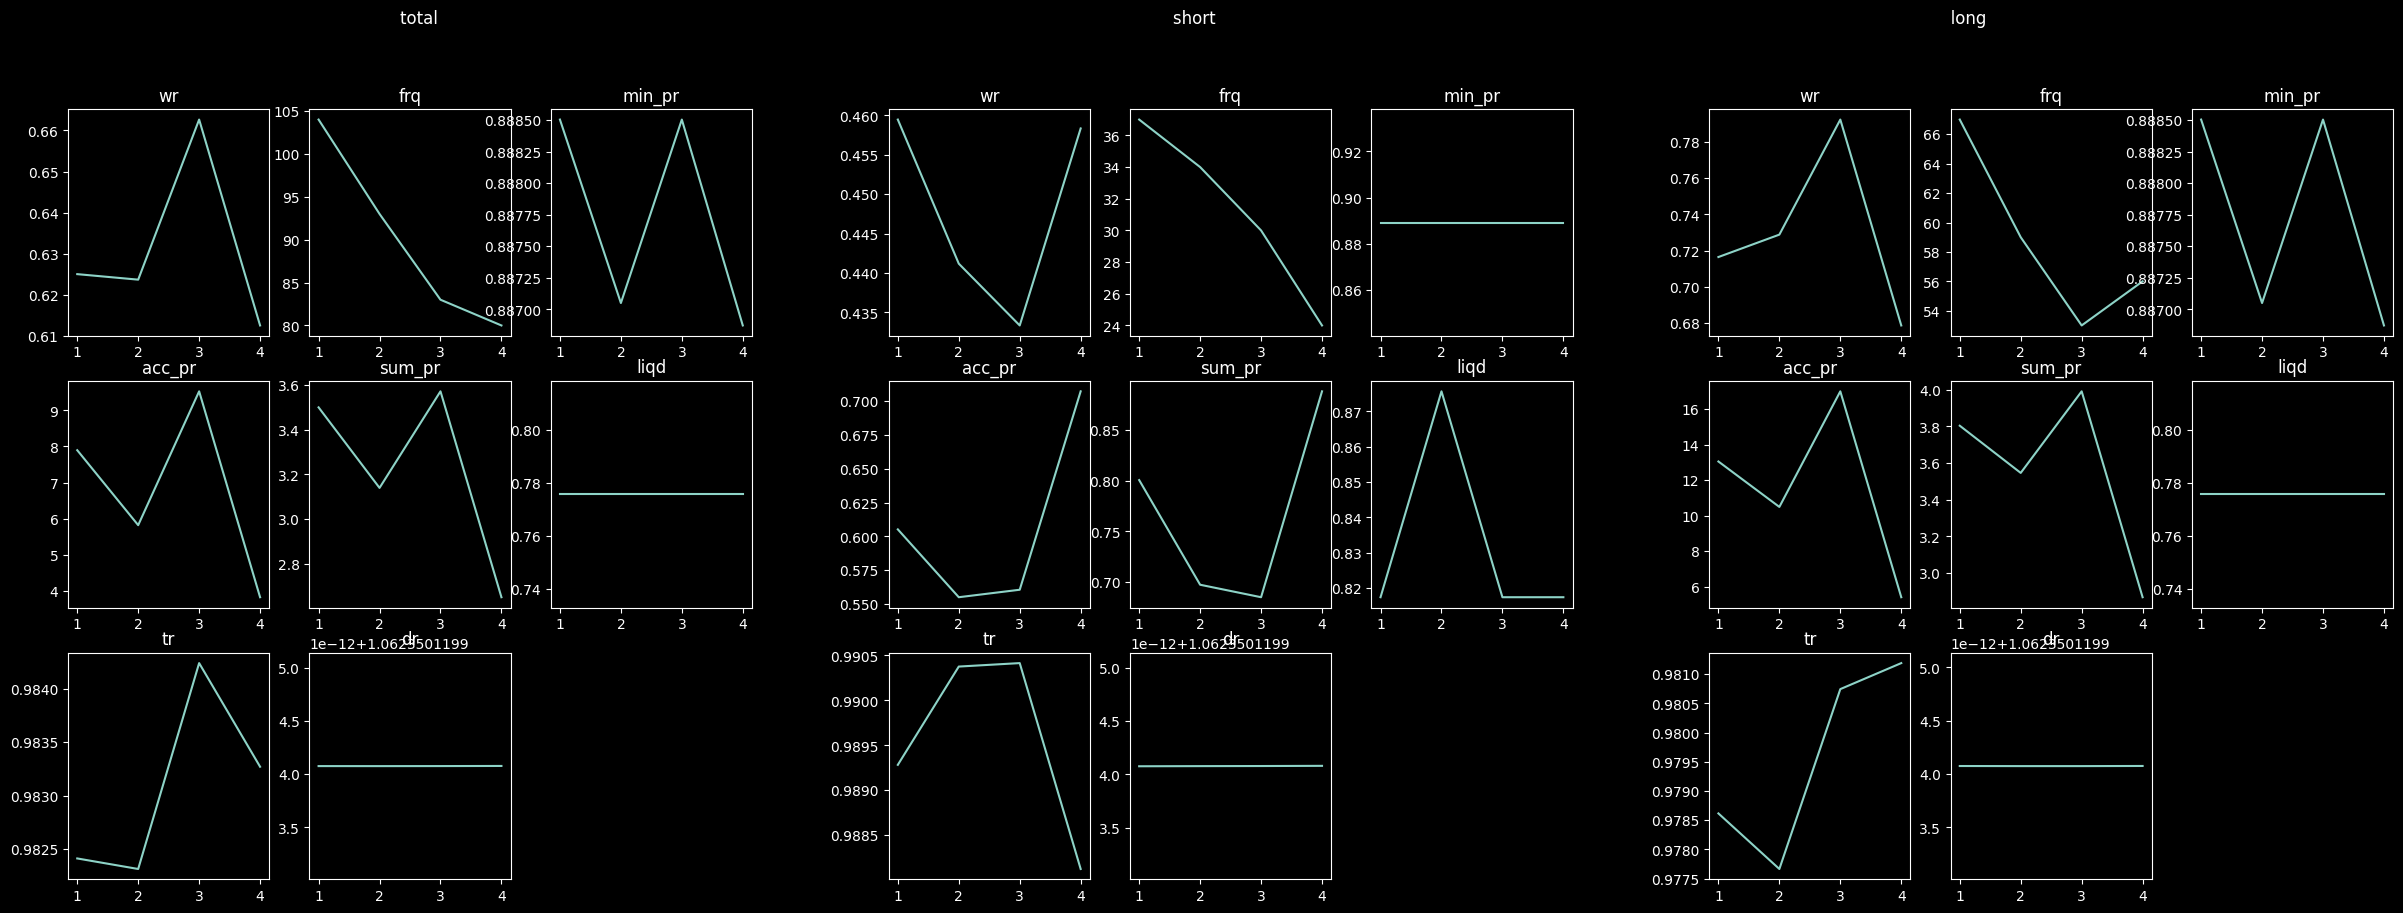

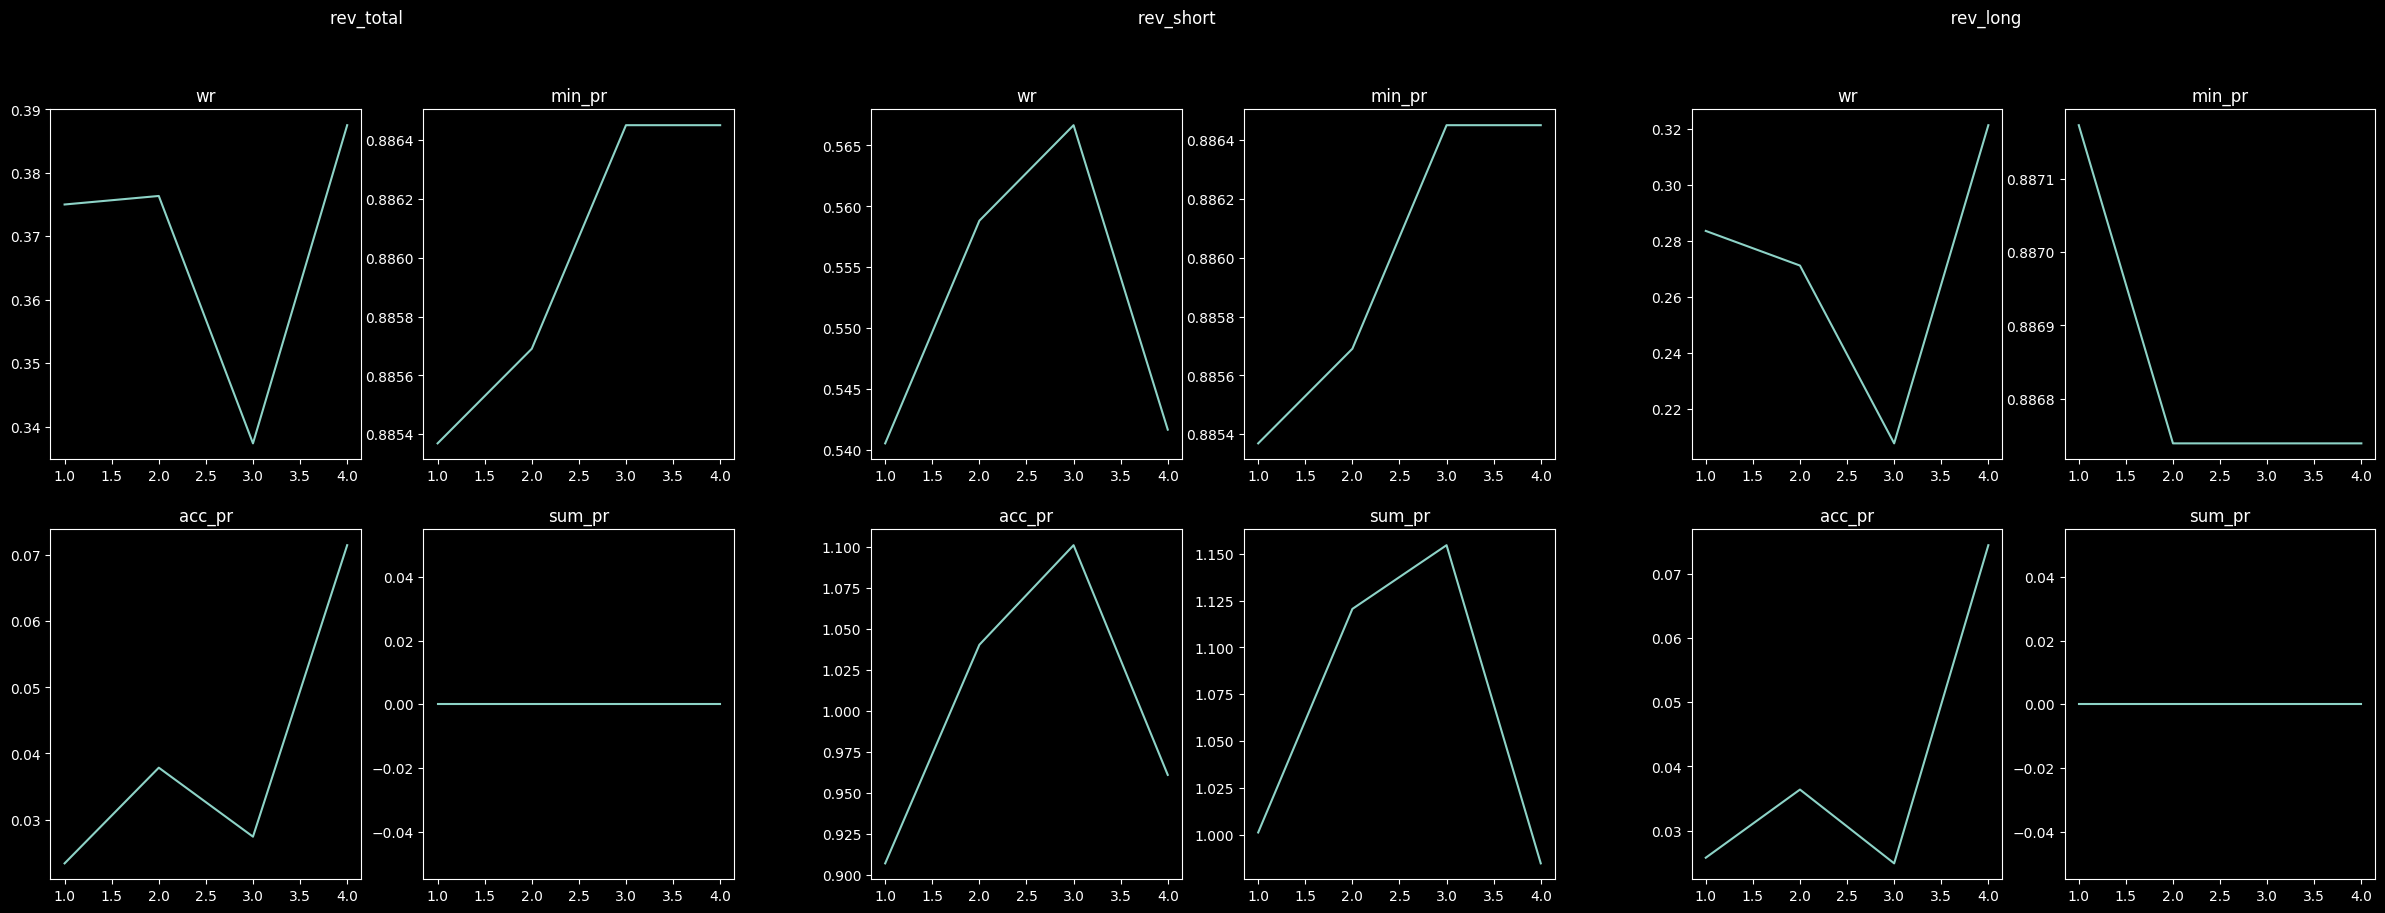

In [ ]:
# print(survey_df)

plt.style.use('dark_background')

title_name_list = [["total", "short", "long"], ["rev_total", "rev_short", "rev_long"]]
survey_dfs_list = [[survey_df, short_survey_df, long_survey_df], [rev_survey_df, rev_short_survey_df, rev_long_survey_df]]
# title_name = 
# survey_df_list = 

space_ = " " * 140

for d_idx, (title_name, survey_dfs) in enumerate(zip(title_name_list, survey_dfs_list)):

  fig = plt.figure(figsize=(30, 10))

  gs = gridspec.GridSpec(nrows=1, # row 몇 개 
                          ncols=3, # col 몇 개 
                          # height_ratios=[1, 1, 1]
                        )

  # gs = fig.add_gridspec(1, 3, wspace=0, hspace=0)

  if d_idx == 0:
    nrows, ncols, h_r = 3, 3, [1, 1, 1]
  else:
    nrows, ncols, h_r = 2, 2, [1, 1]

  for gs_idx, (title, s_df) in enumerate(zip(title_name, survey_dfs)):  


    inner_gs = gs[gs_idx].subgridspec(nrows=nrows, # row 몇 개 
                          ncols=ncols, # col 몇 개 
                          height_ratios=h_r
                        )

    for col_idx, s_cols in enumerate(s_df.columns):
      plt.subplot(inner_gs[col_idx])
      plt.plot(s_df[s_cols])
      plt.title(s_cols)

  # plt.suptitle("total" + " " * 140 + "short" + " " * 140 + "long")
  plt.suptitle(space_.join(title_name))
  plt.show()
  print("\n")

##### frequency check

[0. 0. 0. ... 0. 0. 0.]
(70, 1)


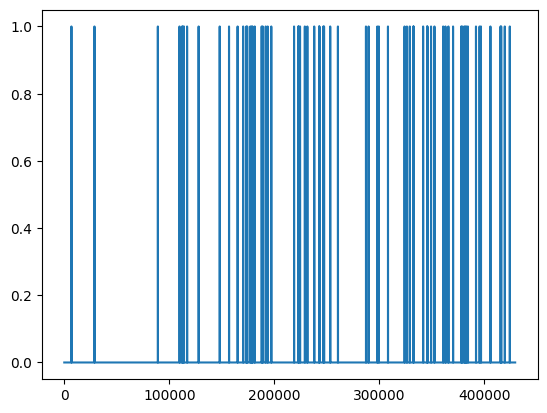

In [ ]:
total_len = np.zeros(len(res_df))
print(total_len)
np_trade_list = np.array(trade_list)
# print(np_trade_list.shape)
print(np_trade_list[:, [0], [0]].shape)
total_len[np_trade_list[:, [0], [0]]] = 1

plt.plot(total_len)
plt.show()

##### ep const. legacy

In [ ]:

   # --------------- ema --------------- #   
  # res_df['ema5_1m'] = ema(res_df['close'], 5).shift(1)

  #   # --------------- cloud bline --------------- #   
  # res_df['cloud_bline_1m'] = cloud_bline(res_df, 26).shift(1)
  
    #       stochastic      #
  # res_df['stoch'] = stoch(res_df, 5, 3, 3)

    #       fisher      #
  # res_df['fisher30'] = fisher(res_df, 30)
  # res_df['fisher60'] = fisher(res_df, 60)
  # res_df['fisher120'] = fisher(res_df, 120)

    #       cctbbo      #
  # res_df['cctbbo'], _ = cct_bbo(res_df, 21, 13)

    #       ema_roc      #
  # res_df['ema_roc'] = ema_roc(res_df['close'], 13, 9)


   # ------------------------------ htf data ------------------------------ #    

  #             Todo              #
  # htf_df = pd.read_excel(date_path2 + key.replace("_st1h_backi2", ""), index_col=0)
  # htf_df = pd.read_excel(date_path3 + key.replace("_st1h_backi2", ""), index_col=0)
  # # htf_df = pd.read_excel(date_path4 + key.replace("_st1h_backi2", ""), index_col=0)
  # # # htf_df = pd.read_excel(date_path5 + key.replace("_st1h_backi2", ""), index_col=0)
  # # # # # # htf_df = pd.read_excel(date_path6 + key.replace("_st1h_backi2", ""), index_col=0)

  # # ---- htf index slicing ---- #
  # htf_df = htf_df.loc[:res_df.index[-1]]
  
  # print("res_df.index[-1] :", res_df.index[-1])
  # print("htf_df.index[-1] :", htf_df.index[-1])

  # res_df = dc_line(res_df, htf_df, '5m')
  # res_df = dc_level(res_df, '5m', 1)


  # # # if "sma4" in res_df.columns:
  # # #   res_df.drop("sma4", axis=1, inplace=1)

  # # htf_df['sma'] = htf_df['close'].rolling(60).mean()
  # # res_df = res_df.join(pd.DataFrame(index=res_df.index, data=to_lower_tf(res_df, htf_df, [-1]), columns=['sma_30m']))
  
  # htf_df['stoch'] = stoch(htf_df, 13, 3, 3)
  # res_df = res_df.join(pd.DataFrame(index=res_df.index, data=to_lower_tf(res_df, htf_df, [-1], backing_i=-1), columns=['stoch_5m']))

   
  # fifth_df['ema'] = ema(fifth_df['close'], 5)
  # res_df = res_df.join(pd.DataFrame(index=res_df.index, data=to_lower_tf(res_df, fifth_df, [-1]), columns=['ema5']))

        # -------------- dr scheduling -------------- #
        # if config.ep_set.entry_type == 'MARKET':
        #   mr_const_cnt += 1
        #   if (res_df['close'].iloc[i] - res_df['short_tp'].iloc[i]) / (res_df['short_out'].iloc[i] - res_df['close'].iloc[i]) <= config.ep_set.tr_thresh * (1 + config.ep_set.dr_error):  
        #     mr_score += 1

           
        # ------- entry once ------- #   
        # prev_entry_cnt = 0
        # for back_i in range(i - 1, 0, -1):
        #   if res_df['entry'][back_i] == 1:
        #     break

        #   elif res_df['entry'][back_i] == -1:
        #     prev_entry_cnt += 1          
        # # # print("prev_entry_cnt :", prev_entry_cnt)

        # mr_const_cnt += 1
        # # if prev_entry_cnt <= config.ep_set.entry_incycle:
        # # if prev_entry_cnt == config.ep_set.entry_incycle:
        # if prev_entry_cnt >= config.ep_set.entry_incycle:
        #   mr_score += 1

        # ------- htf zoning ------- #   
        # mr_const_cnt += 1
        #   #       bb zone     #
        # if res_df['close'].iloc[i] < res_df['bb_lower_%s' % bbz_interval].iloc[i]:
        # # if res_df['close'].iloc[i] < res_df['bb_lower2_1h'].iloc[i]:
        # # if res_df['close'].iloc[i] < res_df['bb_base_1h'].iloc[i]:

        #   #       cbline zone     #
        # # if res_df['close'].iloc[i] < res_df['cloud_bline_%s' % cb_interval].iloc[i]:

        #   mr_score += 1

  
        # ------- ben ep_in's tp done ------- #   
        # mr_const_cnt += 1
        # if res_df['low'].iloc[i] > res_df['short_tp'].iloc[i]:
        #   mr_score += 1


        # -------------- feature dist const. -------------- #
        # if initial_i < input_size:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # entry_input_x = min_max_scale(res_df[selected_price_colname].iloc[initial_i - input_size:initial_i].values)
       
        # re_entry_input_x = expand_dims(entry_input_x)

        # entry_vector = model.predict(re_entry_input_x, verbose=0)
        # # print(test_result.shape)

        # f_dist = vector_dist(entry_vector, selected_vector)
        # print("f_dist :", f_dist)

        # if f_dist < fdist_thresh:
          # mr_score += 1



          

        # -------------- dr scheduling -------------- #
        # if config.ep_set.entry_type == "MARKET":
          # mr_const_cnt += 1        
          # if (res_df['long_tp'].iloc[i] - res_df['close'].iloc[i]) / (res_df['close'].iloc[i] - res_df['long_out'].iloc[i]) <= config.ep_set.tr_thresh * (1 + config.ep_set.dr_error): # 일반적으로 dr 상에서 tp 비율이 더 커짐 (tr 보다)
          #   mr_score += 1

        # -------------- ep limit -------------- #    
        # mr_const_cnt += 1
        # # if (res_df['open'].iloc[i] - res_df['long_ep'].iloc[i]) / res_df['open'].iloc[i] < config.ep_set.max_eplim_pct:
        # if config.ep_set.min_eplim_pct < (res_df['open'].iloc[i] - res_df['long_ep'].iloc[i]) / res_df['open'].iloc[i] < config.ep_set.max_eplim_pct:
        # # if 0 < (res_df['open'].iloc[i] - res_df['long_ep'].iloc[i]) / res_df['open'].iloc[i] < config.ep_set.max_eplim_pct:
        #   # if res_df['st_gap_15m'].iloc[i] / res_df['open'].iloc[i] < 0:
        #   #   print("i, res_df['st_gap_15m'].iloc[i] :", i, res_df['st_gap_15m'].iloc[i])
        #   mr_score += 1


        # -------------- entry once -------------- #    
        # prev_entry_cnt = 0
        # for back_i in range(i - 1, 0, -1):
        #   if res_df['entry'][back_i] == -1:
        #     break

        #   elif res_df['entry'][back_i] == 1:
        #     prev_entry_cnt += 1
          
        # mr_const_cnt += 1
        # # if prev_entry_cnt <= config.ep_set.entry_incycle:
        # # if prev_entry_cnt == config.ep_set.entry_incycle:
        # if prev_entry_cnt >= config.ep_set.entry_incycle:
        #   mr_score += 1


        # ------- htf zoning ------- #   
        # mr_const_cnt += 1
          
        #   #       bb zone     #
        # if res_df['close'].iloc[i] > res_df['bb_upper_%s' % bbz_interval].iloc[i]:
        # # if res_df['close'].iloc[i] > res_df['bb_upper2_1h'].iloc[i]:
        # # if res_df['close'].iloc[i] > res_df['bb_base_1h'].iloc[i]:
        
        #   #       cbline zone     #
        # # if res_df['close'].iloc[i] > res_df['cloud_bline_%s' % cb_interval].iloc[i]:

        #   mr_score += 1


        # ------- ben ep_in's tp done ------- #   
        # mr_const_cnt += 1
        # if res_df['high'].iloc[i] < res_df['long_tp'].iloc[i]:
        #   mr_score += 1


        # -------------- feature dist const. -------------- #
        # if initial_i < input_size:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue
          
        # entry_input_x = min_max_scale(res_df[selected_price_colname].iloc[initial_i - input_size:initial_i].values)
       
        # re_entry_input_x = expand_dims(entry_input_x)

        # entry_vector = model.predict(re_entry_input_x, verbose=0)
        # # print(test_result.shape)

        # f_dist = vector_dist(entry_vector, selected_vector)
        # print("f_dist :", f_dist)

        # if f_dist < fdist_thresh:
          # mr_score += 1

### nontp survey

##### term & liqd

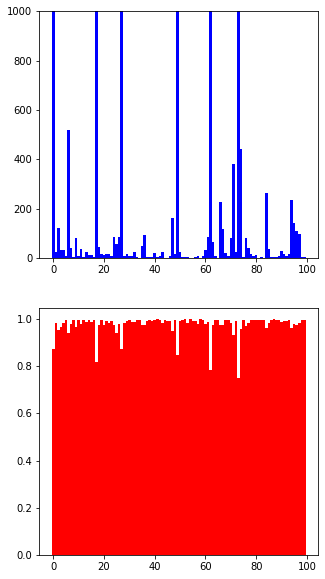

In [ ]:
# print(nontp_long_indexs)

plot_size = 100

for s_i in range(plot_size, len(trade_list), plot_size):

  slice_trade_list = trade_list[s_i - plot_size:s_i]
  slice_liqd_list = liqd_list[s_i - plot_size:s_i]

  # print(len(slice_trade_list))
  np_trade = np.array(slice_trade_list)
  trade_term = np_trade[:, [2]] - np_trade[:, [1]]

  plt.figure(figsize=(5, 10))
  plt.subplot(211)
  plt.bar(np.arange(len(trade_term)), trade_term.reshape(-1,), width=1, color='b')

  # plt.plot(trade_term.reshape(-1,))
  plt.ylim(0, 1000)
  # plt.show()
  # print()

  plt.subplot(212)
  # print(len(liqd_list))
  # plt.bar(np.arange(len(liqd_list)), liqd_list)
  plt.bar(np.arange(len(slice_liqd_list)), np.array(slice_liqd_list), width=1, color='r')
  # plt.plot(slice_liqd_list)
  plt.show()

print()

##### check nontp index

In [ ]:
# np_nontp_short_indexs = np.array(nontp_short_indexs)
# np_nontp_long_indexs = np.array(nontp_long_indexs)

# short_til_term = len(res_df) - np_nontp_short_indexs
# long_til_term = len(res_df) - np_nontp_long_indexs

max_nontp_short_term = len(res_df) - nontp_short_indexs[0]
max_nontp_long_term = len(res_df) - nontp_long_indexs[0]

print(max_nontp_long_term)

32747


# traded section plot

## plot with off-color st with dash

### sorted plot_check

In [ ]:
# plot_pr_list[:100]

plt.plot(np_pr)
plt.axhline(1)
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


open_side : 1.0
np_timeidx[open_idx] : 14
long_tp : 449.3426825747133
long_out : 437.1365744759975
short real pr : [0.89925036]
long real pr : [1.09653968]


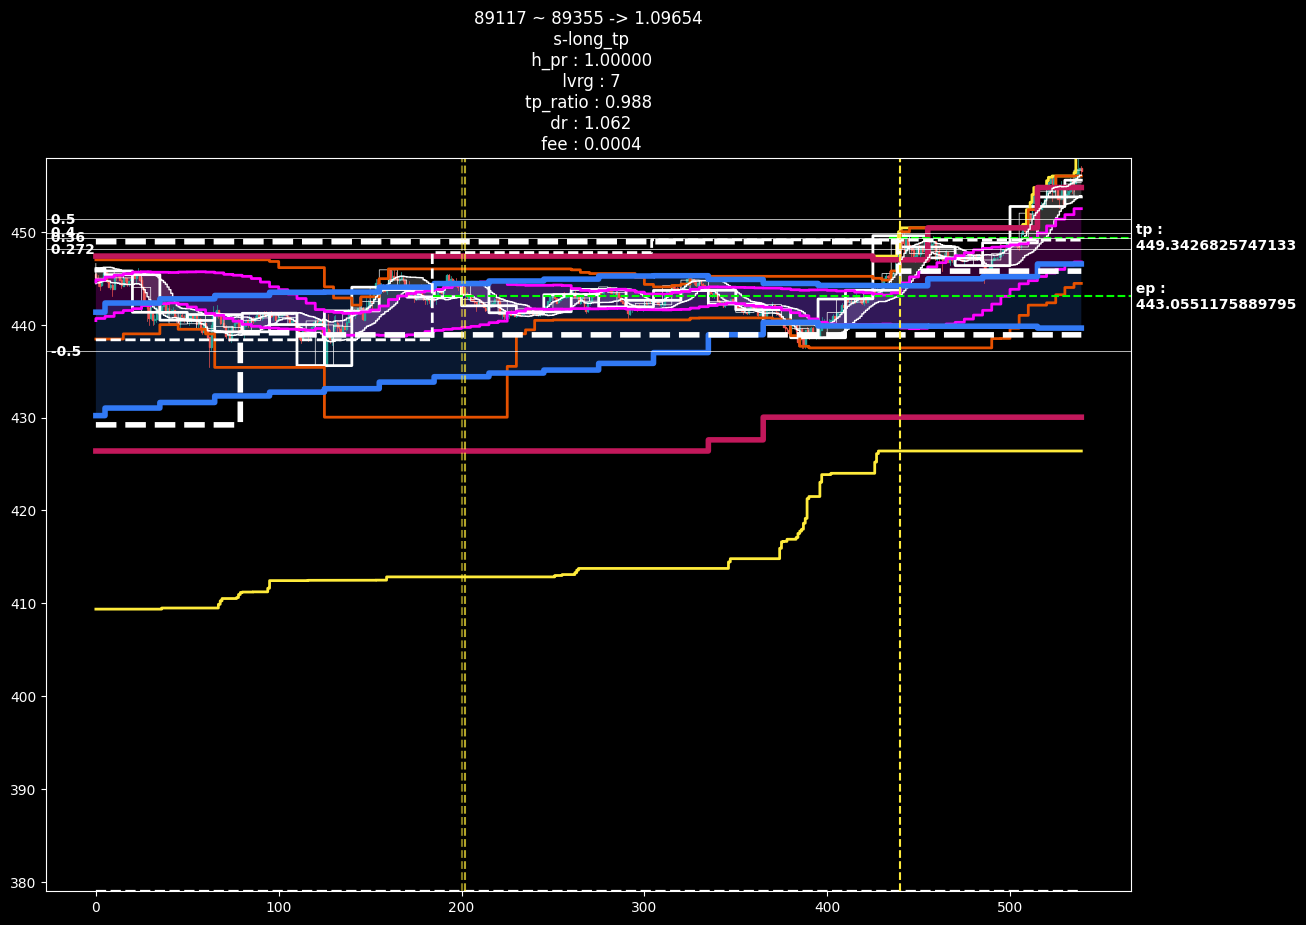


open_side : 1.0
np_timeidx[open_idx] : 59
long_tp : 520.4165392606943
long_out : 511.17372766937297
short real pr : [1.09800937]
long real pr : [0.88850503]


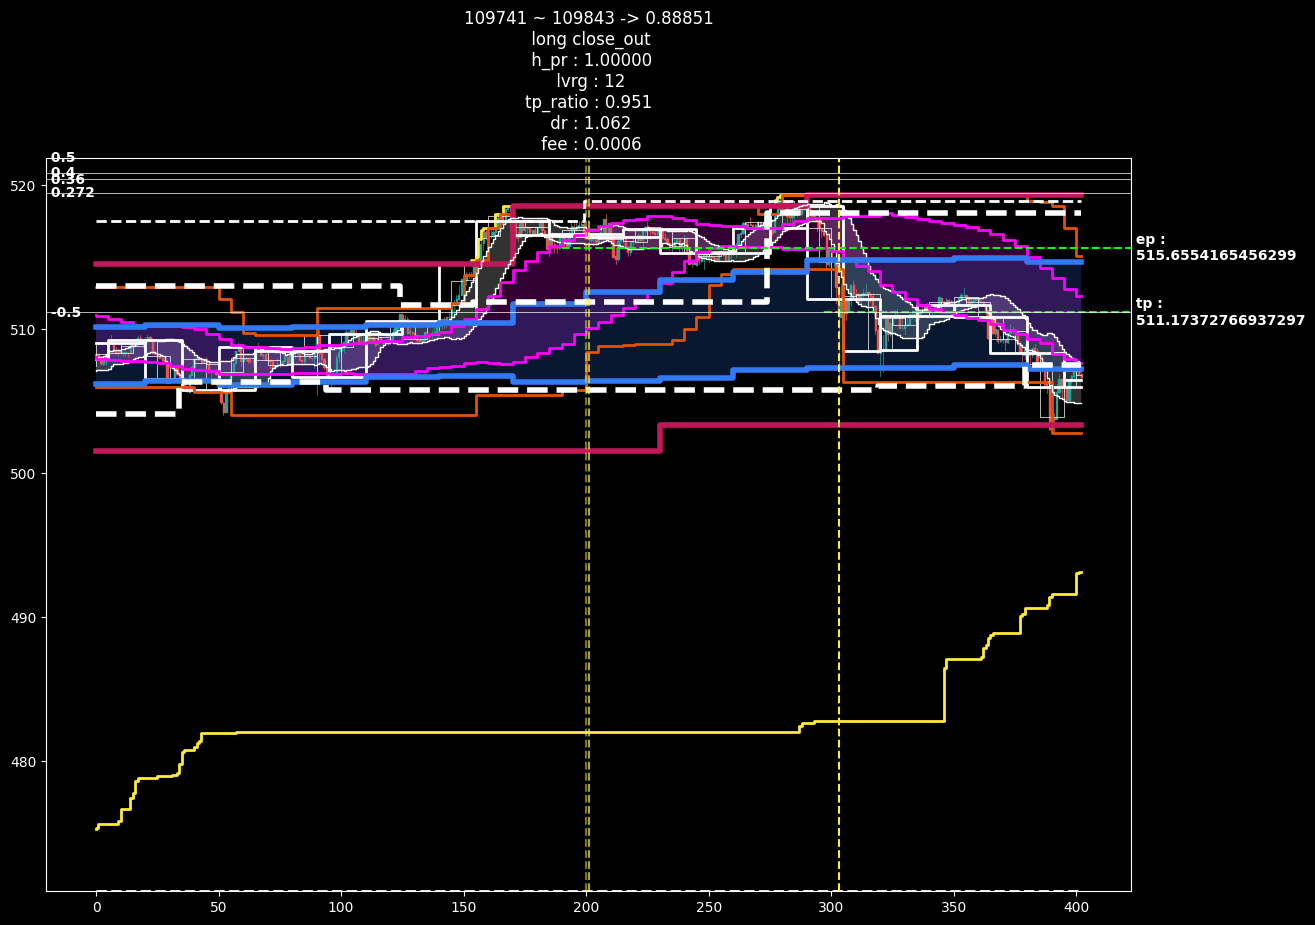


open_side : 1.0
np_timeidx[open_idx] : 34
long_tp : 749.5052129952813
long_out : 735.1601518365005
short real pr : [1.09747603]
long real pr : [0.89029945]


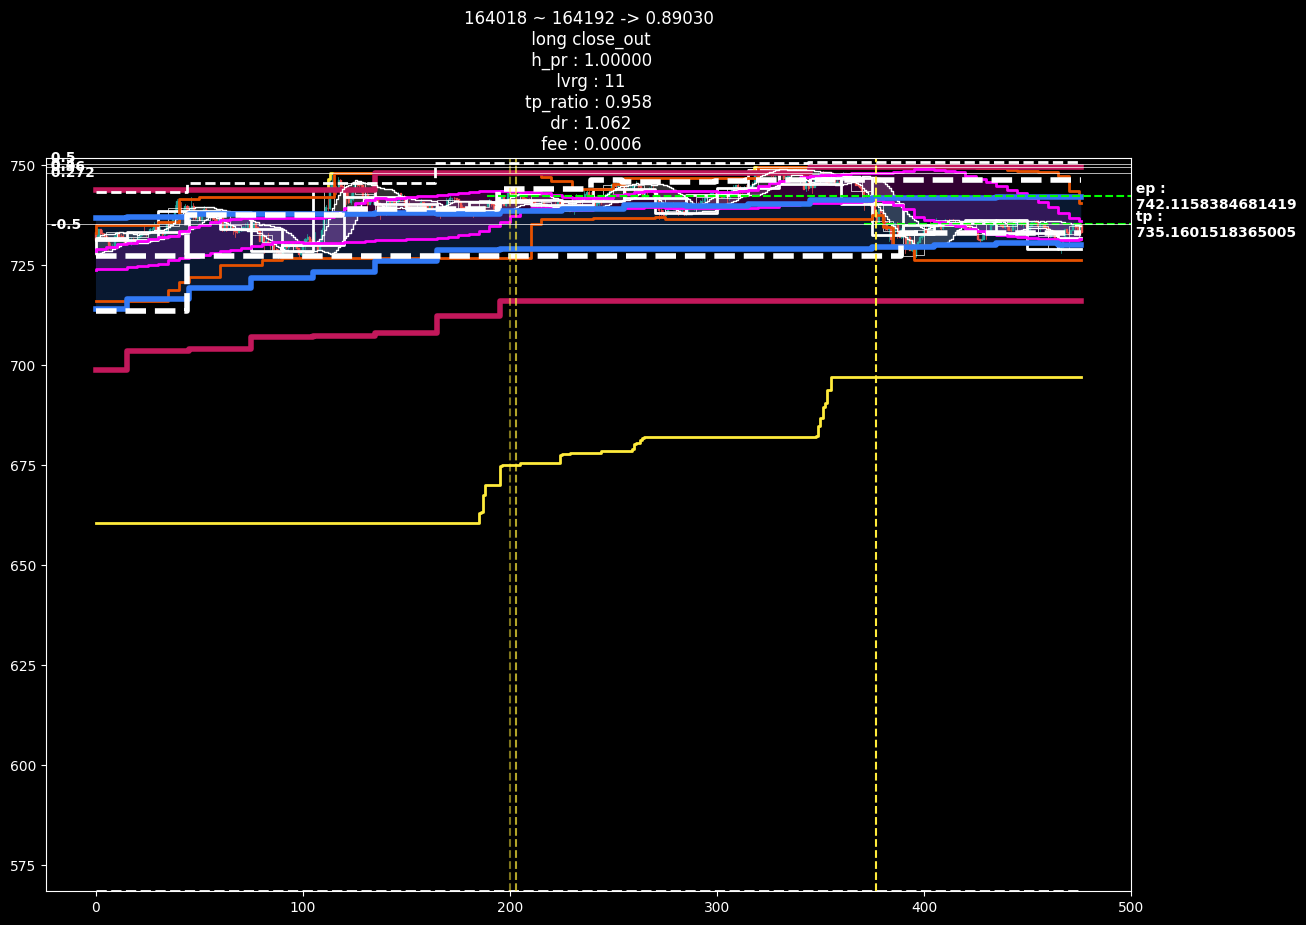


open_side : 1.0
np_timeidx[open_idx] : 24
long_tp : 1240.8839537591134
long_out : 1212.374982999674
short real pr : [0.88988809]
long real pr : [1.10418753]


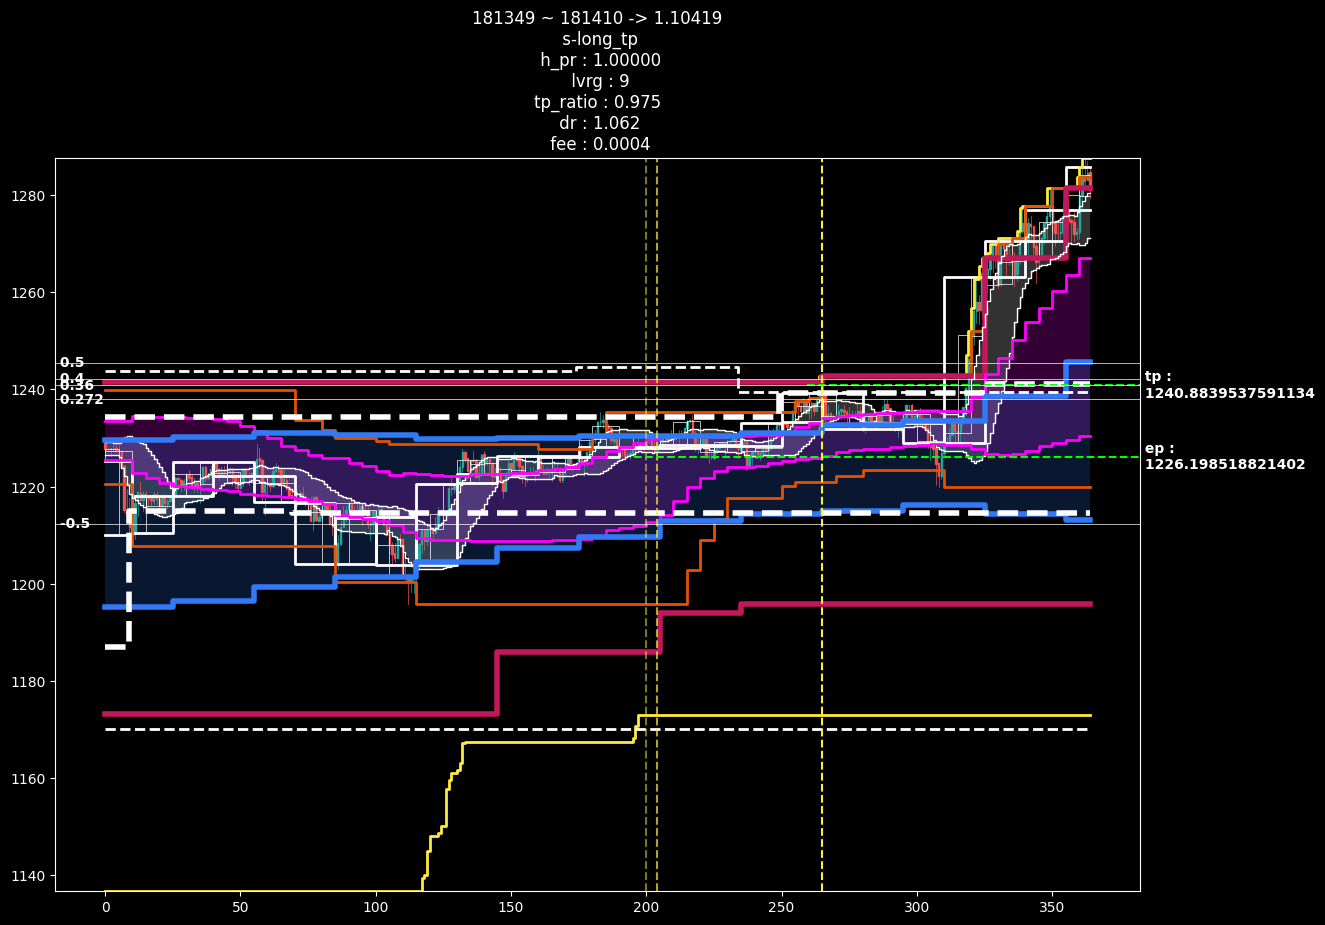


open_side : 1.0
np_timeidx[open_idx] : 24
long_tp : 1228.2172613139678
long_out : 1186.3951696007234
short real pr : [0.89235849]
long real pr : [1.10472043]


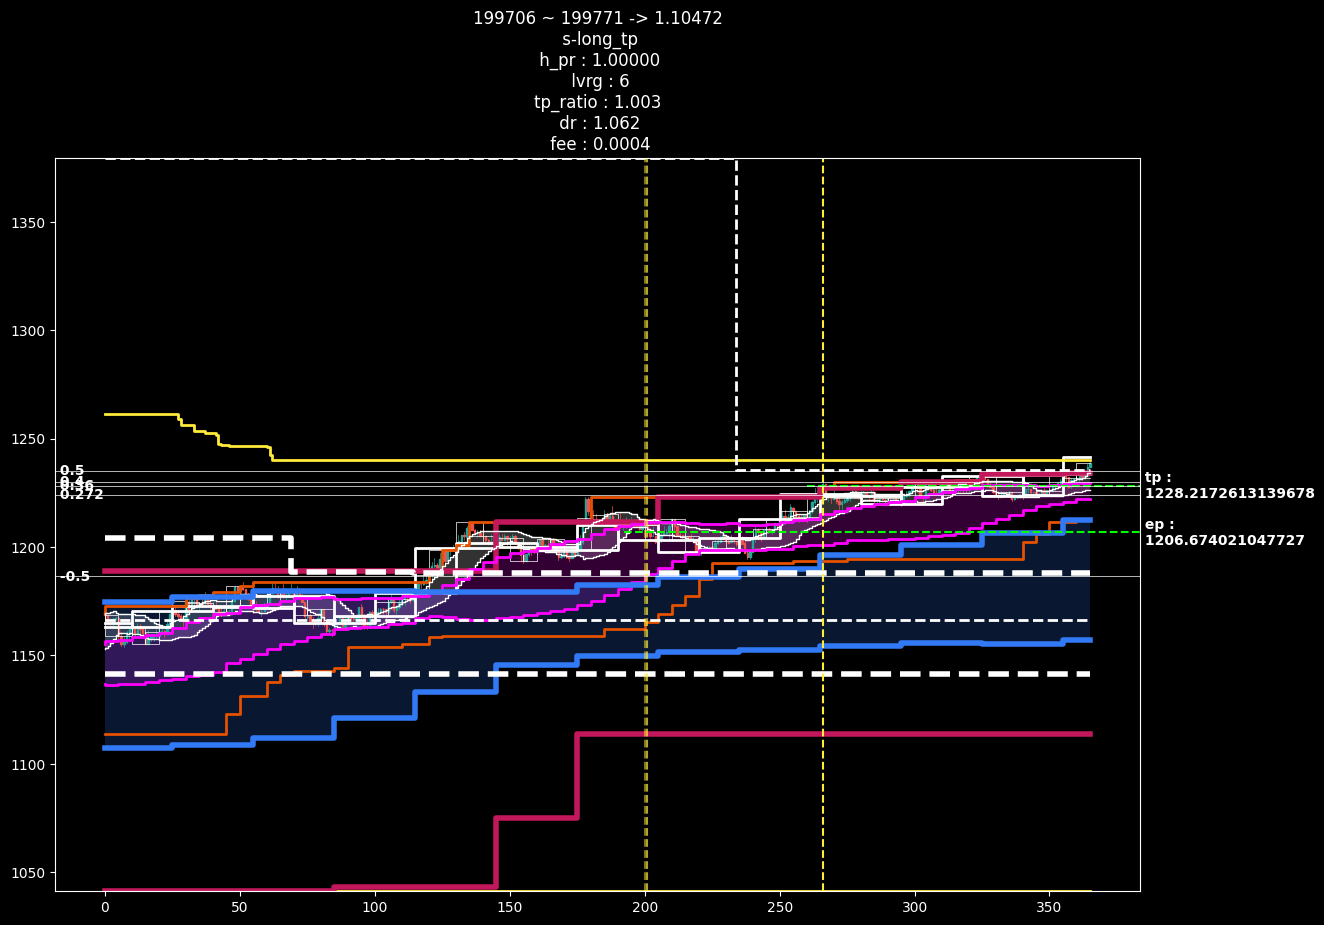


open_side : -1.0
np_timeidx[open_idx] : 14
short_tp : 1306.1730073855872
short_out : 1332.799488009407
short real pr : [1.10100702]
long real pr : [0.89208417]


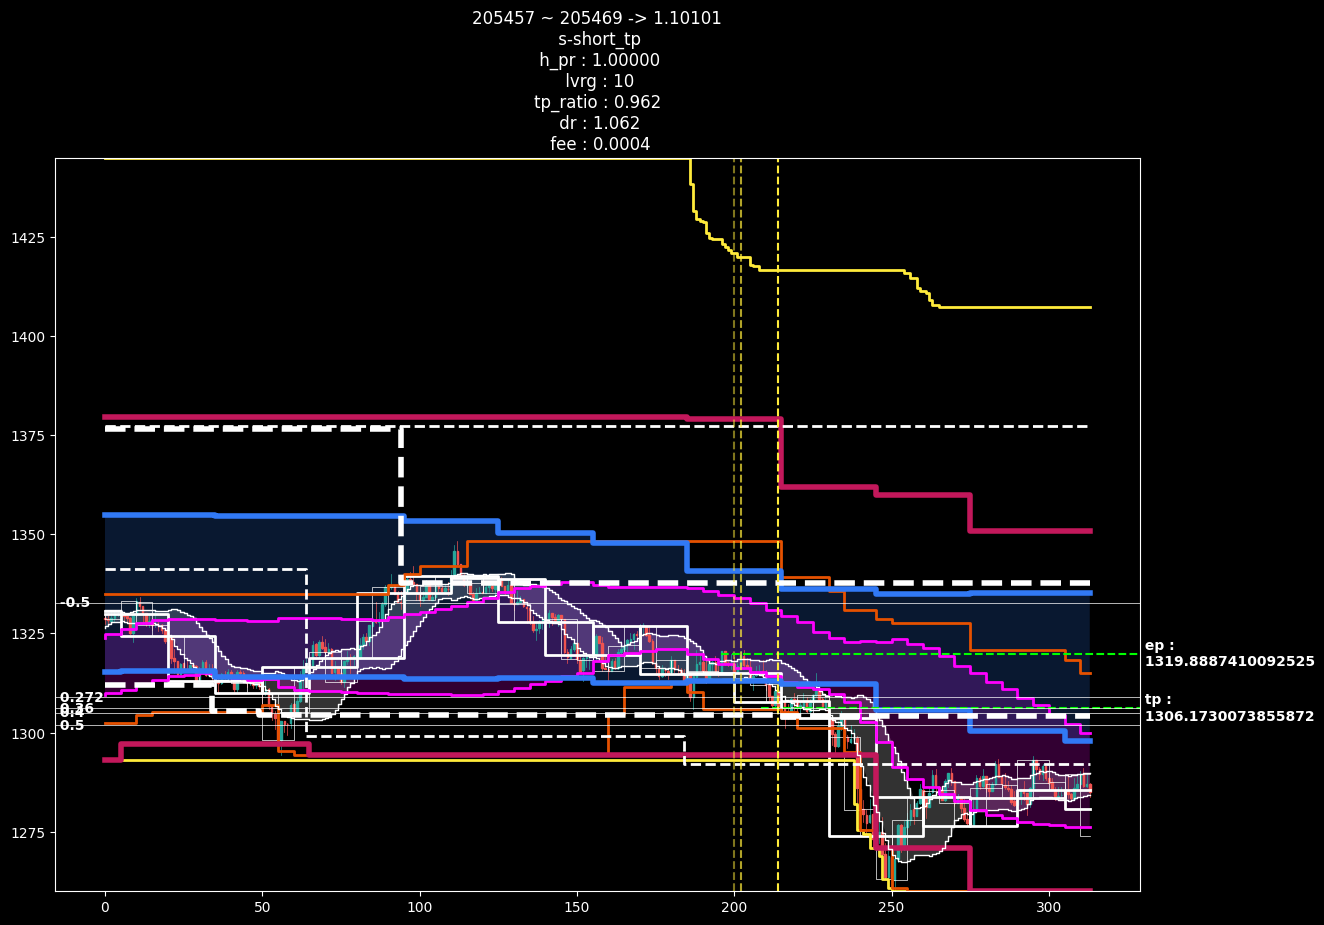


open_side : 1.0
np_timeidx[open_idx] : 4
long_tp : 1632.4732177605292
long_out : 1597.0783888825476
short real pr : [0.89588253]
long real pr : [1.09805279]


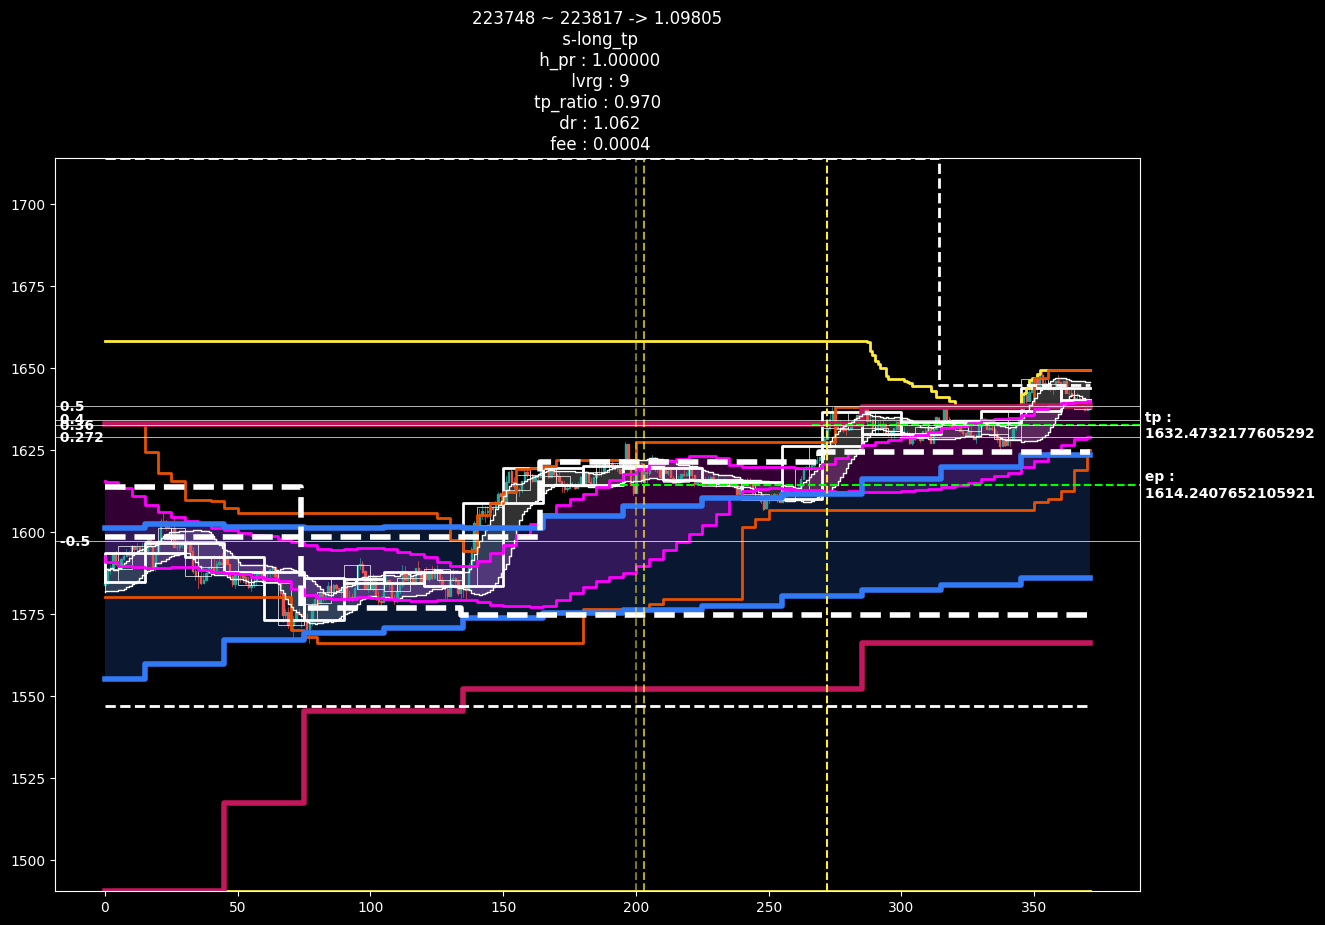


open_side : 1.0
np_timeidx[open_idx] : 44
long_tp : 1839.5226981600742
long_out : 1806.5184919706155
short real pr : [0.88429512]
long real pr : [1.10713943]


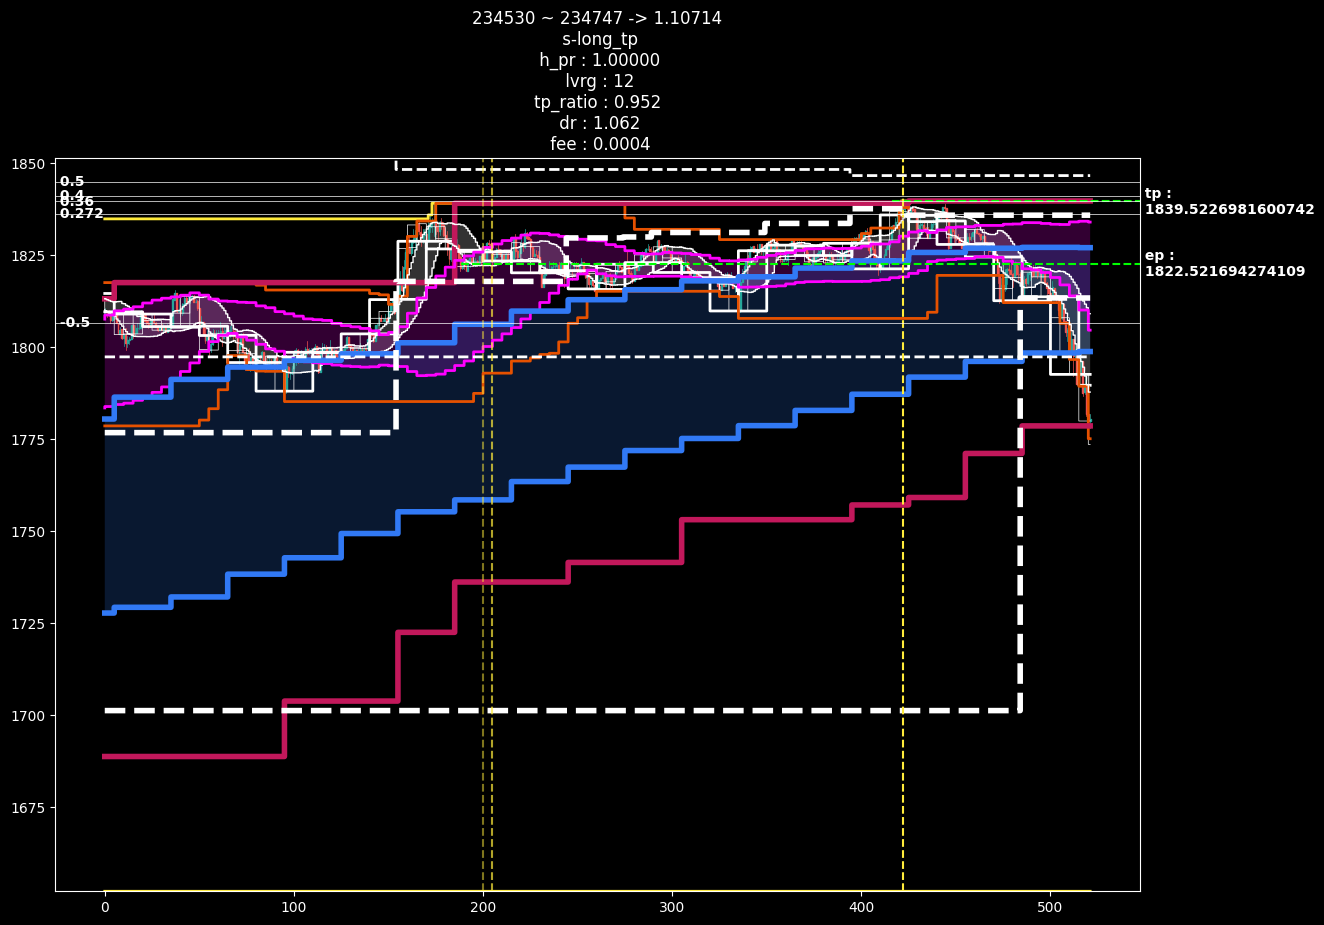


open_side : -1.0
np_timeidx[open_idx] : 29
short_tp : 1632.478226766152
short_out : 1663.4519951346147
short real pr : [0.89408518]
long real pr : [1.09361967]


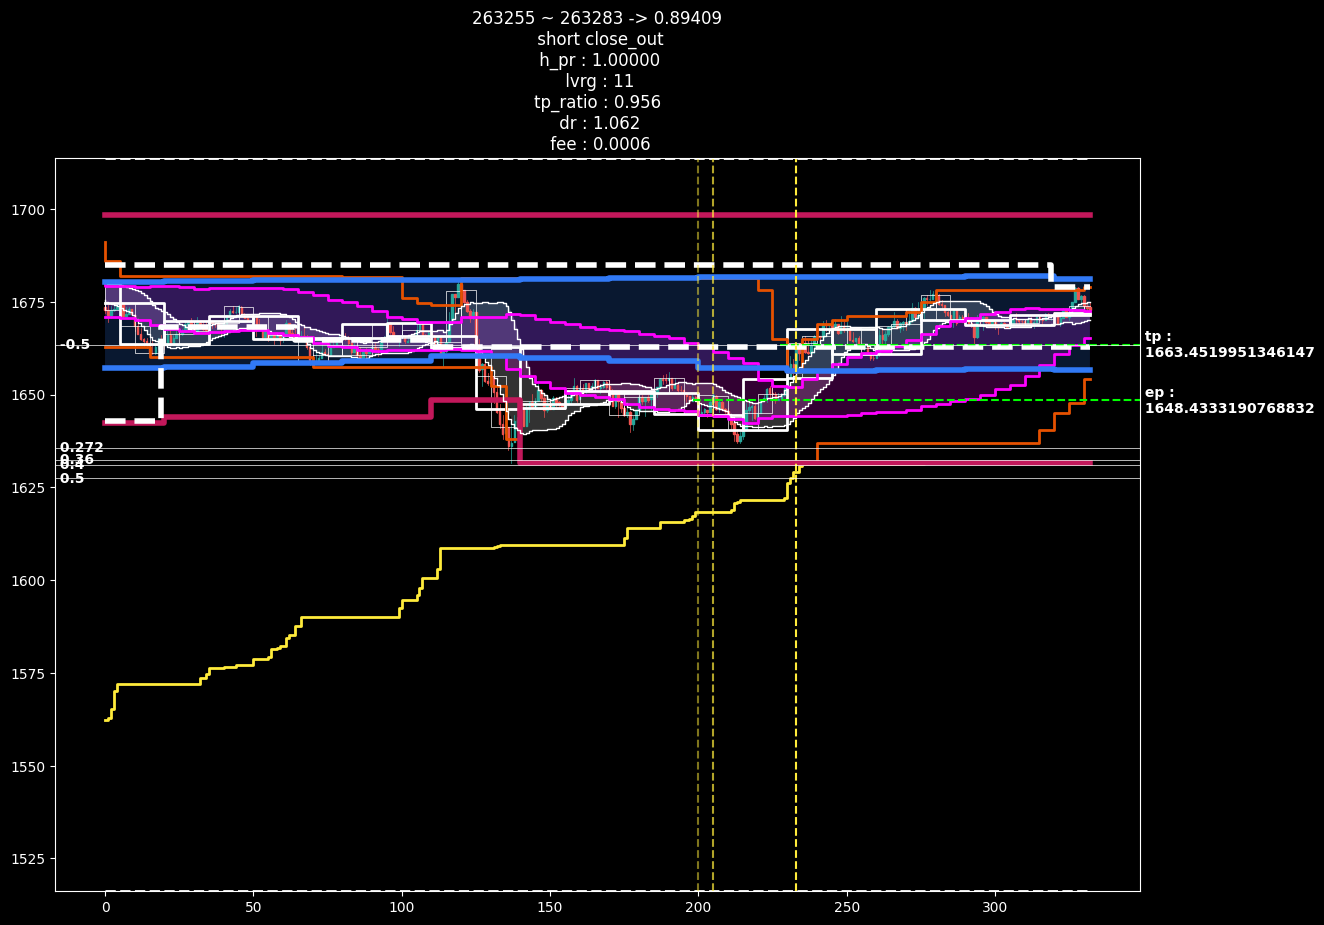


open_side : -1.0
np_timeidx[open_idx] : 54
short_tp : 1770.282953415741
short_out : 1833.642850520493
short real pr : [1.10821864]
long real pr : [0.88898386]


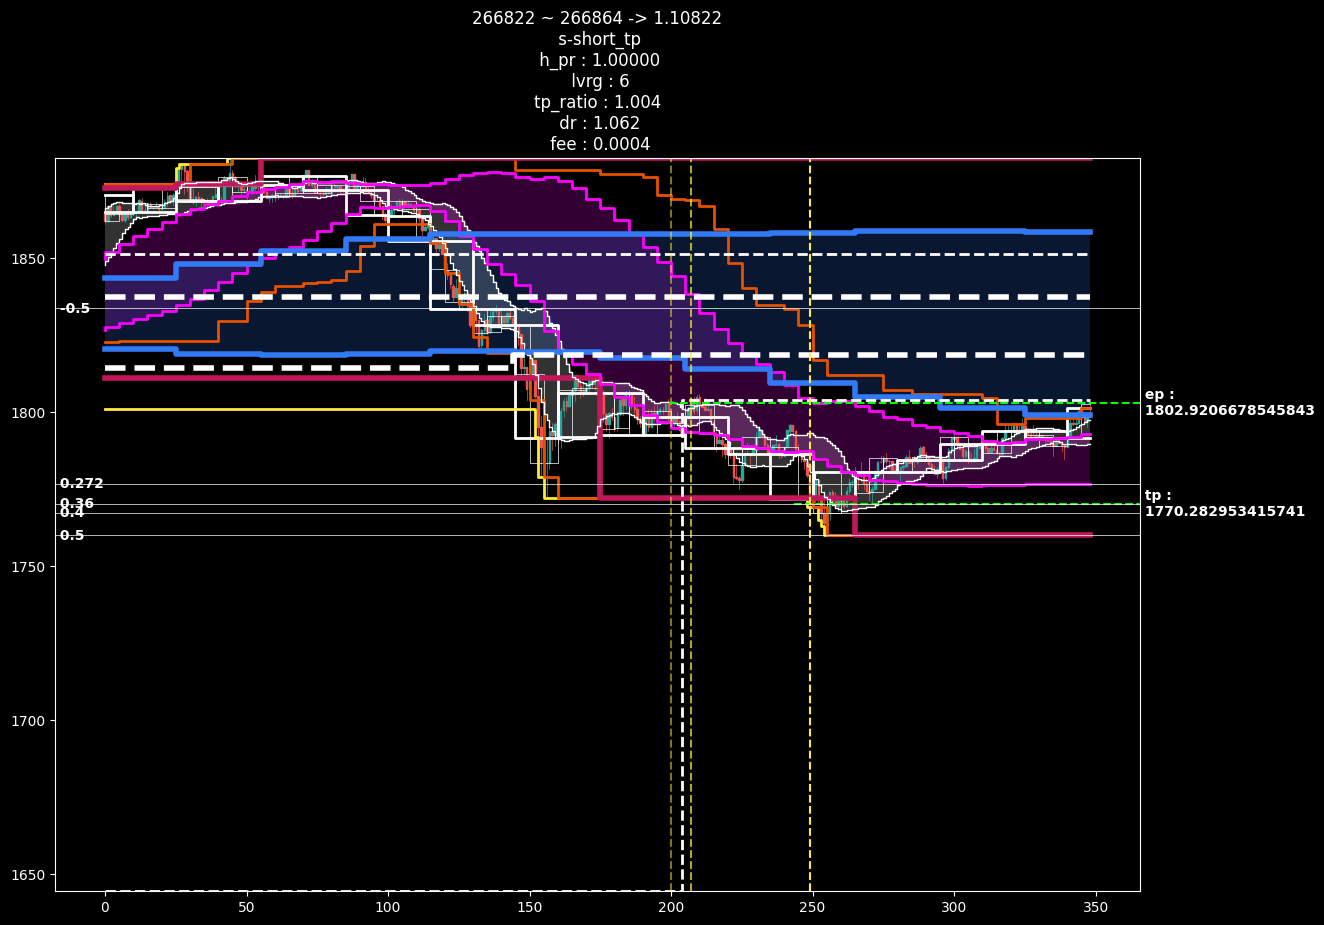


open_side : 1.0
np_timeidx[open_idx] : 44
long_tp : 2461.4335693222156
long_out : 2415.813371074344
short real pr : [0.89058121]
long real pr : [1.10163109]


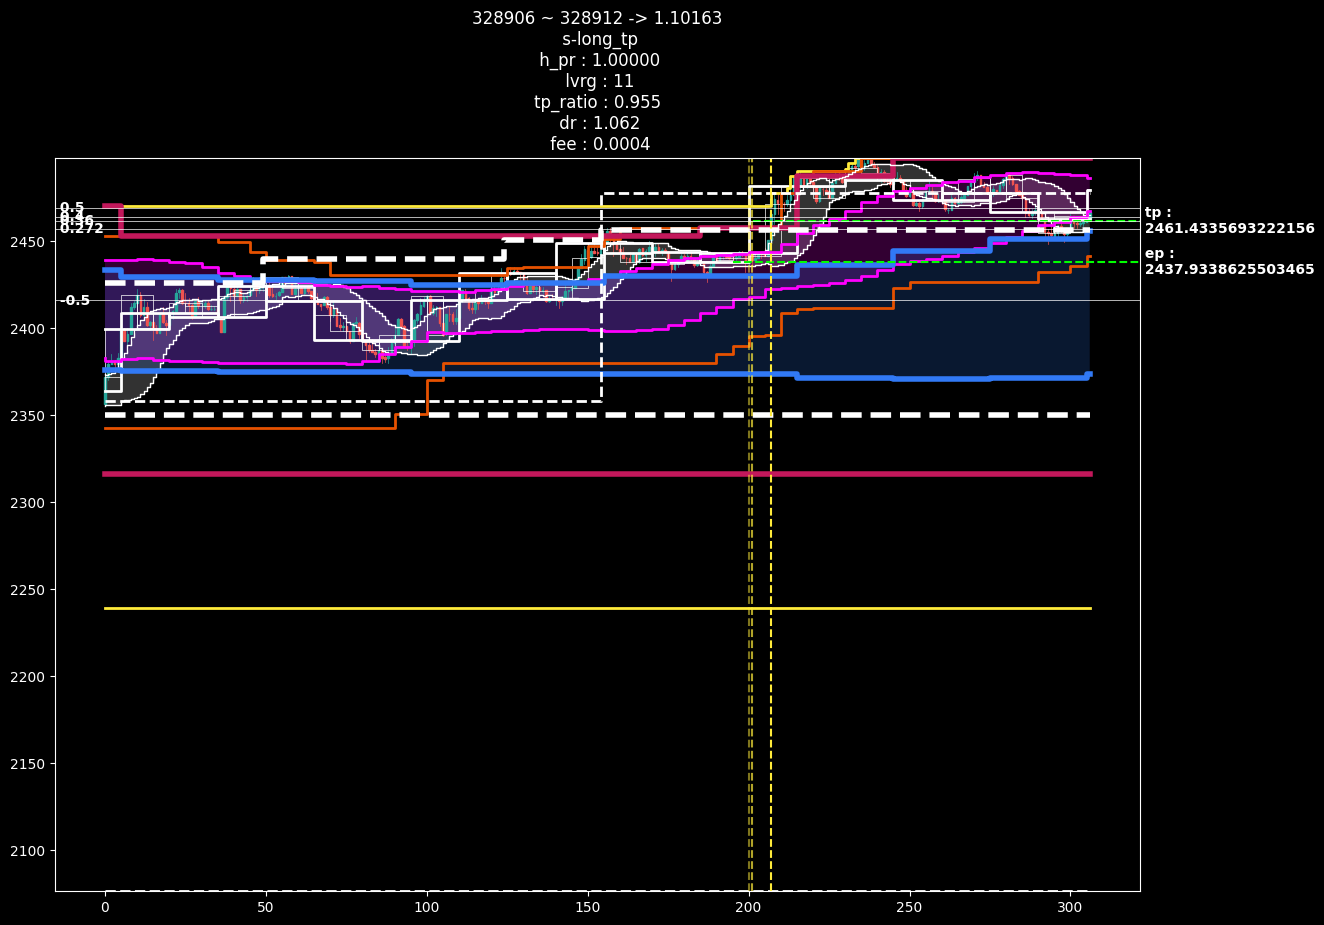


open_side : 1.0
np_timeidx[open_idx] : 24
long_tp : 2161.824100350561
long_out : 2109.4500368935887
short real pr : [0.89696308]
long real pr : [1.09789859]


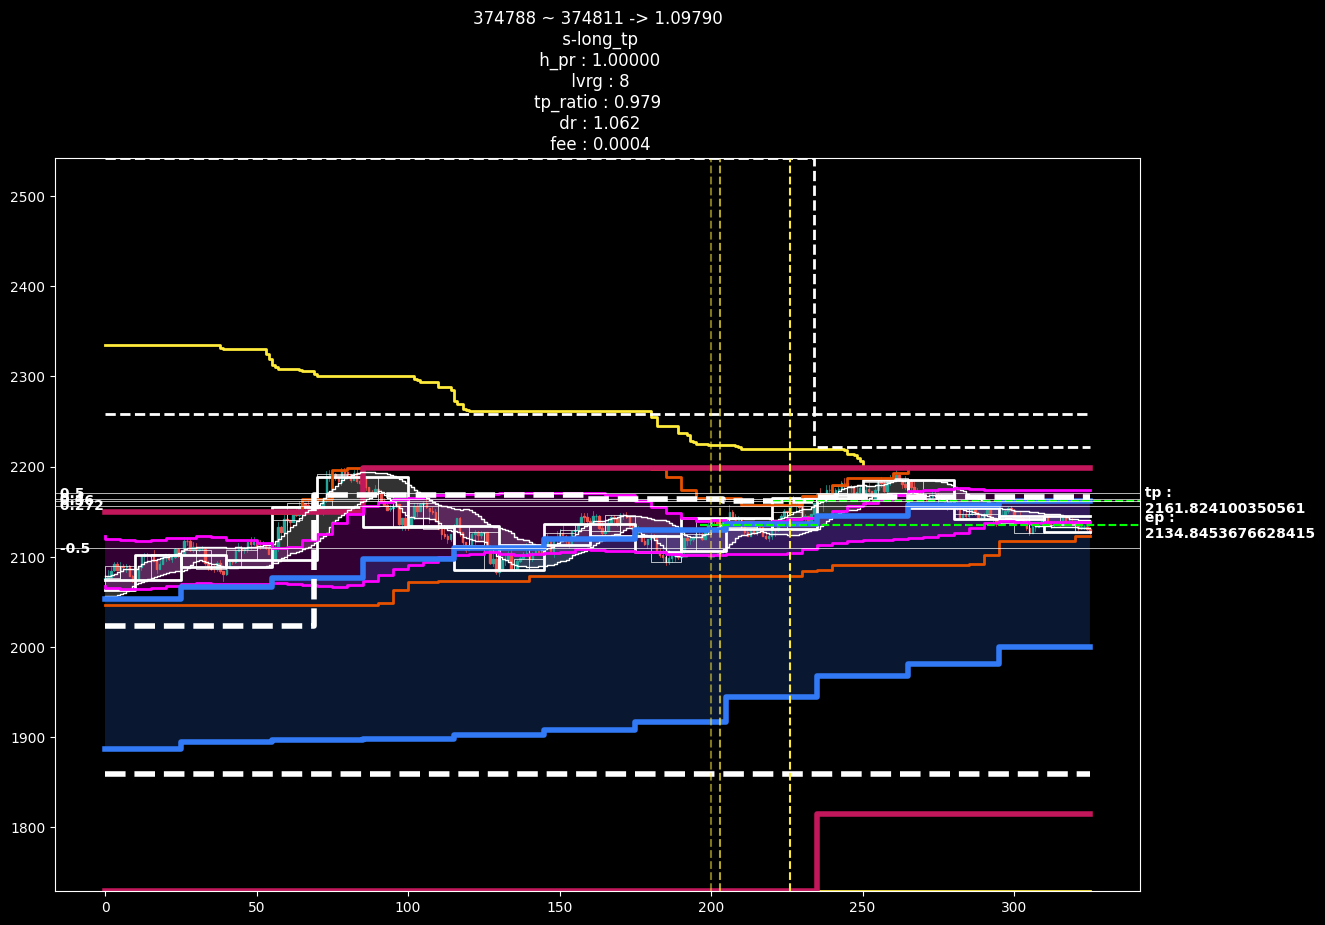

In [ ]:
assert len(open_list) == len(trade_list), "len(open_list) != len(trade_list)"

save_plot = 0
pr_sort = 0
pr_descend = 1
loss_case = 0
position = None

inversion = 0
hedge = 0

if save_plot:
  plot_check_dir = current_path + "plot_check/" +  key.replace(".ftr", "")
  try:
    os.mkdir(plot_check_dir)
  except:

    #     remove existing dir   #
    shutil.rmtree(plot_check_dir)
    print(plot_check_dir, 'removed !')
    os.mkdir(plot_check_dir)
    # pass
    

prev_plotsize = 200
post_plotsize = 100



if inversion:  

    plot_pr_list = rev_np_pr
    h_plot_pr_list = h_rev_np_pr  # hedge

else:

    plot_pr_list = np_pr
    try:
      h_plot_pr_list = h_np_pr
    except Exception as e:
      print("error in h_plot_pr :", e)
      h_plot_pr_list = np_pr


h_candle_intv1 = 5
h_candle_intv2 = 15
res_df = h_candle(res_df, h_candle_intv1)
res_df = h_candle(res_df, h_candle_intv2)


res_df = dtk_plot(res_df, dtk_itv2='15m', hhtf_entry=15, use_dtk_line=use_dtk_line)
# break

rtc_list = ["short_tp_1", "short_tp_gap", "long_tp_1", "long_tp_gap"]
# h_rtc_list = ["h_short_tp_1", "h_short_tp_gap", "h_long_tp_1", "h_long_tp_gap"]
dtk_list = ["short_dtk_1", "short_dtk_gap", "long_dtk_1", "long_dtk_gap",
            # "short_dtk_1_line", "short_dtk_gap_line", "long_dtk_1_line", "long_dtk_gap_line",
            "short_dtk_plot_1", "short_dtk_plot_gap", "long_dtk_plot_1", "long_dtk_plot_gap"]
dc_v2_list = ['dc_upper_v2', 'dc_lower_v2']


ohlc_list = ['open', 'high', 'low', 'close'] # + basic_st_list
hcandle_list = ['hopen_%s' % h_candle_intv1, 'hclose_%s' % h_candle_intv1, 'hopen_%s' % h_candle_intv2, 'hclose_%s' % h_candle_intv2]

# --------------------- dc & bb level --------------------- #
dc_interval = '1m'
hdc_interval = '5m'
hhdc_interval = '30m'

dc_list = ['dc_upper_%s' % dc_interval, 'dc_lower_%s' % dc_interval]
hdc_list = ['dc_upper_%s' % hdc_interval, 'dc_lower_%s' % hdc_interval]
hhdc_list = ['dc_upper_%s' % hhdc_interval, 'dc_lower_%s' % hhdc_interval]

bb_interval = dc_interval
hbb_interval = hdc_interval
hhbb_interval = hhdc_interval

bb_list = ['bb_upper_%s' % bb_interval, 'bb_lower_%s' % bb_interval]
hbb_list = ['bb_upper_%s' % hbb_interval, 'bb_lower_%s' % hbb_interval]
hhbb_list = ['bb_upper_%s' % hhbb_interval, 'bb_lower_%s' % hhbb_interval]

bbwp_list = ['bbwp', 'bbwp_ma']


senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']
senkoua_list = ['senkou_a1']
senkoub_list = ['senkou_b1']

sar_list = ['sar_15m']

# ma_list = ['sma1', 'sma4']
sma_list = ['sma_1m']

# -------------- price rolling indi. -------------- #
ema_list = ['ema5_1m']
# cb_list = ['cloud_bline_1m']
cb_list = ['cloud_bline_30m']
# cb_list = ['cloud_bline_5m']



# -------------- under price phase -------------- #
# macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist%s' % basic_st_interval]
# macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3']
# trix_list = ['trix1', 'trix2', 'trix3', 'trix4', 'trix%s' % basic_st_interval]
trix_list = ['trix1', 'trix2', 'trix3']
stoch_list = ['stoch_5m']
fisher_list = ['fisher30', 'fisher60', 'fisher120']
cctbbo_list = ['cctbbo']
emaroc_list = ['ema_roc']


# -------------- summation -------------- #
# input_colname = ohlc_list + basic_st_list + pline_list + bb_list + hbb_list + sma_list + cb_list + stoch_list + sar_list + dc_list
input_colname = ohlc_list + hcandle_list + bb_list + hbb_list + hhbb_list + dc_list + hdc_list + hhdc_list + dtk_list + dc_v2_list #+ rtc_list #+ h_rtc_list

# yrange_colname = ohlc_list + basic_st_list + pline_list # currently just used for ymin, ymax
yrange_colname = ohlc_list + hcandle_list + bb_list + hbb_list + hhbb_list + dc_list + hdc_list + hhdc_list + dc_v2_list # currently just used for ymin, ymax


# aggr_obj = dict(zip(plot_pr_list, open_list, enumerate(trade_list)))
aggr_obj = dict(zip(plot_pr_list, zip(open_list, enumerate(trade_list))))

sorted_obj = sorted(aggr_obj.items(), key=(lambda x: x[0]), reverse=pr_descend)
# print(aggr_obj)
# print(sorted_obj)

if pr_sort:
  iter_obj = sorted_obj
else:
  iter_obj = aggr_obj.items()

for temp_pr, (open_idx, (t_i, (ep_idx_list_, tp_idx_list_))) in iter_obj:  # 0.699700153073042, (291402, (3014, ([370012], [370014])))


  if not(i >= prev_plotsize):
    continue

  if loss_case:
    if plot_pr_list[t_i] > 1.0:
      continue  
  
  #   open size indexing by open_idx    #
  open_side = res_df['entry'].iloc[open_idx]
  print("open_side :", open_side)


  # ---------- const. zone ---------- #

  if position is not None:
    if open_side == -position:
      continue

  # if open_idx == 63901:
  #   pass
  # else:
  #   continue

  # if tp_state_list[t_i] != 'd-open':

  # if tp_ratio_list[t_i] > 0.4:
  #   continue

 
  # print("open_idx :", open_idx)
  print("np_timeidx[open_idx] :", np_timeidx[open_idx])


  plot_df = res_df.iloc[open_idx - prev_plotsize:tp_idx_list_[-1] + post_plotsize][input_colname]


  #       keep off-color st with another variable         #
  # st_trend_plot_df = res_df[['ST1_Trend%s' % basic_st_interval, 'ST2_Trend%s' % basic_st_interval, 'ST3_Trend%s' % basic_st_interval]].iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]

  # fig = trendln.plot_support_resistance(plot_df['close'], accuracy=8, fromwindows=0, numbest=1,  window=30) # requires matplotlib - pip install matplotlib
  
  plt.style.use('dark_background')

  fig = plt.figure(figsize=(14, 18))
  
  gs = gridspec.GridSpec(nrows=3, # row 몇 개 
                       ncols=1, # col 몇 개 
                       height_ratios=[3, 1, 1]
                      )
  
  ax = fig.add_subplot(gs[0])

  # fig.show()
  # fig.canvas.draw()

  temp_ohlc = plot_df.values[:, :4]
  index = np.arange(len(temp_ohlc))
  candle = np.hstack((np.reshape(index, (-1, 1)), temp_ohlc))
  mf.candlestick_ohlc(ax, candle, width=0.5, colorup='#26a69a', colordown='#ef5350')

  # ---------- h_candle ---------- #
  alpha = 1
  lw = 0.5
  for cd_i, candle in enumerate(hcandle_list):

    if cd_i == 2:
      lw = 2      
    plt.step(np.arange(len(plot_df)), plot_df[candle].values, alpha=alpha, color='#ffffff', linewidth=lw)

  # alpha = 0.1
  # plt.fill_between(np.arange(len(plot_df)), plot_df['hclose_60'].values, plot_df['hopen_60'].values, 
  #                     where=1, facecolor='#ffffff', alpha=alpha)  
  

  
  # ---------------------- dc_v2 ---------------------- #
  alpha = 1
  lw = 2
  for sm_i, item in enumerate(dc_v2_list):
      plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#ffeb3b', linewidth=lw)

  # ---------------------- dc ---------------------- #
  # alpha = 1
  # lw = 2
  # for sm_i, item in enumerate(dc_list):
  #     plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#ffeb3b', linewidth=lw)

  # ---------------------- hdc ---------------------- #
  alpha = 1
  lw = 2
  for sm_i, item in enumerate(hdc_list):
      plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#e65100', linewidth=lw)

  # ---------------------- hhdc ---------------------- #
  alpha = 1
  lw = 4
  for sm_i, item in enumerate(hhdc_list):
      plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#c2185b', linewidth=lw)


  # ---------------------- bb ---------------------- #
  alpha = 1
  lw = 1
  for sm_i, item in enumerate(bb_list):
    plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#ffffff', linewidth=lw)

  alpha = 0.2
  plt.fill_between(np.arange(len(plot_df)), plot_df['bb_upper_%s' % bb_interval].values, plot_df['bb_lower_%s' % bb_interval].values, 
                      where=plot_df['bb_upper_%s' % bb_interval].values >= plot_df['bb_lower_%s' % bb_interval].values, facecolor='#ffffff', alpha=alpha)   

  # ---------------------- hbb ---------------------- #
  alpha = 1
  lw = 2
  for sm_i, item in enumerate(hbb_list):
    plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#ff00ff', linewidth=lw)
  
  alpha = 0.2
  plt.fill_between(np.arange(len(plot_df)), plot_df['bb_upper_%s' % hbb_interval].values, plot_df['bb_lower_%s' % hbb_interval].values, 
                      where=plot_df['bb_upper_%s' % hbb_interval].values >= plot_df['bb_lower_%s' % hbb_interval].values, facecolor='#ff00ff', alpha=alpha) 
  
  # ---------------------- hhbb ---------------------- #

  alpha = 1
  lw = 4
  for sm_i, item in enumerate(hhbb_list):
    plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#3179f5', linewidth=lw)
  
  alpha = 0.2
  plt.fill_between(np.arange(len(plot_df)), plot_df['bb_upper_%s' % hhbb_interval].values, plot_df['bb_lower_%s' % hhbb_interval].values, 
                      where=plot_df['bb_upper_%s' % hhbb_interval].values >= plot_df['bb_lower_%s' % hhbb_interval].values, facecolor='#3179f5', alpha=alpha) 
  
  # ------------------- dtk_line (old, tp_line) ------------------- #
  
  alpha = 1
  lw = 2
  rtc_ratio_list = [config.ep_set.dt_k]
  
  for rtc_k in rtc_ratio_list:    
    # plt.step(np.arange(len(plot_df)), plot_df['short_dtk_1_line'].values - plot_df['short_dtk_gap_line'].values * rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)
    # plt.step(np.arange(len(plot_df)), plot_df['long_dtk_1_line'].values + plot_df['long_dtk_gap_line'].values * rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)
    plt.step(np.arange(len(plot_df)), plot_df['short_dtk_1'].values - plot_df['short_dtk_gap'].values * rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)
    plt.step(np.arange(len(plot_df)), plot_df['long_dtk_1'].values + plot_df['long_dtk_gap'].values * rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)

  hy_min = np.min(plot_df['short_dtk_1'].values - plot_df['short_dtk_gap'].values * rtc_k)
  hy_max = np.max(plot_df['long_dtk_1'].values + plot_df['long_dtk_gap'].values * rtc_k)  

  alpha = 1
  lw = 4
  h_rtc_ratio_list = [config.ep_set.dt_k]
  # h_rtc_ratio_list = [0.272, 0.36, 0.4, 0.5]
  
  for h_rtc_k in h_rtc_ratio_list:
    plt.step(np.arange(len(plot_df)), plot_df['short_dtk_plot_1'].values - plot_df['short_dtk_plot_gap'].values * h_rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)
    plt.step(np.arange(len(plot_df)), plot_df['long_dtk_plot_1'].values + plot_df['long_dtk_plot_gap'].values * h_rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)
    # plt.step(np.arange(len(plot_df)), plot_df['h_short_tp_1'].values - plot_df['h_short_tp_gap'].values * h_rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)
    # plt.step(np.arange(len(plot_df)), plot_df['h_long_tp_1'].values + plot_df['h_long_tp_gap'].values * h_rtc_k, alpha=alpha, linestyle='--', color='#ffffff', linewidth=lw)

  # hy_min = np.min(plot_df['short_dtk_plot_1'].values - plot_df['short_dtk_plot_gap'].values * h_rtc_k)
  # hy_max = np.max(plot_df['long_dtk_plot_1'].values + plot_df['long_dtk_plot_gap'].values * h_rtc_k)  

  # ------------------------------------------------------------- #


  # ------------- ep ------------- #
  # if i != initial_i:
  # if len(ep_idx_list_) > 1:
  
    #        initial order         #
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='#ffeb3b')
  plt.axvline(prev_plotsize, alpha=0.5, linestyle='--', color='#ffeb3b')

  for ep_i in range(len(ep_idx_list_)):
    # plt.axvline(prev_plotsize + (ep_idx_list_[ep_i] - ep_idx_list_[0]), alpha=0.7, linestyle='--', color='#ffeb3b')
    plt.axvline(prev_plotsize + (ep_idx_list_[ep_i] - open_idx), alpha=0.7, linestyle='--', color='#ffeb3b')

  # plt.axvline(prev_plotsize, alpha=0.5, linestyle='--')

  x0,x1 = plt.gca().get_xlim()

  # ep_xmin = (prev_plotsize + (ep_idx_list_[ep_i] - ep_idx_list_[0])) / x1
  ep_xmin = (prev_plotsize + (ep_idx_list_[ep_i] - open_idx)) / x1
  plt.axhline(ep_tp_list[t_i][0], linestyle='--', xmin=ep_xmin, xmax=1, alpha=1, color='lime')  # ep line axhline  
  plt.text(x1, ep_tp_list[t_i][0][0], ' ep :\n %s' % ep_tp_list[t_i][0][0], ha='left', va='center', fontweight='bold') # ep line label

  
  # ------------- tp ------------- #
  for sub_i in range(len(ep_tp_list[t_i][1])):

    # tp_xmin = (prev_plotsize + (tp_idx_list_[sub_i] - ep_idx_list_[0])) / x1
    tp_xmin = (prev_plotsize + (tp_idx_list_[sub_i] - open_idx)) / x1
    plt.axhline(ep_tp_list[t_i][1][sub_i], linestyle='--', xmin=tp_xmin , xmax=1, alpha=1, color='lime')  # tp line axhline
    plt.text(x1, ep_tp_list[t_i][1][sub_i], ' tp :\n %s' % ep_tp_list[t_i][1][sub_i], ha='left', va='center', fontweight='bold') # tp line label
     
    # plt.axvline(prev_plotsize + (tp_idx_list_[sub_i] - ep_idx_list_[0]), alpha=1., linestyle='--', color='#ffeb3b', zorder=2)
    plt.axvline(prev_plotsize + (tp_idx_list_[sub_i] - open_idx), alpha=1., linestyle='--', color='#ffeb3b', zorder=2)


  # ------------- rtc horizontal range ------------- #
  # rtc_ratio_list = [-0.5, 0.272, 0.36, 0.4, 0.5]
  rtc_ratio_list = [0.272, 0.36, 0.4, 0.5]
  if open_side == config.ep_set.short_entry_score:
    # plt.axhline(res_df['short_rtc_1'].iloc[open_idx], linewidth=.5, linestyle='-', alpha=1, color='#ffffff')
    # plt.axhline(res_df['short_rtc_0'].iloc[open_idx], linewidth=.5, linestyle='-', alpha=1, color='#ffffff')
    plt.axhline(res_df['short_out'].iloc[open_idx], linewidth=.5, linestyle='-', alpha=1, color='#ffffff')
    plt.text(x0, res_df['short_out'].iloc[open_idx], ' %s' % config.out_set.out_gap, ha='left', va='center', fontweight='bold')

    for rtc_k in rtc_ratio_list:
      plt.axhline(res_df['h_short_rtc_1'].iloc[open_idx] - res_df['h_short_rtc_gap'].iloc[open_idx] * rtc_k, linewidth=.5, linestyle='-', alpha=1, color='#ffffff')
      plt.text(x0, res_df['h_short_rtc_1'].iloc[open_idx] - res_df['h_short_rtc_gap'].iloc[open_idx] * rtc_k, ' %s' % rtc_k, ha='left', va='center', fontweight='bold')
      
    y_max = res_df['h_short_rtc_0'].iloc[open_idx]
    y_min = res_df['h_short_rtc_1'].iloc[open_idx] - res_df['h_short_rtc_gap'].iloc[open_idx] * rtc_k

    print("short_tp :", res_df['short_tp'].iloc[open_idx])
    print("short_out :", res_df['short_out'].iloc[open_idx])

  else:
    # plt.axhline(res_df['long_rtc_1'].iloc[open_idx], linewidth=.5, linestyle='-', alpha=1, color='#ffffff')
    # plt.axhline(res_df['long_rtc_0'].iloc[open_idx], linewidth=.5, linestyle='-', alpha=1, color='#ffffff') 
    plt.axhline(res_df['long_out'].iloc[open_idx], linewidth=.5, linestyle='-', alpha=1, color='#ffffff')
    plt.text(x0, res_df['long_out'].iloc[open_idx], ' %s' % config.out_set.out_gap, ha='left', va='center', fontweight='bold')

    for rtc_k in rtc_ratio_list:
      plt.axhline(res_df['h_long_rtc_1'].iloc[open_idx] + res_df['h_long_rtc_gap'].iloc[open_idx] * rtc_k, linewidth=.5, linestyle='-', alpha=1, color='#ffffff')
      plt.text(x0, res_df['h_long_rtc_1'].iloc[open_idx] + res_df['h_long_rtc_gap'].iloc[open_idx] * rtc_k, ' %s' % rtc_k, ha='left', va='center', fontweight='bold')

    y_max = res_df['h_long_rtc_1'].iloc[open_idx] + res_df['h_long_rtc_gap'].iloc[open_idx] * rtc_k
    y_min = res_df['h_long_rtc_0'].iloc[open_idx]

    print("long_tp :", res_df['long_tp'].iloc[open_idx])
    print("long_out :", res_df['long_out'].iloc[open_idx])
  
    # t_tr = ((res_df['long_tp'].iloc[open_idx] - res_df['close'].iloc[open_idx] - tp_fee * res_df['close'].iloc[open_idx]) / (res_df['close'].iloc[open_idx] - res_df['long_out'].iloc[open_idx] + out_fee * res_df['close'].iloc[open_idx]))
    # t_dr = ((res_df['long_tp'].iloc[open_idx] - res_df['close'].iloc[open_idx]) / (res_df['close'].iloc[open_idx] - res_df['long_out'].iloc[open_idx]))     
    # print("t_tr :", t_tr)
    # print("t_dr :", t_dr)

  #         hedge ep & tp         #
  h_i = h_trade_list[t_i][1]
  if h_i is not None:
    # plt.axvline(prev_plotsize + (h_i - ep_idx_list_[0]), linestyle='--')
    plt.axvline(prev_plotsize + (h_i - open_idx), linestyle='--')
    plt.axhline(h_ep_tp_list[t_i][0], linestyle='-', xmin=0.75, xmax=1, linewidth=3, color='magenta')  # ep line axhline
    plt.axhline(h_ep_tp_list[t_i][1], linestyle='-', xmin=0.85, xmax=1, linewidth=3, color='magenta')  # tp line axhline

  
  temp_pr = plot_pr_list[t_i]
  # if temp_pr > 1:
  #   temp_pr_gap = (temp_pr - 1) / lvrg + fee
  #   pgfr = (temp_pr_gap - fee) / abs(temp_pr_gap + fee)
  # else:
  #   pgfr = np.nan

  #         check pr        #
  if not config.lvrg_set.static_lvrg:
    plt.title("%s ~ %s -> %.5f\n %s\n h_pr : %.5f\n lvrg : %s\ntp_ratio : %.3f\n dr : %.3f\n fee : %.4f" % (ep_idx_list_[0], tp_idx_list_[-1], plot_pr_list[t_i], tp_state_list[t_i], 
                                                                                                h_plot_pr_list[t_i], leverage_list[t_i], tp_ratio_list[t_i], dr_list[t_i], fee_list[t_i]))

    print("short real pr :", (ep_tp_list[t_i][0] / ep_tp_list[t_i][1][sub_i] - fee_list[t_i] - 1) * leverage_list[t_i] + 1)
    print("long real pr :", (ep_tp_list[t_i][1][sub_i] / ep_tp_list[t_i][0] - fee_list[t_i] - 1) * leverage_list[t_i] + 1)    

  else:
    plt.title("%s ~ %s -> %.5f\n %s\n h_pr : %.5f\n tp_ratio : %.3f\n dr : %.3f\n fee : %.4f" % (ep_idx_list_[0], tp_idx_list_[-1], plot_pr_list[t_i], tp_state_list[t_i], 
                                                                                     h_plot_pr_list[t_i], tp_ratio_list[t_i], dr_list[t_i], fee_list[t_i]))

    print("short real pr :", (ep_tp_list[t_i][0] / ep_tp_list[t_i][1][sub_i] - fee_list[t_i] - 1) * config.lvrg_set.leverage + 1)
    print("long real pr :", (ep_tp_list[t_i][1][sub_i] / ep_tp_list[t_i][0] - fee_list[t_i] - 1) * config.lvrg_set.leverage + 1)
  
  #           y lim           #  
  y_max_ = max(np.max(plot_df[yrange_colname]))
  y_min_ = min(np.min(plot_df[yrange_colname]))
  y_max = max(y_max, y_max_, hy_max)
  y_min = min(y_min, y_min_, hy_min)

  if np.isnan(y_max) or np.isnan(y_min):
    print('continued in yminmax')
    continue
  # print("y_max, y_min :", y_max, y_min)
  # break
  

  plt.ylim(y_min, y_max)

  # ---------------------- plot ---------------------- #

  if not save_plot:
    plt.show()
  
  else:
    # ---------- save mode ---------- #
    fig_name = plot_check_dir +  "/%s.png" % t_i
    plt.savefig(fig_name)
    print(fig_name, "saved !")

  
  plt.close()
  print()

  # break


### whole pr & chart sync

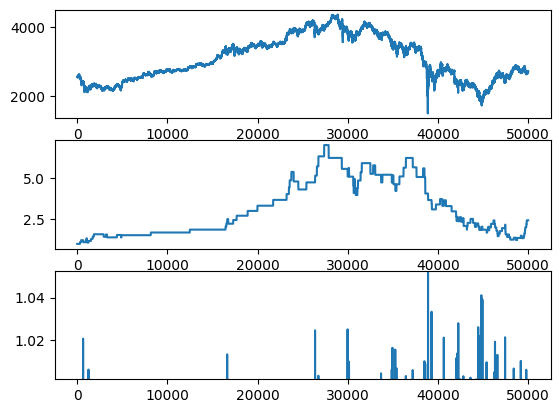

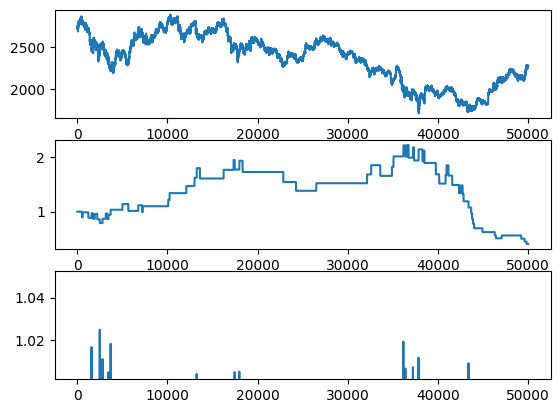

In [ ]:
#     chunky survey 필요함    #
chunk_size = 50000

sync_pr = np.ones(len(res_df))
sync_tr = np.zeros(len(res_df))
# sync_tr = np.empty(len(res_df))
# sync_tr[:] = np.nan

max_tr = np.max(tp_ratio_list)
min_tr = np.min(tp_ratio_list)

for ck_i in range(0, len(res_df), chunk_size):

  chunked_df = res_df.iloc[ck_i:ck_i + chunk_size]
  # break

  for pr_, eptp_idx, tr_ in zip(pr_list[ck_i:ck_i + chunk_size], trade_list[ck_i:ck_i + chunk_size], tp_ratio_list[ck_i:ck_i + chunk_size]):
    # print(pr_, eptp_idx)
    sync_pr[eptp_idx[-1][0]] = pr_
    sync_tr[eptp_idx[-1][0]] = tr_
    # break

  chunked_pr = sync_pr[ck_i:ck_i + chunk_size]
  chunked_tr = sync_tr[ck_i:ck_i + chunk_size]
  chunked_tr = np.where(np.isnan(chunked_tr), pd.Series(chunked_tr).shift(1), chunked_tr)

  # plt.figure(figsize=(8, 6))

  plt.subplot(311)
  plt.plot(np.arange(len(chunked_df)), chunked_df['close'])
  # plt.show()

  plt.subplot(312)
  plt.plot(np.cumprod(chunked_pr))
  
  plt.subplot(313)
  plt.plot(chunked_tr)
  plt.ylim(min_tr + 0.5 * (max_tr - min_tr), max_tr)
  
  plt.show()
  print()


### plot indi. legacy

In [ ]:

  # ---------------------- ma ---------------------- #
   # --------- ema --------- #
  # alpha = 1
  # for sm_i, item in enumerate(ema_list):
  #   if sm_i > 0:
  #     lw = 5
  #   else:
  #     lw = 2
  #   plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#03ed30', linewidth=lw)
  #   alpha -= 0.2

  #   # --------- sma --------- #
  # alpha = 1
  # for sm_i, sma in enumerate(sma_list):
  #   if sm_i > 0:
  #     lw = 5
  #   else:
  #     lw = 4
  #   plt.step(np.arange(len(plot_df)), plot_df[sma].values, alpha=alpha, color='#e91e63', linewidth=lw)
  #   alpha -= 0.2

  
  # ---------------------- cb ---------------------- #
  # alpha = 1
  # for sm_i, item in enumerate(cb_list):
  #   if sm_i > 0:
  #     lw = 5
  #   else:
  #     lw = 2
  #   plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#5b9cf6', linewidth=lw)
  #   alpha -= 0.2


  
  #               sar               #
  # alpha = 1
  # markersize = 5
  # for sar in sar_list:
  #   plt.step(plot_df[sar].values, 'c*', alpha=alpha, markersize=markersize, color='dodgerblue')  # sar mic
  #   markersize += 1
  #   alpha -= 0.1

  # plt.step(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac

  #               cloud               #
  # alpha = 0.7
  # for senkoua, senkoub in zip(senkoua_list, senkoub_list):
  #   plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values, # ichimoku
  #                     where=plot_df[senkoua].values >= plot_df[senkoub].values, facecolor='g', alpha=alpha) # ichimoku
  #   plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values,
  #                     where=plot_df[senkoua].values <= plot_df[senkoub].values, facecolor='r', alpha=alpha)  
  #   alpha -= 0.05
  


  # ---------------------- outer price indi. ---------------------- #
  #           macd          #
  # plt.subplot(312)
  # plt.subplot(gs[1])
  # alpha = 1
  # for macd in macd_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[macd].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2

  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  # plt.axhline(0, linestyle='--')

  
  # #           trix          #  
  # # plt.subplot(313)
  # plt.subplot(gs[2])
  # alpha = 1
  # for trix in trix_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[trix].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')
  # plt.axhline(0, linestyle='--')

  
  #           fisher          #  
  # plt.subplot(313)
  # plt.subplot(gs[1])
  # alpha = 1
  # for fisher in fisher_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[fisher].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
    
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  # plt.axhline(0, linestyle='--')
  # plt.axhline(fisher_upper, linestyle='--')
  # plt.axhline(fisher_lower, linestyle='--')

  #           stoch          #  
  # plt.subplot(gs[1])
  # alpha = 1
  # for stoch_ in stoch_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[stoch_].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(50, linestyle='--')
  # plt.axhline(stoch_upper, linestyle='--')
  # plt.axhline(stoch_lower, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  # ---------- cctbbo ---------- #  
  # plt.subplot(gs[1])
  # alpha = 1
  # for cctbbo in cctbbo_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[cctbbo].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(50, linestyle='--')
  # plt.axhline(cctbbo_upper, linestyle='--')
  # plt.axhline(cctbbo_lower, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  # ---------- ema_roc ---------- #  
  # plt.subplot(gs[1])
  # alpha = 1
  # for emaroc in emaroc_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[emaroc].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')
  # plt.axhline(0, linestyle='--')
  
  # ---------- bbw ---------- #  
  # plt.subplot(gs[1])
  # alpha = 1
  # for bbwp_ in bbwp_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[bbwp_].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')
  # plt.axhline(bbwp_thresh, linestyle='--')

  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')



### plot all indicator (stepline ver.)

short real pr : [0.95849245]
long real pr : [1.0378222]


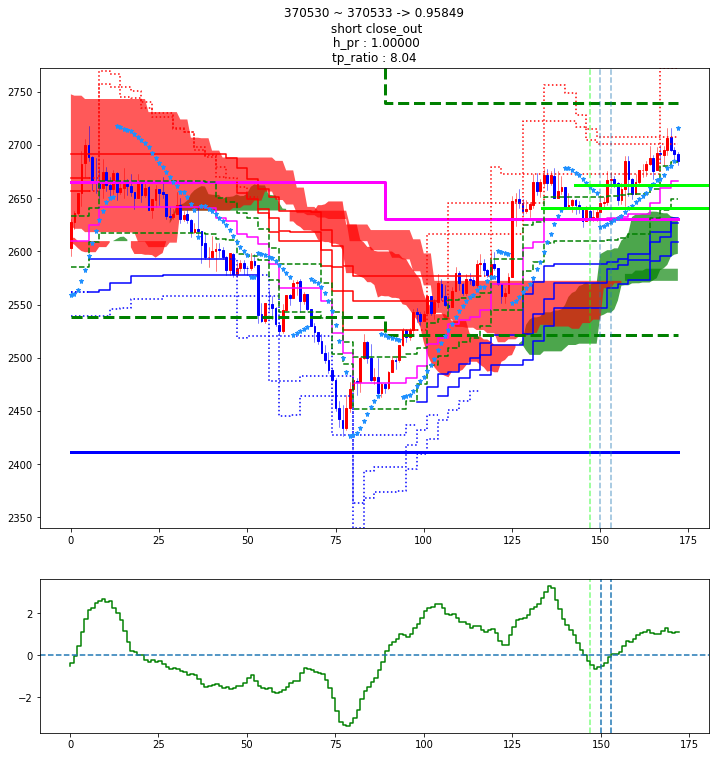

In [ ]:
save_plot = False


if save_plot:
  plot_check_dir = current_path + "plot_check/" +  key.replace(".xlsx", "")
  try:
    os.mkdir(plot_check_dir)
  except:

    #     remove existing dir   #
    shutil.rmtree(plot_check_dir)
    print(plot_check_dir, 'removed !')
    os.mkdir(plot_check_dir)
    # pass
    
# prev_plotsize = 120
prev_plotsize = 150
post_plotsize = 20

# inversion = True
inversion = False

# hedge = True
# hedge = False


if inversion:  

    plot_pr_list = rev_np_pr
    h_plot_pr_list = h_rev_np_pr  # hedge

else:

    plot_pr_list = np_pr
    try:
      h_plot_pr_list = h_np_pr
    except Exception as e:
      print("error in h_plot_pr :", e)
      h_plot_pr_list = np_pr


#         select plot columns       #
major_st_list = ['major_ST1_Up', 'major_ST1_Down', 'major_ST2_Up', 'major_ST2_Down', 'major_ST3_Up', 'major_ST3_Down',
                 'major_middle_line', 'major_upper_middle', 'major_lower_middle']

basic_list = ['open', 'high', 'low', 'close', 'minor_ST1_Up', 'minor_ST1_Down',
       'minor_ST2_Up', 'minor_ST2_Down', 'minor_ST3_Up', 'minor_ST3_Down',
       'middle_line', 'min_upper', 'max_lower'] # + major_st_list


senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']
senkoua_list = ['senkou_a1',  'senkou_a2']
senkoub_list = ['senkou_b1',  'senkou_b2']

# sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
sar_list = ['sar1']

# ma_list = ['sma1', 'sma4']
ma_list = ['ema5']


#     -------------- under price phase --------------    #
macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']
# macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3']
# trix_list = ['trix1', 'trix2', 'trix3', 'trix4', 'trix5']
trix_list = ['trix1', 'trix2', 'trix3']
stoch_list = ['stoch']
fisher_list = ['fisher30', 'fisher60', 'fisher120']
cctbbo_list = ['cctbbo']
emaroc_list = ['ema_roc']


#       
# input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols + ichimoku_cols2
# input_colname = basic_list + senkoua_list + senkoub_list + sar_list + macd_list + trix_list
# input_colname = basic_list + senkoua_list + senkoub_list + sar_list + macd_list
# input_colname = basic_list + senkoua_list + senkoub_list + sar_list + macd_list + ma_list
# input_colname = basic_list + senkoua_list + senkoub_list + sar_list + ma_list + macd_list + stoch_list + fisher_list + cctbbo_list
input_colname = basic_list + major_st_list + senkoua_list + senkoub_list + sar_list + stoch_list + fisher_list + emaroc_list
price_colname = basic_list + senkoua_list + senkoub_list + sar_list # currently just used for ymin, ymax
# input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols




# for t_i, (initial_i, i, j) in enumerate(trade_list):
for t_i, (ep_idx_list_, tp_idx_list_) in enumerate(trade_list):
  # print(i, j)

  if not(i >= prev_plotsize):
    continue

  # if i <= 4860:
  # if i == 1536:
  # if 100 < i < 1860:
  if ep_idx_list_[0] == 370530:
    pass
  else:
    continue

  # if tp_state_list[t_i] != 'd-open':
  #   continue

  # if (entry[i] == -1) and res_df['close'].iloc[i - 1] > short_ep.iloc[i]:
  #   pass
  # else:
  #   continue

  # if plot_pr_list[t_i] > 0.5:
  # if plot_pr_list[t_i] > 1.0:
  # # if plot_pr_list[t_i] < 1.0:
  #   continue

  # plot_df = res_df.iloc[i - prev_plotsize:j + post_plotsize, input_cols]
  plot_df = res_df.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize][input_colname]


  #       keep off-color st with another variable         #
  # st_trend_plot_df = res_df.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize, [7, 10, 13]]
  # st_trend_plot_df = res_df[['minor_ST1_Trend', 'minor_ST2_Trend', 'minor_ST3_Trend']].iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]
  st_trend_plot_df = res_df[['minor_ST1_Trend', 'minor_ST2_Trend', 'minor_ST3_Trend', 'major_ST1_Trend', 'major_ST2_Trend', 'major_ST3_Trend']].iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]
  # htf_st_trend_plot_df = res_df[['major_ST1_Trend', 'major_ST2_Trend', 'major_ST3_Trend']].iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]

  # y_max = np.max(plot_df.iloc[:, [4, 6, 8]])
  # y_min = np.min(plot_df.iloc[:, [5, 7, 9]])
  # print("y_max, y_min :", y_max, y_min)
  
  # y_max = max(np.max(plot_df.iloc[:, [4, 6, 8]]))
  # y_min = min(np.min(plot_df.iloc[:, [5, 7, 9]]))
  
  y_max = max(np.max(plot_df[price_colname]))
  y_min = min(np.min(plot_df[price_colname]))

  if np.isnan(y_max) or np.isnan(y_min):
    continue
  # print("y_max, y_min :", y_max, y_min)
  # break
  
  plot_df["off_color_upper_st1"] = np.where(st_trend_plot_df['minor_ST1_Trend'] == 1, plot_df['minor_ST1_Up'], np.nan)
  plot_df["off_color_upper_st2"] = np.where(st_trend_plot_df['minor_ST2_Trend'] == 1, plot_df['minor_ST2_Up'], np.nan)
  plot_df["off_color_upper_st3"] = np.where(st_trend_plot_df['minor_ST3_Trend'] == 1, plot_df['minor_ST3_Up'], np.nan)
  plot_df["off_color_lower_st1"] = np.where(st_trend_plot_df['minor_ST1_Trend'] == -1, plot_df['minor_ST1_Down'], np.nan)
  plot_df["off_color_lower_st2"] = np.where(st_trend_plot_df['minor_ST2_Trend'] == -1, plot_df['minor_ST2_Down'], np.nan)
  plot_df["off_color_lower_st3"] = np.where(st_trend_plot_df['minor_ST3_Trend'] == -1, plot_df['minor_ST3_Down'], np.nan)

  plot_df["off_color_upper_hst1"] = np.where(st_trend_plot_df['major_ST1_Trend'] == 1, plot_df['major_ST1_Up'], np.nan)
  plot_df["off_color_upper_hst2"] = np.where(st_trend_plot_df['major_ST2_Trend'] == 1, plot_df['major_ST2_Up'], np.nan)
  plot_df["off_color_upper_hst3"] = np.where(st_trend_plot_df['major_ST3_Trend'] == 1, plot_df['major_ST3_Up'], np.nan)
  plot_df["off_color_lower_hst1"] = np.where(st_trend_plot_df['major_ST1_Trend'] == -1, plot_df['major_ST1_Down'], np.nan)
  plot_df["off_color_lower_hst2"] = np.where(st_trend_plot_df['major_ST2_Trend'] == -1, plot_df['major_ST2_Down'], np.nan)
  plot_df["off_color_lower_hst3"] = np.where(st_trend_plot_df['major_ST3_Trend'] == -1, plot_df['major_ST3_Down'], np.nan)


  #       replace st values with np.nan, using st trend     #
  plot_df['minor_ST1_Up'] = np.where(st_trend_plot_df['minor_ST1_Trend'] == 1, np.nan, plot_df['minor_ST1_Up'])
  plot_df['minor_ST2_Up'] = np.where(st_trend_plot_df['minor_ST2_Trend'] == 1, np.nan, plot_df['minor_ST2_Up'])
  plot_df['minor_ST3_Up'] = np.where(st_trend_plot_df['minor_ST3_Trend'] == 1, np.nan, plot_df['minor_ST3_Up'])
  plot_df['minor_ST1_Down'] = np.where(st_trend_plot_df['minor_ST1_Trend'] == -1, np.nan, plot_df['minor_ST1_Down'])
  plot_df['minor_ST2_Down'] = np.where(st_trend_plot_df['minor_ST2_Trend'] == -1, np.nan, plot_df['minor_ST2_Down'])
  plot_df['minor_ST3_Down'] = np.where(st_trend_plot_df['minor_ST3_Trend'] == -1, np.nan, plot_df['minor_ST3_Down'])

  plot_df['major_ST1_Up'] = np.where(st_trend_plot_df['major_ST1_Trend'] == 1, np.nan, plot_df['major_ST1_Up'])
  plot_df['major_ST2_Up'] = np.where(st_trend_plot_df['major_ST2_Trend'] == 1, np.nan, plot_df['major_ST2_Up'])
  plot_df['major_ST3_Up'] = np.where(st_trend_plot_df['major_ST3_Trend'] == 1, np.nan, plot_df['major_ST3_Up'])
  plot_df['major_ST1_Down'] = np.where(st_trend_plot_df['major_ST1_Trend'] == -1, np.nan, plot_df['major_ST1_Down'])
  plot_df['major_ST2_Down'] = np.where(st_trend_plot_df['major_ST2_Trend'] == -1, np.nan, plot_df['major_ST2_Down'])
  plot_df['major_ST3_Down'] = np.where(st_trend_plot_df['major_ST3_Trend'] == -1, np.nan, plot_df['major_ST3_Down'])


  plot_short_ep = short_ep.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]
  plot_long_ep = long_ep.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]

  plot_upper_middle = (plot_df['middle_line'] + plot_df['min_upper']) / 2
  plot_lower_middle = (plot_df['middle_line'] + plot_df['max_lower']) / 2

  plot_short_tp = short_tp.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]
  plot_long_tp = long_tp.iloc[ep_idx_list_[0] - prev_plotsize:tp_idx_list_[-1] + post_plotsize]  


  # fig = trendln.plot_support_resistance(plot_df['close'], accuracy=8, fromwindows=False, numbest=1,  window=30) # requires matplotlib - pip install matplotlib

  fig = plt.figure(figsize=(12, 16))
  
  gs = gridspec.GridSpec(nrows=3, # row 몇 개 
                       ncols=1, # col 몇 개 
                       height_ratios=[3, 1, 1]
                      )
  
  # fig = plt.figure(figsize=(8, 12))
  # ax = fig.add_subplot(111)
  # ax = fig.add_subplot(311)
  ax = fig.add_subplot(gs[0])

  # fig.show()
  # fig.canvas.draw()

  temp_ohlc = plot_df.values[:, :4]
  index = np.arange(len(temp_ohlc))
  candle = np.hstack((np.reshape(index, (-1, 1)), temp_ohlc))
  mf.candlestick_ohlc(ax, candle, width=0.5, colorup='r', colordown='b')

  plt.step(plot_df[['minor_ST1_Up', 'minor_ST2_Up', 'minor_ST3_Up']].values, 'r', alpha=1)  # upper on color
  plt.step(plot_df[['minor_ST1_Down', 'minor_ST2_Down', 'minor_ST3_Down']].values, 'b', alpha=1)  # lower on color
  
  plt.step(plot_df[['major_ST1_Up', 'major_ST2_Up', 'major_ST3_Up']].values, 'r', alpha=1, linewidth=3)  # major upper on color
  plt.step(plot_df[['major_ST1_Down', 'major_ST2_Down', 'major_ST3_Down']].values, 'b', alpha=1, linewidth=3)  # major lower on color

  plt.step(plot_df[['middle_line']].values, 'fuchsia', alpha=1)  # middle 
  plt.step(plot_df[['major_middle_line']].values, 'fuchsia', alpha=1, linewidth=3)  # major_middle 
  
  plt.step(plot_df[['off_color_upper_st1', 'off_color_upper_st2', 'off_color_upper_st3']].values, 'r', alpha=1, linestyle=':')  # upper off color
  plt.step(plot_df[['off_color_lower_st1', 'off_color_lower_st2', 'off_color_lower_st3']].values, 'b', alpha=1, linestyle=':')  # lower off color
  
  plt.step(plot_df[['off_color_upper_hst1', 'off_color_upper_hst2', 'off_color_upper_hst3']].values, 'r', alpha=1, linestyle=':', linewidth=3)  # major upper off color
  plt.step(plot_df[['off_color_lower_hst1', 'off_color_lower_hst2', 'off_color_lower_hst3']].values, 'b', alpha=1, linestyle=':', linewidth=3)  # major lower off color


  # plt.step(np.arange(len(plot_df)), plot_short_ep.values, alpha=1, linestyle='--', color='y')  # ep
  # plt.step(np.arange(len(plot_df)),plot_long_ep.values, alpha=1, linestyle='--', color='y')  # ep

  plt.step(np.arange(len(plot_df)), plot_upper_middle.values, alpha=1, linestyle='--', color='g')  # 2nd middle
  plt.step(np.arange(len(plot_df)), plot_lower_middle.values, alpha=1, linestyle='--', color='g')  # 2nd middle

  plt.step(plot_df[['major_upper_middle']].values, 'g', linestyle='--', alpha=1, linewidth=3)  # major_middle 
  plt.step(plot_df[['major_lower_middle']].values, 'g', linestyle='--', alpha=1, linewidth=3)  # major_middle 
  

  # plt.step(np.arange(len(plot_df)), plot_short_tp.values, alpha=1, linestyle=':', color='y')  # tp
  # plt.step(np.arange(len(plot_df)), plot_long_tp.values, alpha=1, linestyle=':', color='y')  # tp



  # ---------------------- on price indicator part ---------------------- #

  # ---------------------- sma ---------------------- #
  # alpha = 1
  # for sm_i, sma in enumerate(ma_list):
  #   if sm_i > 0:
  #     lw = 5
  #   else:
  #     lw = 2
  #   plt.step(np.arange(len(plot_df)), plot_df[sma].values, alpha=alpha, color='black', linewidth=lw)
  #   alpha -= 0.2
  
  #               sar               #
  alpha = 1
  markersize = 5
  for sar in sar_list:
    plt.step(plot_df[sar].values, 'c*', alpha=alpha, markersize=markersize, color='dodgerblue')  # sar mic
    markersize += 1
    alpha -= 0.1

  # plt.step(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac

  #               cloud               #
  alpha = 0.7
  for senkoua, senkoub in zip(senkoua_list, senkoub_list):
    plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values, # ichimoku
                      where=plot_df[senkoua].values >= plot_df[senkoub].values, facecolor='g', alpha=alpha) # ichimoku
    plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values,
                      where=plot_df[senkoua].values <= plot_df[senkoub].values, facecolor='r', alpha=alpha)  
    alpha -= 0.05
  
  # ------------------------------------------------------------- #


  #       ep & tp     #
  # if i != initial_i:
  # if len(ep_idx_list_) > 1:
  
  # ------------- initial order ------------- #
  plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_list[t_i]), alpha=0.5, linestyle='--', color='lime')

  for ep_i in range(len(ep_idx_list_)):
    plt.axvline(prev_plotsize + (ep_idx_list_[ep_i] - ep_idx_list_[0]), alpha=0.5, linestyle='--')

  # plt.axvline(prev_plotsize, alpha=0.5, linestyle='--')
  plt.axhline(ep_tp_list[t_i][0], linestyle='-', xmin=0.75, xmax=1, linewidth=3, color='lime')  # ep line axhline

  for sub_i in range(len(ep_tp_list[t_i][1])):
    plt.axhline(ep_tp_list[t_i][1][sub_i], linestyle='-', xmin=0.75 + 0.05 * (sub_i + 1) , xmax=1, linewidth=3, color='lime')  # tp line axhline
    # plt.axhline(ep_tp_list[t_i][1], linestyle='-', xmin=0.9, xmax=1, linewidth=3)  # tp line axhline  
    plt.axvline(prev_plotsize + (tp_idx_list_[sub_i] - ep_idx_list_[0]), alpha=0.5, linestyle='--')


  #         hedge ep & tp         #
  h_i = h_trade_list[t_i][1]
  if h_i is not None:
    plt.axvline(prev_plotsize + (h_i - ep_idx_list_[0]), linestyle='--')
    plt.axhline(h_ep_tp_list[t_i][0], linestyle='-', xmin=0.75, xmax=1, linewidth=3, color='magenta')  # ep line axhline
    plt.axhline(h_ep_tp_list[t_i][1], linestyle='-', xmin=0.85, xmax=1, linewidth=3, color='magenta')  # tp line axhline

  
  #         check pr        #
  if not static_lvrg:
    plt.title("%s ~ %s -> %.5f\n %s\n h_pr : %.5f\nlvrg : %s\ntp_ratio : %.2f" % (ep_idx_list_[0], tp_idx_list_[-1], plot_pr_list[t_i], tp_state_list[t_i], h_plot_pr_list[t_i], lvrg_list[t_i], tp_ratio_list[t_i]))
  else:
    plt.title("%s ~ %s -> %.5f\n %s\n h_pr : %.5f\ntp_ratio : %.2f" % (ep_idx_list_[0], tp_idx_list_[-1], plot_pr_list[t_i], tp_state_list[t_i], h_plot_pr_list[t_i], tp_ratio_list[t_i]))

  print("short real pr :", (ep_tp_list[t_i][0] / ep_tp_list[t_i][1][sub_i] - fee - 1) * lvrg + 1)
  print("long real pr :", (ep_tp_list[t_i][1][sub_i] / ep_tp_list[t_i][0] - fee - 1) * lvrg + 1)

  #           y lim         #
  plt.ylim(y_min, y_max)


  # ---------------------- outer price indi. ---------------------- #
  #           macd          #
  # plt.subplot(312)
  # plt.subplot(gs[1])
  # alpha = 1
  # for macd in macd_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[macd].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2

  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_list[t_i]), alpha=0.5, linestyle='--', color='lime')

  # plt.axhline(0, linestyle='--')

  
  # #           trix          #  
  # # plt.subplot(313)
  # plt.subplot(gs[2])
  # alpha = 1
  # for trix in trix_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[trix].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_list[t_i]), alpha=0.5, linestyle='--', color='lime')
  # plt.axhline(0, linestyle='--')

  
  #           fisher          #  
  # plt.subplot(313)
  # plt.subplot(gs[1])
  # alpha = 1
  # for fisher in fisher_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[fisher].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
    
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_list[t_i]), alpha=0.5, linestyle='--', color='lime')

  # plt.axhline(0, linestyle='--')
  # plt.axhline(fisher_upper, linestyle='--')
  # plt.axhline(fisher_lower, linestyle='--')

  #           stoch          #  
  # # plt.subplot(313)
  # plt.subplot(gs[1])
  # alpha = 1
  # for stoch in stoch_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[stoch].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(50, linestyle='--')
  # plt.axhline(stoch_upper, linestyle='--')
  # plt.axhline(stoch_lower, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_list[t_i]), alpha=0.5, linestyle='--', color='lime')

  # ---------- cctbbo ---------- #  
  # plt.subplot(gs[1])
  # alpha = 1
  # for cctbbo in cctbbo_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[cctbbo].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(50, linestyle='--')
  # plt.axhline(cctbbo_upper, linestyle='--')
  # plt.axhline(cctbbo_lower, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_list[t_i]), alpha=0.5, linestyle='--', color='lime')

  # ---------- ema_roc ---------- #  
  plt.subplot(gs[1])
  alpha = 1
  for emaroc in emaroc_list:
    plt.step(np.arange(len(plot_df)), plot_df[emaroc].values, 'g', alpha=alpha)
    # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
    alpha -= 0.2
  plt.axvline(prev_plotsize, linestyle='--')
  plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_list[t_i]), alpha=0.5, linestyle='--', color='lime')
  plt.axhline(0, linestyle='--')





  # ---------------------- plot ---------------------- #

  if not save_plot:
    plt.show()
  
  else:
    # ---------- save mode ---------- #
    fig_name = plot_check_dir +  "/%s.png" % t_i
    plt.savefig(fig_name)
    print(fig_name, "saved !")

  
  plt.close()
  print()

  # break


In [ ]:
# print()
for item in os.listdir(current_path + "plot_check/"):
  if item.endswith('png'):
    os.remove(current_path + "plot_check/" + item)
    print(current_path + "plot_check/" + item, "removed !")

### plot nontp case

In [ ]:
prev_plotsize = 50

# inversion = True
inversion = False

# hedge = True
# hedge = False

short_ver = False


if inversion:  

    plot_pr_list = rev_np_pr
    h_plot_pr_list = h_rev_np_pr  # hedge

else:

    plot_pr_list = np_pr
    h_plot_pr_list = h_np_pr



#         select plot columns       #
# basic_cols = [0, 1, 2, 3, 5, 6, 8, 9, 11, 12, 14] # you don't need to touch

# sar_cols = [15, 18] # 15 ~ 19
# ichimoku_cols = [20, 21]  # 20 ~ 29
# # ichimoku_cols = [22, 23]  # 20 ~ 29
# ichimoku_cols2 = [22, 23]  # 20 ~ 29
# macd_cols = [30]  # 30 ~ 34

# print(res_df.columns[basic_cols])
# break

basic_list = ['open', 'high', 'low', 'close', 'minor_ST1_Up', 'minor_ST1_Down',
       'minor_ST2_Up', 'minor_ST2_Down', 'minor_ST3_Up', 'minor_ST3_Down',
       'middle_line', 'min_upper', 'max_lower']
# senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3', 'senkou_a4', 'senkou_a5']
# senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3', 'senkou_b4', 'senkou_b5']
senkoua_list = ['senkou_a1', 'senkou_a2', 'senkou_a3']
senkoub_list = ['senkou_b1', 'senkou_b2', 'senkou_b3']
# sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
# sar_list = ['sar1', 'sar2', 'sar3', 'sar4', 'sar5']
sar_list = ['sar1', 'sar2', 'sar3']
sar_list = ['sar1', 'sar2', 'sar3']

#     -------------- under price phase --------------    #
macd_list = ['macd_hist1', 'macd_hist2', 'macd_hist3', 'macd_hist4', 'macd_hist5']
trix_list = ['trix1', 'trix2', 'trix3', 'trix4', 'trix5']
stoch_list = ['stoch']
fisher_list = ['fisher']
cctbbo_list = ['cctbbo']


#       
# input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols + ichimoku_cols2
# input_colname = basic_list + senkoua_list + senkoub_list + sar_list + macd_list + trix_list
input_colname = basic_list + senkoua_list + senkoub_list + sar_list + macd_list + stoch_list + fisher_list + cctbbo_list
price_colname = basic_list + senkoua_list + senkoub_list + sar_list 
# input_cols = basic_cols + sar_cols + ichimoku_cols + macd_cols


if short_ver:
  nontp_indexs = nontp_short_indexs
  nontp_liqd_list = nontp_short_liqd_list
  nontp_pr_list = nontp_short_pr_list
  nontp_ep = nontp_short_ep_list
else:
  nontp_indexs = nontp_long_indexs
  nontp_liqd_list = nontp_long_liqd_list
  nontp_pr_list = nontp_long_pr_list
  nontp_ep = nontp_long_ep_list


for t_i, i in enumerate(nontp_indexs):

  j = len(res_df) - 1

  # print(i, j)

  if not(i >= prev_plotsize):
    continue

  # if i <= 4860:
  # if i == 1536:
  # # if 1800 < i < 1860:
  #   pass
  # else:
  #   continue

  # if tp_state_list[t_i] != 'd-open':
  #   continue

  # if (entry[i] == -1) and res_df['close'].iloc[i - 1] > upper_ep.iloc[i]:
  #   pass
  # else:
  #   continue

  # if plot_pr_list[t_i] > 0.5:
  # if plot_pr_list[t_i] > 1.0:
  # # if plot_pr_list[t_i] < 1.0:
  #   continue

  # plot_df = res_df.iloc[i - prev_plotsize:j + 1, input_cols]
  plot_df = res_df.iloc[i - prev_plotsize:j + 1][input_colname]


  #       keep off-color st with another variable         #
  st_trend_plot_df = res_df.iloc[i - prev_plotsize:j + 1, [7, 10, 13]]

  # y_max = np.max(plot_df.iloc[:, [4, 6, 8]])
  # y_min = np.min(plot_df.iloc[:, [5, 7, 9]])
  # print("y_max, y_min :", y_max, y_min)
  
  # y_max = max(np.max(plot_df.iloc[:, [4, 6, 8]]))
  # y_min = min(np.min(plot_df.iloc[:, [5, 7, 9]]))
  
  y_max = max(np.max(plot_df[price_colname]))
  y_min = min(np.min(plot_df[price_colname]))
  # print("y_max, y_min :", y_max, y_min)
  # break

  plot_df["off_color_upper_st1"] = np.where(st_trend_plot_df.iloc[:, [0]] == 1, plot_df.iloc[:, [4]], np.nan)
  plot_df["off_color_upper_st2"] = np.where(st_trend_plot_df.iloc[:, [1]] == 1, plot_df.iloc[:, [6]], np.nan)
  plot_df["off_color_upper_st3"] = np.where(st_trend_plot_df.iloc[:, [2]] == 1, plot_df.iloc[:, [8]], np.nan)
  plot_df["off_color_lower_st1"] = np.where(st_trend_plot_df.iloc[:, [0]] == -1, plot_df.iloc[:, [5]], np.nan)
  plot_df["off_color_lower_st2"] = np.where(st_trend_plot_df.iloc[:, [1]] == -1, plot_df.iloc[:, [7]], np.nan)
  plot_df["off_color_lower_st3"] = np.where(st_trend_plot_df.iloc[:, [2]] == -1, plot_df.iloc[:, [9]], np.nan)


  #       replace st values with np.nan, using st trend     #
  plot_df.iloc[:, [4]] = np.where(st_trend_plot_df.iloc[:, [0]] == 1, np.nan, plot_df.iloc[:, [4]])
  plot_df.iloc[:, [6]] = np.where(st_trend_plot_df.iloc[:, [1]] == 1, np.nan, plot_df.iloc[:, [6]])
  plot_df.iloc[:, [8]] = np.where(st_trend_plot_df.iloc[:, [2]] == 1, np.nan, plot_df.iloc[:, [8]])
  plot_df.iloc[:, [5]] = np.where(st_trend_plot_df.iloc[:, [0]] == -1, np.nan, plot_df.iloc[:, [5]])
  plot_df.iloc[:, [7]] = np.where(st_trend_plot_df.iloc[:, [1]] == -1, np.nan, plot_df.iloc[:, [7]])
  plot_df.iloc[:, [9]] = np.where(st_trend_plot_df.iloc[:, [2]] == -1, np.nan, plot_df.iloc[:, [9]])


  plot_upper_ep = upper_ep.iloc[i - prev_plotsize:j + 1]
  plot_lower_ep = lower_ep.iloc[i - prev_plotsize:j + 1]

  plot_upper_middle = (plot_df['middle_line'] + plot_df['min_upper']) / 2
  plot_lower_middle = (plot_df['middle_line'] + plot_df['max_lower']) / 2

  plot_short_tp = short_tp.iloc[i - prev_plotsize:j + 1]
  plot_long_tp = long_tp.iloc[i - prev_plotsize:j + 1]  



  # fig = plt.figure(figsize=(12, 16))
  fig = plt.figure(figsize=(12, 16))
  
  gs = gridspec.GridSpec(nrows=3, # row 몇 개 
                       ncols=1, # col 몇 개 
                       height_ratios=[3, 1, 1]
                      )
  
  # fig = plt.figure(figsize=(8, 12))
  # ax = fig.add_subplot(111)
  # ax = fig.add_subplot(311)
  ax = fig.add_subplot(gs[0])

  # fig.show()
  # fig.canvas.draw()

  temp_ohlc = plot_df.values[:, :4]
  index = np.arange(len(temp_ohlc))
  candle = np.hstack((np.reshape(index, (-1, 1)), temp_ohlc))
  mf.candlestick_ohlc(ax, candle, width=0.5, colorup='r', colordown='b')

  # print(plot_df.values[:, 4:])
  plt.step(plot_df.values[:, [4, 6, 8]], 'r', alpha=1)  # upper on color
  # plt.plot(plot_df.values[:, [4, 6, 8]], 'r', alpha=1)  # upper on color
  plt.step(plot_df.values[:, [5, 7, 9]], 'b', alpha=1)  # lower on color
  plt.step(plot_df.values[:, [10]], 'fuchsia', alpha=1)  # middle
  
  plt.step(plot_df.values[:, -6:-3], 'r', alpha=1, linestyle=':')  # upper off color
  plt.step(plot_df.values[:, -3:], 'b', alpha=1, linestyle=':')  # lower off color



  # plt.step(np.arange(len(plot_df)), plot_upper_ep.values, alpha=1, linestyle='--', color='y')  # ep
  # plt.step(np.arange(len(plot_df)),plot_lower_ep.values, alpha=1, linestyle='--', color='y')  # ep

  plt.step(np.arange(len(plot_df)), plot_upper_middle.values, alpha=1, linestyle='--', color='g')  # 2nd middle
  plt.step(np.arange(len(plot_df)), plot_lower_middle.values, alpha=1, linestyle='--', color='g')  # 2nd middle

  # plt.step(np.arange(len(plot_df)), plot_short_tp.values, alpha=1, linestyle=':', color='y')  # tp
  # plt.step(np.arange(len(plot_df)), plot_long_tp.values, alpha=1, linestyle=':', color='y')  # tp



  # ---------------------- indicator part ---------------------- #
  
  #               sar               #
  alpha = 1
  markersize = 5
  for sar in sar_list:
    plt.step(plot_df[sar].values, 'c*', alpha=alpha, markersize=markersize, color='dodgerblue')  # sar mic
    markersize += 1
    alpha -= 0.1

  # plt.step(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac

  #               cloud               #
  alpha = 0.7
  for senkoua, senkoub in zip(senkoua_list, senkoub_list):
    plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values, # ichimoku
                      where=plot_df[senkoua].values >= plot_df[senkoub].values, facecolor='g', alpha=alpha) # ichimoku
    plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values,
                      where=plot_df[senkoua].values <= plot_df[senkoub].values, facecolor='r', alpha=alpha)  
    alpha -= 0.05
  
  # ------------------------------------------------------------- #


  #       ep & tp     #
  if i != initial_i:
    plt.axvline(prev_plotsize - (i - initial_i), alpha=0.5, linestyle='--')
  plt.axvline(prev_plotsize, alpha=0.5, linestyle='--')
  plt.axhline(nontp_ep[t_i], linestyle='-', xmin=0.75, xmax=1, linewidth=3, color='lime')  # ep line axhline

  # for sub_i in range(len(ep_tp_list[t_i][1])):
  #   plt.axhline(ep_tp_list[t_i][1][sub_i], linestyle='-', xmin=0.75 + 0.05 * (sub_i + 1) , xmax=1, linewidth=3, color='lime')  # tp line axhline
    # plt.axhline(ep_tp_list[t_i][1], linestyle='-', xmin=0.9, xmax=1, linewidth=3)  # tp line axhline    

  #         hedge ep & tp         #
  # h_i = h_trade_list[t_i][1]
  # if h_i is not None:
  #   plt.axvline(prev_plotsize + (h_i - i), linestyle='--')
  #   plt.axhline(h_ep_tp_list[t_i][0], linestyle='-', xmin=0.75, xmax=1, linewidth=3, color='magenta')  # ep line axhline
  #   plt.axhline(h_ep_tp_list[t_i][1], linestyle='-', xmin=0.85, xmax=1, linewidth=3, color='magenta')  # tp line axhline

  
  #         check pr        #
  plt.title("%s ~ %s -> liqd : %.2f\npr : %.2f" % (i, j, nontp_liqd_list[t_i], nontp_pr_list[t_i]))

  #           y lim         #
  plt.ylim(y_min, y_max)


  # #           macd          #
  # # plt.subplot(312)
  # plt.subplot(gs[1])
  # alpha = 1
  # for macd in macd_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[macd].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(0, linestyle='--')

  
  # #           trix          #  
  # # plt.subplot(313)
  # plt.subplot(gs[2])
  # alpha = 1
  # for trix in trix_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[trix].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(0, linestyle='--')

  
  #           fisher          #  
  # # plt.subplot(313)
  # plt.subplot(gs[1])
  # alpha = 1
  # for fisher in fisher_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[fisher].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(0, linestyle='--')
  # plt.axhline(fisher_upper, linestyle='--')
  # plt.axhline(fisher_lower, linestyle='--')

  #           stoch          #  
  # plt.subplot(313)
  plt.subplot(gs[1])
  alpha = 1
  for stoch in stoch_list:
    plt.step(np.arange(len(plot_df)), plot_df[stoch].values, 'g', alpha=alpha)
    # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
    alpha -= 0.2
  plt.axvline(prev_plotsize, linestyle='--')
  plt.axhline(50, linestyle='--')
  plt.axhline(stoch_upper, linestyle='--')
  plt.axhline(stoch_lower, linestyle='--')



  # ---------------------- plot ---------------------- #

  plt.show()
  # plt.draw()
  plt.close()
  print()

  # break


### show detail values

In [ ]:
i, j = 27267, 27268
print("upper_ep.iloc[i] :", upper_ep.iloc[i])
print("short_tp.iloc[j] :", short_tp.iloc[j])

upper_ep.iloc[i] : 2348.266954813089
short_tp.iloc[j] : 2205.609333246829


## none plot off-color st

In [ ]:
prev_plotsize = 50

for t_i, (i, j) in enumerate(trade_list):
  # print(i, j)

  if not(i >= prev_plotsize):
    continue

  # if pr_list[t_i] >= 1:
  #   continue

  plot_df = res_df.iloc[i - prev_plotsize:j + 1, [0, 1, 2, 3, 5, 6, 8, 9, 11, 12, 14, 15, 16]]

  #       replace st values with np.nan, using st trend     #
  st_trend_plot_df = res_df.iloc[i - prev_plotsize:j + 1, [7, 10, 13]]
  plot_df.iloc[:, [4]] = np.where(st_trend_plot_df.iloc[:, [0]] == 1, np.nan, plot_df.iloc[:, [4]])
  plot_df.iloc[:, [6]] = np.where(st_trend_plot_df.iloc[:, [1]] == 1, np.nan, plot_df.iloc[:, [6]])
  plot_df.iloc[:, [8]] = np.where(st_trend_plot_df.iloc[:, [2]] == 1, np.nan, plot_df.iloc[:, [8]])
  plot_df.iloc[:, [5]] = np.where(st_trend_plot_df.iloc[:, [0]] == -1, np.nan, plot_df.iloc[:, [5]])
  plot_df.iloc[:, [7]] = np.where(st_trend_plot_df.iloc[:, [1]] == -1, np.nan, plot_df.iloc[:, [7]])
  plot_df.iloc[:, [9]] = np.where(st_trend_plot_df.iloc[:, [2]] == -1, np.nan, plot_df.iloc[:, [9]])


  plot_upper_ep = upper_ep.iloc[i - prev_plotsize:j + 1]
  plot_lower_ep = lower_ep.iloc[i - prev_plotsize:j + 1]

  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(111)

  # fig.show()
  # fig.canvas.draw()

  temp_ohlc = plot_df.values[:, :4]
  index = np.arange(len(temp_ohlc))
  candle = np.hstack((np.reshape(index, (-1, 1)), temp_ohlc))
  mf.candlestick_ohlc(ax, candle, width=0.5, colorup='r', colordown='b')

  # print(plot_df.values[:, 4:])
  plt.plot(plot_df.values[:, [4, 6, 8]], 'r', alpha=1)  # upper
  plt.plot(plot_df.values[:, [5, 7, 9]], 'b', alpha=1)  # lower
  plt.plot(plot_df.values[:, [10]], 'g', alpha=1)  # middle

  plt.plot(plot_df.values[:, [11]], 'c*', alpha=1, markersize=5)  # sar mic
  plt.plot(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac

  plt.plot(plot_upper_ep.values, alpha=1, linestyle='--')  # ep
  plt.plot(plot_lower_ep.values, alpha=1, linestyle='--')  # ep

  plt.axvline(prev_plotsize, linestyle='--')

  plt.title("%s ~ %s -> %.5f" % (i, j, pr_list[t_i]))
  plt.show()
  # plt.draw()
  plt.close()